In [14]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.mixed_linear_model import MixedLM
from sklearn.model_selection import train_test_split

# set the maximum number of rows and columns to display to unlimited
#pd.set_option("display.max_rows", None, "display.max_columns", None) 

In [15]:
data = pd.read_csv("C:/Users/Kiat Kai/Desktop/NOTES/FYP/Full Dataset/diamante_eligible_5June.csv")
data.drop(columns = ["Unnamed: 0"], inplace = True)
data.head()
print(data.isnull().sum())
print(data.shape)

ID_DIAMANTE              0
date_baseline_visit      0
Start_Date               0
Study_Day                0
Week_Day                 0
                      ... 
today_steps            560
daybefyest_steps       574
step_change_yest       715
step_change_today      675
arm                      0
Length: 121, dtype: int64
(3770, 121)


## We create a dataset where we first try to remove all the columns with NAN first add keep all the columns with full data 

## We should use this dataset from now on data_dropnan

In [16]:
# We want to keep time_msg but it has 828 missing values as the participants did not receive any message at all
# So to keep it, we replace the time_msg NA with T0

data["time_msg"] = data["time_msg"].replace(np.nan, "T0")

# We now try to drop columns with missing values at all
data_dropnan = data.drop(["eth_other","income_ladder","nat_lang_able","country","years_us","start_phq8_prd",
                          "start_gad_prd","days.since.F0","days.since.F1","days.since.F2","days.since.F3","days.since.F4"
                          ,"days.since.M0","days.since.M1","days.since.M2","days.since.M3","days.since.T1","days.since.T2",
                          "days.since.T3","days.since.T4","days.since.ind","days.since.soc","weekly_goal","yesterday_progress",
                          "week_progress","daybefyest_steps",
                         "step_change_yest","step_change_today"], axis=1)

# Now remove the rows with missing today_steps
data_dropnan.dropna(axis=0, inplace=True)

# Removed the outlier from today steps
data_dropnan = data_dropnan[data_dropnan.today_steps < 50000]
print(data_dropnan.shape)

# Create a new variable called difference_from_yesterday_steps
data_dropnan["difference_from_yesterday_steps"] = data_dropnan["today_steps"] - data_dropnan["yesterday_steps"]
print(data_dropnan.shape)

# VARIABLE: timemsg
data_dropnan1 = data_dropnan.drop(data_dropnan[data_dropnan.time_msg == "2+ Time Frames"].index, axis = 0)

# Next, we remove some rows for some columns which has outliers
# VARIABLE: ETH
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.eth =="Asian or Pacific Islander,Hispanic/Latino(a)"].index, axis = 0)
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.eth =="Asian or Pacific Islander,White or Caucasian,Multi-ethnic"].index, axis = 0)
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.eth =="Asian or Pacific Islander,White or Caucasian"].index, axis = 0)
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.eth =="White or Caucasian,Hispanic/Latino(a),Multi-ethnic"].index, axis = 0)
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.eth =="White or Caucasian,Hispanic/Latino(a),Other"].index, axis = 0)
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.eth =="White or Caucasian,Other"].index, axis = 0)
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.eth =="Black or African American,Hispanic/Latino(a)"].index, axis = 0)

# VARIABLE: gender
data_dropnan1 = data_dropnan1.drop(data_dropnan1[data_dropnan1.gender == "Other or Not Listed; Please Specify:"].index, axis = 0)

# Next, I also drop columns that I think MAY NOT BE USEFUL for our analysis
data_dropnan1 = data_dropnan1.drop(["Fcorrection","Mcorrection","individual","Start_Date",
                                   "date_baseline_visit","prediction","nat_language"] ,axis=1)

print(data_dropnan1.shape)
print(data_dropnan1.isnull().sum())

# THIS IS THE DATA SET I SHOULD USE FROM NOW ON

(3094, 93)
(3094, 94)
(2832, 87)
ID_DIAMANTE                        0
Study_Day                          0
Week_Day                           0
WeekDay_dummy                      0
age                                0
                                  ..
week_steps                         0
yesterday_steps                    0
today_steps                        0
arm                                0
difference_from_yesterday_steps    0
Length: 87, dtype: int64


### We create another dataframe but we try to remove all those health questionaires/scores

In [17]:
# We try to remove all those health questionaire (multiple columns kind)
data_dropnan2 = data_dropnan1.drop(["start_soc_active","start_soc_months","start_ipaq_1","start_ipaq_2","start_ipaq_3",
                                   "start_phq8_1","start_phq8_2","start_phq8_3","start_phq8_4","start_phq8_5","start_phq8_6",
                                   "start_phq8_7","start_phq8_8","start_gad_1","start_gad_2","start_gad_3",
                                   "start_gad_4","start_gad_5","start_gad_6","start_gad_7","start_bads_1r_1",
                                   "start_bads_2_1","start_bads_3_1","start_bads_4_1","start_bads_5_1","start_bads_6r_1",
                                   "start_bads_7r_1","start_bads_8r_1","start_bads_9_1","start_leids_1","start_leids_1",
                                   "start_leids_2","start_leids_3","start_leids_4","start_leids_5","start_leids_6",
                                    "loneliness_1","loneliness_2","loneliness_3","neighborhood_1","neighborhood_2",
                                   "neighborhood_3","neighborhood_4r","neighborhood_5","neighborhood_6","week_steps"]
                                   , axis = 1)
print(data_dropnan2.shape)
data_dropnan2.info()


(2832, 42)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2832 entries, 0 to 3769
Data columns (total 42 columns):
ID_DIAMANTE                        2832 non-null object
Study_Day                          2832 non-null int64
Week_Day                           2832 non-null object
WeekDay_dummy                      2832 non-null int64
age                                2832 non-null int64
gender                             2832 non-null object
eth                                2832 non-null object
edu                                2832 non-null object
employed                           2832 non-null object
basics_challenges_r                2832 non-null object
marital_status                     2832 non-null object
adults_household                   2832 non-null int64
child_household                    2832 non-null int64
born_us                            2832 non-null object
health_lit                         2832 non-null object
health_status                      2832 non-nul

### Backward stepwise selection

import itertools
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

#Initialization variables
Y = data_dropnan1.today_steps
X = pd.get_dummies(data_dropnan1.drop(columns = 'today_steps', axis = 1))
print(X.shape)
k = 253

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

print('Backward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,5)])

### Fit a Multilevel Effect models
- Must first remove all the NA's
- Fitting a model in statsmodels typically involves 3 easy steps:
    1. Use the model class to describe the model
    2. Fit the model using a class method
    3. Inspect the results using a summary method
    
    
- In the study protocol, we use a conditional growth model:
    - Fixed effect: the 3 interventions (adaptive, uniform random, control)
    - Random effect: time being nested within individuals

### Model 1: Linear mixed-effects model fit to test main effect of the intervention

Model: $Y_{ij}$ = $\beta_{0j}$ + ($\beta_{1j}\times T_{ij}$) + $\tau_{ij}$ = ($\gamma_{00}$ + $\gamma_{01}A_j$ + $\alpha_j$) + ($\gamma_{10}$ + $\gamma_{11}A_j$)$T_{ij}$ + $\tau_{ij}$

where 
- $T_{ij}$ = $i^{th}$ day of the $j^{th}$ patient
- $A_j$ = Arm/Intervention for patient $j$ with 1 being adaptive and 0 being uniform

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# We need to exclude those int columns as well if they don't have to be standardised
list_not_standardized = ["Study_Day","WeekDay_dummy","arm"]
data_dropnan_1 = data_dropnan.drop(list_not_standardized, axis=1)
# data_dropnan_1.info()

# get numeric data
num_d = data_dropnan_1.select_dtypes(exclude=['object'])
# num_d.info()

# update all the numeric cols with their normalized values 
data_dropnan_1[num_d.columns] = scaler.fit_transform(num_d)
data_dropnan_1.head()

# attach back the other integer variables that were not standardized
frames = [pd.DataFrame(data_dropnan[list_not_standardized]), data_dropnan_1]
data_dropnan_1 = pd.concat(frames, axis=1)
data_dropnan_1.head()

Study_Day  WeekDay_dummy  arm      ID_DIAMANTE date_baseline_visit  \
0          1              1    1  DIAMANTE-125786          0019-10-21   
1          2              1    1  DIAMANTE-125786          0019-10-21   
2          3              1    1  DIAMANTE-125786          0019-10-21   
3          4              1    1  DIAMANTE-125786          0019-10-21   
4          5              0    1  DIAMANTE-125786          0019-10-21   

   Start_Date Week_Day       age  gender                        eth  ...  \
0  22/10/2019      Tue -0.918323  Female  Asian or Pacific Islander  ...   
1  23/10/2019      Wed -0.918323  Female  Asian or Pacific Islander  ...   
2  24/10/2019      Thu -0.918323  Female  Asian or Pacific Islander  ...   
3  25/10/2019      Fri -0.918323  Female  Asian or Pacific Islander  ...   
4  26/10/2019      Sat -0.918323  Female  Asian or Pacific Islander  ...   

  time_msg individual Fcorrection Mcorrection  daily_goal  week_steps  \
0       T0  -1.706313    2.230016    1.624808    0.518582   -1.817892   
1       T0  -1.706313    2.230016    1.624808    0.518582   -1.301290   
2       T4   0.586059   -0.448427   -0.615457    0.518582   -0.776071   
3       T2   0.586059   -0.448427   -0.615457    0.518582   -0.375248   
4       T1   0.586059   -0.448427    1.624808    0.518582    0.115234   

  prediction yesterday_steps today_steps difference_from_yesterday_steps  
0  -0.714103        1.449236    0.646653                       -0.714103  
1   0.053669        0.631719    0.691576                        0.053669  
2  -0.563990        0.676671    0.043091                       -0.563990  
3   0.429988        0.027781    0.510485                        0.429988  
4  -1.345032        0.495466   -1.014828                       -1.345032  

[5 rows x 94 columns]

#### Mixed effects models 
- response: today_steps
- predictors: age, arm
- groups: random intercept for each participants
- re_formula: Study_Day --- this is to have different slope for the different participants (random slopes)

Observations:
1. The coefficient of the intercept is 13792 which suggests that the average today_steps of all 84 participants in this model is 13792 steps
2. Only variable age is significant at the 5% significance level 
3. As age increases by 1, the today_steps decreases by 252
4. The adaptive arm has a decrease in today_steps by 779 (???)

In [19]:
# THIS IS RAN WITH THE NON-SCALED DATA
# I think the Study_Day has to be placed inside the parameter from the article "Adaptive step goals and rewards"
f1 = "today_steps ~ C(arm)"
mod_lme = MixedLM.from_formula(f1, groups="ID_DIAMANTE", re_formula="Study_Day", data=data_dropnan) # default re_intercept gives a random intercept for each group
mod_lme = mod_lme.fit()        
mod_lme.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Mixed Linear Model Regression Results
================================================================================
Model:                   MixedLM        Dependent Variable:        today_steps  
No. Observations:        3094           Method:                    REML         
No. Groups:              84             Scale:                     13160618.4542
Min. group size:         14             Likelihood:                -29857.3486  
Max. group size:         45             Converged:                 Yes          
Mean group size:         36.8                                                   
--------------------------------------------------------------------------------
                               Coef.    Std.Err.   z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------------
Intercept                      8825.837  300.285 29.391 0.000  8237.288 9414.386
C(arm)[T.1]                    -633.493  607.057 -1.044 0.297 -1823.303  556.317
ID_DIAMANTE Var             5539489.162  306.133                                
ID_DIAMANTE x Study_Day Cov  -14458.407    4.885                                
Study_Day Var                   557.968    0.118                                
================================================================================

"""

#### Now, we fit the same statistical model but with drop_nan2, with other outliers removed such as for gender, eth, time_msg. We also try to drop other columns like those health questionnaires start_phq

In [20]:
# THIS IS RAN WITH THE NON-SCALED DATA
# I think the Study_Day has to be placed inside the parameter from the article "Adaptive step goals and rewards"
f1 = "today_steps ~ C(arm)"
mod_lme = MixedLM.from_formula(f1, groups="ID_DIAMANTE", re_formula="Study_Day", data=data_dropnan2) # default re_intercept gives a random intercept for each group
mod_lme = mod_lme.fit()        
mod_lme.summary()

C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Mixed Linear Model Regression Results
================================================================================
Model:                   MixedLM        Dependent Variable:        today_steps  
No. Observations:        2832           Method:                    REML         
No. Groups:              76             Scale:                     13131848.9088
Min. group size:         14             Likelihood:                -27619.6748  
Max. group size:         45             Converged:                 Yes          
Mean group size:         37.3                                                   
--------------------------------------------------------------------------------
                               Coef.    Std.Err.   z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------------
Intercept                      9079.593  305.836 29.688 0.000  8480.166 9679.020
C(arm)[T.1]                    -166.274  582.150 -0.286 0.775 -1307.267  974.719
ID_DIAMANTE Var             3578674.547  171.873                                
ID_DIAMANTE x Study_Day Cov  -54608.199  331.651                                
Study_Day Var               9058785.304                                         
================================================================================

"""

### We fit the full model for data_dropnan2

In [21]:
# We try to fit the full model with all the predictors in data_dropnan2 which is without those health questionnaires columns
# and also removed yesterday_steps
full = "today_steps ~ C(arm) + C(Week_Day) + C(WeekDay_dummy) + age + C(gender) + C(eth) + C(edu) + C(employed) + C(basics_challenges_r) + C(marital_status) + adults_household + child_household + C(born_us) + C(health_lit) + C(health_status) + C(pain) + C(social_phone) + C(social_meet) + C(social_rel) + C(sms_contact) + C(text_freq) + C(smartphonetype) + phq_sumnew + GAD_sum + leids_sum + BADS_sum + neighborhood_sum + loneliness_sum + PA_sum + C(phq_cat) + C(GAD_cat) + C(leids_cat) + C(lonely_cat) + C(feedback) + C(motivational) + C(time_msg) + daily_goal"
mod_lme = MixedLM.from_formula(full, groups="ID_DIAMANTE", re_formula="Study_Day", data=data_dropnan2) # default re_intercept gives a random intercept for each group
mod_lme = mod_lme.fit()        
mod_lme.summary()

C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2566: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid v

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                         Mixed Linear Model Regression Results
========================================================================================================================
Model:                                 MixedLM                     Dependent Variable:                     today_steps  
No. Observations:                      2832                        Method:                                 REML         
No. Groups:                            76                          Scale:                                  12717085.1792
Min. group size:                       14                          Likelihood:                             -26671.0834  
Max. group size:                       45                          Converged:                              Yes          
Mean group size:                       37.3                                                                             
------------------------------------------------------------------------------------------------------------------------
                                                                     Coef.    Std.Err.   z    P>|z|   [0.025     0.975] 
------------------------------------------------------------------------------------------------------------------------
Intercept                                                         -100268.975                                           
C(arm)[T.1]                                                          -754.797 1024.104 -0.737 0.461  -2762.004  1252.410
C(Week_Day)[T.Mon]                                                  -1430.990  254.726 -5.618 0.000  -1930.245  -931.736
C(Week_Day)[T.Sat]                                                  90694.328                                           
C(Week_Day)[T.Sun]                                                  89509.831                                           
C(Week_Day)[T.Thu]                                                   -400.412  245.588 -1.630 0.103   -881.755    80.931
C(Week_Day)[T.Tue]                                                   -650.883  250.598 -2.597 0.009  -1142.047  -159.719
C(Week_Day)[T.Wed]                                                   -798.940  248.474 -3.215 0.001  -1285.940  -311.939
C(WeekDay_dummy)[T.1]                                               91984.125                                           
C(gender)[T.Male]                                                    1245.056 1159.961  1.073 0.283  -1028.426  3518.539
C(eth)[T.Hispanic/Latino(a)]                                         -515.607 1440.013 -0.358 0.720  -3337.981  2306.767
C(eth)[T.Multi-ethnic]                                                452.047 3197.414  0.141 0.888  -5814.769  6718.863
C(eth)[T.Refused]                                                   -7178.845 4533.118 -1.584 0.113 -16063.592  1705.902
C(eth)[T.White or Caucasian]                                         1222.496 1261.869  0.969 0.333  -1250.722  3695.713
C(edu)[T.Graduate degree]                                           -5437.588 3637.648 -1.495 0.135 -12567.246  1692.070
C(edu)[T.High school graduate or "GED" degree]                       -297.554 2788.039 -0.107 0.915  -5762.010  5166.901
C(edu)[T.Some college or technical school]                          -1508.889 2700.358 -0.559 0.576  -6801.494  3783.716
C(edu)[T.Some high school]                                          -1349.187 4951.847 -0.272 0.785 -11054.630  8356.255
C(employed)[T.Other]                                                16616.995 9179.576  1.810 0.070  -1374.644 34608.634
C(employed)[T.Part time (less than 35 hours)]                       17750.978 9029.737  1.966 0.049     53.019 35448.936
C(employed)[T.Unemployed]                                           17061.989 8899.309  1.917 0.055   -380.336 34504.313
C(basics_challenges_r)[T.Somewhat hard]                               764.716 1180.069  0.648 0.517  -1548.176  3077.608


## We try to build decision trees 

In [22]:
data_dropnan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2832 entries, 0 to 3769
Data columns (total 42 columns):
ID_DIAMANTE                        2832 non-null object
Study_Day                          2832 non-null int64
Week_Day                           2832 non-null object
WeekDay_dummy                      2832 non-null int64
age                                2832 non-null int64
gender                             2832 non-null object
eth                                2832 non-null object
edu                                2832 non-null object
employed                           2832 non-null object
basics_challenges_r                2832 non-null object
marital_status                     2832 non-null object
adults_household                   2832 non-null int64
child_household                    2832 non-null int64
born_us                            2832 non-null object
health_lit                         2832 non-null object
health_status                      2832 non-null object
pa

In [23]:
data_dropnan2.to_csv(r'C:\Users\Kiat Kai\Desktop\NOTES\FYP\Full Dataset\random_forest_try2.csv', index = False)

In [24]:
data_dropnan2.groupby(["ID_DIAMANTE"]).social_phone.describe().top.value_counts()

Several times a day                               22
Less than everyday, but several times per week    17
About once a day                                  16
About once per week                               13
A few times a month                                8
Name: top, dtype: int64

Mean Absolute Error: 4142.1592 with training data from day 1 to day 4 and test data from day 5 onwards.
Mean Squared Error: 28743693.3422 with training data from day 1 to day 4 and test data from day 5 onwards.
R^2 score: -0.5245 with training data from day 1 to day 4 and test data from day 5 onwards.
Mean Absolute Error: 4181.295 with training data from day 1 to day 5 and test data from day 6 onwards.
Mean Squared Error: 29464430.0045 with training data from day 1 to day 5 and test data from day 6 onwards.
R^2 score: -0.5538 with training data from day 1 to day 5 and test data from day 6 onwards.
Mean Absolute Error: 4012.6376 with training data from day 1 to day 6 and test data from day 7 onwards.
Mean Squared Error: 28180593.3174 with training data from day 1 to day 6 and test data from day 7 onwards.
R^2 score: -0.4869 with training data from day 1 to day 6 and test data from day 7 onwards.
Mean Absolute Error: 4171.043 with training data from day 1 to day 7 and test data from day 

Mean Absolute Error: 4432.2238 with training data from day 1 to day 32 and test data from day 33 onwards.
Mean Squared Error: 35382017.0893 with training data from day 1 to day 32 and test data from day 33 onwards.
R^2 score: -0.7639 with training data from day 1 to day 32 and test data from day 33 onwards.
Mean Absolute Error: 4508.0704 with training data from day 1 to day 33 and test data from day 34 onwards.
Mean Squared Error: 34028207.7446 with training data from day 1 to day 33 and test data from day 34 onwards.
R^2 score: -0.6925 with training data from day 1 to day 33 and test data from day 34 onwards.
Mean Absolute Error: 4503.8249 with training data from day 1 to day 34 and test data from day 35 onwards.
Mean Squared Error: 34475261.6753 with training data from day 1 to day 34 and test data from day 35 onwards.
R^2 score: -0.7026 with training data from day 1 to day 34 and test data from day 35 onwards.
Mean Absolute Error: 4175.6918 with training data from day 1 to day 35 an

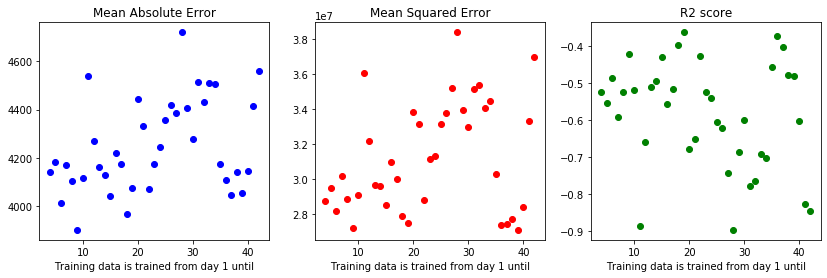

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve, roc_auc_score, r2_score, mean_squared_error, mean_absolute_error

# Labels are the values we want to predict
labels = data_dropnan2['today_steps']

# Convert categorical data into dummy variables
features = data_dropnan2.drop(['today_steps',"ID_DIAMANTE","difference_from_yesterday_steps"], axis = 1)
features = pd.get_dummies(features)

# Create a vector to store mean absolute error (MAE)
MAE = np.zeros(39)
# Create a vector to store mean squared error (MSE)
MSE = np.zeros(39)
# Create a vector to store R^2 score (R2 score)
R2score = np.zeros(39)

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(14,4))

# Split into Xtrain, Xtest, Ytrain, Ytest
for i in range(4,43):
    index = 1
    train_index, test_index = features[features.Study_Day <= i].index, features[features.Study_Day > i].index
    train_index, test_index = list(train_index), list(test_index)
    Xtrain, ytrain = np.array(features.loc[train_index]), np.array(labels.loc[train_index])
    Xtest, ytest = np.array(features.loc[test_index]), np.array(labels.loc[test_index])

    # Decision trees
    regressor = DecisionTreeRegressor(random_state=10)
    
    # fit the regressor with X and Y data 
    regressor.fit(Xtrain, ytrain) 
    
    # Use the decision tree predict method on the test data
    regressor_predict_train = regressor.predict(Xtrain)
    
    # Use the decision tree predict method on the test data
    regressor_predict_test = regressor.predict(Xtest)

    # Calculate the mean absolute errors for testing data
    errors_test = mean_absolute_error(ytest, regressor_predict_test)
    
    # Print out the mean absolute error (MAE) for testing data
    print('Mean Absolute Error:', round(errors_test, 4), "with training data from day 1 to day", i
          , "and test data from day", i+1, "onwards.")
    MAE[index] = round(errors_test, 4)
    ax1.plot(i, MAE[index], "bo")
    ax1.set_title("Mean Absolute Error")
    ax1.set(xlabel="Training data is trained from day 1 until")

    # Calculate the mean squared errors for testing data
    mse_test = mean_squared_error(ytest, regressor_predict_test)

    # Print out the mean squared error (MSE) for training data
    print('Mean Squared Error:', round(mse_test, 4), "with training data from day 1 to day", i
         , "and test data from day", i+1, "onwards.")
    MSE[index] = round(mse_test, 4)
    ax2.plot(i, MSE[index], "ro")
    ax2.set_title("Mean Squared Error")
    ax2.set(xlabel="Training data is trained from day 1 until")
    
    ### MSE but using formula instead of from sklearn.metrics
    # print('Mean Squared Error:',((regressor_predict_test - ytest) ** 2).mean())
    
    # Print R^2 score for training data
    r2score_test = r2_score(ytest, regressor_predict_test)
    print("R^2 score:", round(r2score_test, 4), "with training data from day 1 to day", i
         , "and test data from day", i+1, "onwards.")
    R2score[index] = r2score_test
    ax3.plot(i, R2score[index], "go")
    ax3.set_title("R2 score")
    ax3.set(xlabel="Training data is trained from day 1 until")

plt.show()

# Seems like MSE for the training data from day 1 to day 40 and test data from day 41 to day 45 is the lowest. 
# This is the same for random forest as well


In [27]:
from sklearn import tree
import graphviz
from sklearn.metrics import f1_score, mean_squared_error

# Convert categorical data into dummy variables
features = data_dropnan2.drop(['today_steps',"ID_DIAMANTE","difference_from_yesterday_steps"], axis = 1)
features = pd.get_dummies(features)

# Lowest MSE on training data Study day 1 to day 40
index = 40
train_index, test_index = features[features.Study_Day <= i].index, features[features.Study_Day > i].index
train_index, test_index = list(train_index), list(test_index)
Xtrain, ytrain = np.array(features.loc[train_index]), np.array(labels.loc[train_index])
Xtest, ytest = np.array(features.loc[test_index]), np.array(labels.loc[test_index])

# Decision trees
regressor = DecisionTreeRegressor(random_state=10)

# fit the regressor with X and Y data 
regressor.fit(Xtrain, ytrain) 

# Predictions for testing set
regressor_predict_test = regressor.predict(Xtest)
print('Test Set Mean Squared Error =>', mean_squared_error(ytest, regressor_predict_test))

# Plot the tree
#fig = plt.figure(figsize=(50,50))
# tree.plot_tree(regressor)

# save to file
#fig.savefig("decistion_tree.png")


Test Set Mean Squared Error => 36939962.71126967


### We try some random forest, using regression first

### Fitting a multilevel model based on the decision tree obtained in R with training data from Study day 1 to 40 and test data from Study day 41 to 45

In [28]:
# THIS IS WITH variables from the decision tree obtained in R
f1 = "today_steps ~ C(arm) + C(social_rel) + yesterday_steps + daily_goal + C(feedback) + C(lonely_cat) + C(motivational) + C(Week_Day) + C(health_status) + C(health_lit) + BADS_sum + GAD_sum + C(phq_cat)"
mod_lme = MixedLM.from_formula(f1, groups="ID_DIAMANTE", re_formula="Study_Day", data=data_dropnan2) # default re_intercept gives a random intercept for each group
mod_lme = mod_lme.fit()        
mod_lme.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                       Mixed Linear Model Regression Results
===================================================================================================================
Model:                                MixedLM                   Dependent Variable:                   today_steps  
No. Observations:                     2832                      Method:                               REML         
No. Groups:                           76                        Scale:                                12785497.4194
Min. group size:                      14                        Likelihood:                           -27052.2102  
Max. group size:                      45                        Converged:                            Yes          
Mean group size:                      37.3                                                                         
-------------------------------------------------------------------------------------------------------------------
                                                                 Coef.    Std.Err.   z    P>|z|   [0.025    0.975] 
-------------------------------------------------------------------------------------------------------------------
Intercept                                                         489.180 1432.881  0.341 0.733 -2319.215  3297.575
C(arm)[T.1]                                                      -129.519  406.004 -0.319 0.750  -925.272   666.234
C(social_rel)[T.About once per week]                              210.965  745.100  0.283 0.777 -1249.405  1671.335
C(social_rel)[T.I do not attend church or religious services]     437.923  547.821  0.799 0.424  -635.785  1511.632
C(social_rel)[T.Once a month or less]                           -1156.938  847.442 -1.365 0.172 -2817.894   504.019
C(social_rel)[T.Several times per week]                           960.279  984.372  0.976 0.329  -969.054  2889.612
C(feedback)[T.F1]                                                 353.489  210.890  1.676 0.094   -59.848   766.826
C(feedback)[T.F2]                                                 106.986  211.223  0.507 0.612  -307.003   520.976
C(feedback)[T.F3]                                                  73.366  216.888  0.338 0.735  -351.727   498.460
C(feedback)[T.F4]                                                  79.453  212.773  0.373 0.709  -337.574   496.480
C(lonely_cat)[T.lonely]                                             7.960  477.880  0.017 0.987  -928.667   944.588
C(motivational)[T.M1]                                             141.582  200.246  0.707 0.480  -250.893   534.056
C(motivational)[T.M2]                                            -126.365  192.560 -0.656 0.512  -503.775   251.045
C(motivational)[T.M3]                                              58.778  192.028  0.306 0.760  -317.589   435.145
C(Week_Day)[T.Mon]                                              -1217.591  258.269 -4.714 0.000 -1723.788  -711.393
C(Week_Day)[T.Sat]                                              -1334.504  249.586 -5.347 0.000 -1823.683  -845.324
C(Week_Day)[T.Sun]                                              -2363.002  256.103 -9.227 0.000 -2864.956 -1861.049
C(Week_Day)[T.Thu]                                               -398.123  245.715 -1.620 0.105  -879.716    83.470
C(Week_Day)[T.Tue]                                               -572.559  251.046 -2.281 0.023 -1064.599   -80.518
C(Week_Day)[T.Wed]                                               -787.253  248.581 -3.167 0.002 -1274.462  -300.044
C(health_status)[T.Fair]                                          380.983  983.814  0.387 0.699 -1547.256  2309.222
C(health_status)[T.Good]                                          280.076  493.389  0.568 0.570  -686.949  1247.101
C(health_status)[T.Very Good]                                     719.262  473.700  1.518 0.129  -209.173  1647.696
C(health_lit)[T.Extremely]                    

### Fitting a multilevel model based on the pruned decision tree obtained in R with training data from Study day 1 to 40 and test data from Study day 41 to 45 with 6-node tree

In [29]:
# THIS IS WITH variables from the pruned decision tree obtained in R
f1 = "today_steps ~ C(arm) + C(social_phone) + yesterday_steps + daily_goal + C(health_lit)"
mod_lme = MixedLM.from_formula(f1, groups="ID_DIAMANTE", re_formula="Study_Day", data=data_dropnan2) # default re_intercept gives a random intercept for each group
mod_lme = mod_lme.fit()        
mod_lme.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                        Mixed Linear Model Regression Results
======================================================================================================================
Model:                                 MixedLM                    Dependent Variable:                    today_steps  
No. Observations:                      2832                       Method:                                REML         
No. Groups:                            76                         Scale:                                 13285748.2812
Min. group size:                       14                         Likelihood:                            -27239.9428  
Max. group size:                       45                         Converged:                             Yes          
Mean group size:                       37.3                                                                           
----------------------------------------------------------------------------------------------------------------------
                                                                     Coef.    Std.Err.   z    P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------------------------------------------------
Intercept                                                            1647.589  959.008  1.718 0.086  -232.032 3527.210
C(arm)[T.1]                                                          -234.609  408.451 -0.574 0.566 -1035.159  565.941
C(social_phone)[T.About once a day]                                   -17.874  672.801 -0.027 0.979 -1336.540 1300.792
C(social_phone)[T.About once per week]                                162.178  689.122  0.235 0.814 -1188.477 1512.833
C(social_phone)[T.Less than everyday, but several times per week]    -490.755  673.416 -0.729 0.466 -1810.626  829.116
C(social_phone)[T.Several times a day]                                -95.537  620.063 -0.154 0.878 -1310.839 1119.765
C(health_lit)[T.Extremely]                                           -698.506  670.759 -1.041 0.298 -2013.169  616.157
C(health_lit)[T.Not at all]                                          1203.604 1077.643  1.117 0.264  -908.537 3315.745
C(health_lit)[T.Quite a bit]                                         -448.695  646.622 -0.694 0.488 -1716.051  818.661
C(health_lit)[T.Somewhat]                                            -269.617  639.982 -0.421 0.674 -1523.960  984.726
yesterday_steps                                                         0.124    0.020  6.280 0.000     0.085    0.163
daily_goal                                                              0.692    0.083  8.303 0.000     0.528    0.855
ID_DIAMANTE Var                                                   2033852.965  173.597                                
ID_DIAMANTE x Study_Day Cov                                         -8513.689    3.651                                
Study_Day Var                                                         103.916    0.103                                
======================================================================================================================

"""

### Fitting a multilevel model based on the variable importance obtained from the random forest algorithm that was trained in R

In [30]:
# THIS IS WITH variables from the random forest obtained in R
f1 = "today_steps ~ C(arm) + yesterday_steps + daily_goal + C(Week_Day) + C(feedback) + C(time_msg) + C(motivational)"
mod_lme = MixedLM.from_formula(f1, groups="ID_DIAMANTE", re_formula="Study_Day", data=data_dropnan2) # default re_intercept gives a random intercept for each group
mod_lme = mod_lme.fit()        
mod_lme.summary()

C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Che

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
==================================================================================
Model:                     MixedLM        Dependent Variable:        today_steps  
No. Observations:          2832           Method:                    REML         
No. Groups:                76             Scale:                     12460314.3715
Min. group size:           14             Likelihood:                -27453.9716  
Max. group size:           45             Converged:                 No           
Mean group size:           37.3                                                   
----------------------------------------------------------------------------------
                               Coef.     Std.Err.   z    P>|z|   [0.025    0.975] 
----------------------------------------------------------------------------------
Intercept                       2230.837  974.502  2.289 0.022   320.847  4140.826
C(arm)[T.1]                      153.735  476.560  0.323 0.747  -780.305  1087.775
C(Week_Day)[T.Mon]             -1243.079  255.708 -4.861 0.000 -1744.258  -741.900
C(Week_Day)[T.Sat]             -1329.225  246.763 -5.387 0.000 -1812.873  -845.578
C(Week_Day)[T.Sun]             -2384.078  253.328 -9.411 0.000 -2880.592 -1887.563
C(Week_Day)[T.Thu]              -372.133  243.280 -1.530 0.126  -848.952   104.686
C(Week_Day)[T.Tue]              -561.784  248.918 -2.257 0.024 -1049.654   -73.914
C(Week_Day)[T.Wed]              -744.247  246.493 -3.019 0.003 -1227.365  -261.130
C(feedback)[T.F1]                187.564  266.269  0.704 0.481  -334.313   709.441
C(feedback)[T.F2]                -68.041  263.980 -0.258 0.797  -585.433   449.351
C(feedback)[T.F3]               -117.612  266.794 -0.441 0.659  -640.519   405.295
C(feedback)[T.F4]               -140.180  268.770 -0.522 0.602  -666.959   386.599
C(time_msg)[T.T1]                146.607  339.931  0.431 0.666  -519.646   812.861
C(time_msg)[T.T2]                491.426  339.573  1.447 0.148  -174.125  1156.977
C(time_msg)[T.T3]                610.416  338.146  1.805 0.071   -52.339  1273.171
C(time_msg)[T.T4]                365.453  341.827  1.069 0.285  -304.515  1035.422
C(motivational)[T.M1]             29.388  224.625  0.131 0.896  -410.869   469.645
C(motivational)[T.M2]           -285.368  218.142 -1.308 0.191  -712.918   142.183
C(motivational)[T.M3]           -108.661  220.209 -0.493 0.622  -540.262   322.940
yesterday_steps                    0.089    0.019  4.564 0.000     0.051     0.127
daily_goal                         0.703    0.096  7.309 0.000     0.514     0.891
ID_DIAMANTE Var              1906059.092  150.770                                 
ID_DIAMANTE x Study_Day Cov    95984.379  915.433                                 
Study_Day Var               20411123.802                                          
==================================================================================

"""

## Training on data using different Study_Day instead of randomly assigning to training data

Mean Absolute Error: 2988.2 with training data from day 1 to day 4 and test data from day 5 onwards.
Mean Squared Error: 15047809.15 with training data from day 1 to day 4 and test data from day 5 onwards.
R^2 score: 0.2019 with training data from day 1 to day 4 and test data from day 5 onwards.
Mean Absolute Error: 2930.46 with training data from day 1 to day 5 and test data from day 6 onwards.
Mean Squared Error: 14528741.69 with training data from day 1 to day 5 and test data from day 6 onwards.
R^2 score: 0.2338 with training data from day 1 to day 5 and test data from day 6 onwards.
Mean Absolute Error: 2884.16 with training data from day 1 to day 6 and test data from day 7 onwards.
Mean Squared Error: 14396172.37 with training data from day 1 to day 6 and test data from day 7 onwards.
R^2 score: 0.2404 with training data from day 1 to day 6 and test data from day 7 onwards.
Mean Absolute Error: 2876.71 with training data from day 1 to day 7 and test data from day 8 onwards.
Mean 

Mean Absolute Error: 3045.56 with training data from day 1 to day 32 and test data from day 33 onwards.
Mean Squared Error: 15627691.27 with training data from day 1 to day 32 and test data from day 33 onwards.
R^2 score: 0.2209 with training data from day 1 to day 32 and test data from day 33 onwards.
Mean Absolute Error: 2994.3 with training data from day 1 to day 33 and test data from day 34 onwards.
Mean Squared Error: 15169025.07 with training data from day 1 to day 33 and test data from day 34 onwards.
R^2 score: 0.2455 with training data from day 1 to day 33 and test data from day 34 onwards.
Mean Absolute Error: 2998.87 with training data from day 1 to day 34 and test data from day 35 onwards.
Mean Squared Error: 15243263.99 with training data from day 1 to day 34 and test data from day 35 onwards.
R^2 score: 0.2472 with training data from day 1 to day 34 and test data from day 35 onwards.
Mean Absolute Error: 3075.23 with training data from day 1 to day 35 and test data from d

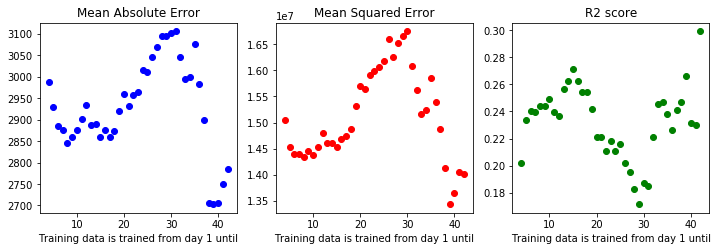

In [31]:
# We try using different training data on the full dataset data_dropnan2 and then pick the one that gives us the lowest
# mean squared error. Then using that training data we then find the important features from that random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import math

# Labels are the values we want to predict
labels = data_dropnan2['today_steps']

# Convert categorical data into dummy variables
features = data_dropnan2.drop(['today_steps',"ID_DIAMANTE","difference_from_yesterday_steps"], axis = 1)
features = pd.get_dummies(features)

# Create a vector to store mean absolute error (MAE)
MAE = np.zeros(39)
# Create a vector to store mean squared error (MSE)
MSE = np.zeros(39)
# Create a vector to store R^2 score (R2 score)
R2score = np.zeros(39)

# Number of trees needed for random forest is typically set as p/3 (regression) # From DSA4211
m = math.floor(features.shape[1]/3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3.5))

# Split into Xtrain, Xtest, Ytrain, Ytest
for i in range(4,43):
    index = 1
    train_index, test_index = features[features.Study_Day <= i].index, features[features.Study_Day > i].index
    train_index, test_index = list(train_index), list(test_index)
    Xtrain, ytrain = np.array(features.loc[train_index]), np.array(labels.loc[train_index])
    Xtest, ytest = np.array(features.loc[test_index]), np.array(labels.loc[test_index])

    # Instantiate model with m decision trees
    rf = RandomForestRegressor(n_estimators = 1000, max_features = m, random_state = 10)
    # Train the model on training data
    rf.fit(Xtrain, ytrain)
    
    # Use the forest's predict method on the test data
    predictions = rf.predict(Xtest)

    # Calculate the absolute errors
    errors = abs(predictions - ytest)
    # Print out the mean absolute error (MAE)
    print('Mean Absolute Error:', round(np.mean(errors), 2), "with training data from day 1 to day", i
          , "and test data from day", i+1, "onwards.")
    MAE[index] = round(np.mean(errors), 2)
    ax1.plot(i, MAE[index], "bo")
    ax1.set_title("Mean Absolute Error")
    ax1.set(xlabel="Training data is trained from day 1 until")
    
    # Print out the mean squared error (MSE)
    mse = np.mean((ytest-predictions)**2)
    print('Mean Squared Error:', round(mse, 2), "with training data from day 1 to day", i
         , "and test data from day", i+1, "onwards.")
    MSE[index] = mse
    ax2.plot(i, MSE[index], "ro")
    ax2.set_title("Mean Squared Error")
    ax2.set(xlabel="Training data is trained from day 1 until")
    
    # Print R^2 score
    r2score = r2_score(ytest, predictions)
    print("R^2 score:", round(r2score, 4), "with training data from day 1 to day", i
         , "and test data from day", i+1, "onwards.")
    R2score[index] = r2score
    ax3.plot(i, R2score[index], "go")
    ax3.set_title("R2 score")
    ax3.set(xlabel="Training data is trained from day 1 until")
    
    index += 1

plt.show()

### It seems that from above the mean squared error and mean absolute error seems to be the lowest when we train the data on more days. Training data from day 1 to day 39 is the lowest. Then we try to get out the importance of the variables and see

In [37]:
## We use training data from day 1 to day 39 and test data from day 40 to day 45
train_index, test_index = features[features.Study_Day <= 39].index, features[features.Study_Day > 39].index
train_index, test_index = list(train_index), list(test_index)
Xtrain, ytrain = np.array(features.loc[train_index]), np.array(labels.loc[train_index])
Xtest, ytest = np.array(features.loc[test_index]), np.array(labels.loc[test_index])

# Number of trees needed for random forest is typically set as p/3 (regression) # From DSA4211
m = math.floor(features.shape[1]/3)

# Instantiate model with m decision trees
rf = RandomForestRegressor(n_estimators = 1000, max_features = m, random_state = 10)
# Train the model on training data
rf.fit(Xtrain, ytrain)

# Get numerical feature importances
importances = list(rf.feature_importances_)

# Feature_list
feature_list = list(features.columns)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: yesterday_steps      Importance: 0.177
Variable: daily_goal           Importance: 0.104
Variable: Study_Day            Importance: 0.099
Variable: neighborhood_sum     Importance: 0.027
Variable: WeekDay_dummy        Importance: 0.022
Variable: BADS_sum             Importance: 0.021
Variable: leids_sum            Importance: 0.018
Variable: PA_sum               Importance: 0.018
Variable: Week_Day_Fri         Importance: 0.018
Variable: Week_Day_Sun         Importance: 0.018
Variable: Week_Day_Sat         Importance: 0.015
Variable: motivational_M2      Importance: 0.014
Variable: time_msg_T3          Importance: 0.014
Variable: phq_sumnew           Importance: 0.013
Variable: GAD_sum              Importance: 0.013
Variable: feedback_F4          Importance: 0.013
Variable: motivational_M0      Importance: 0.013
Variable: time_msg_T1          Importance: 0.013
Variable: adults_household     Importance: 0.012
Variable: Week_Day_Thu         Importance: 0.012
Variable: feedback_F

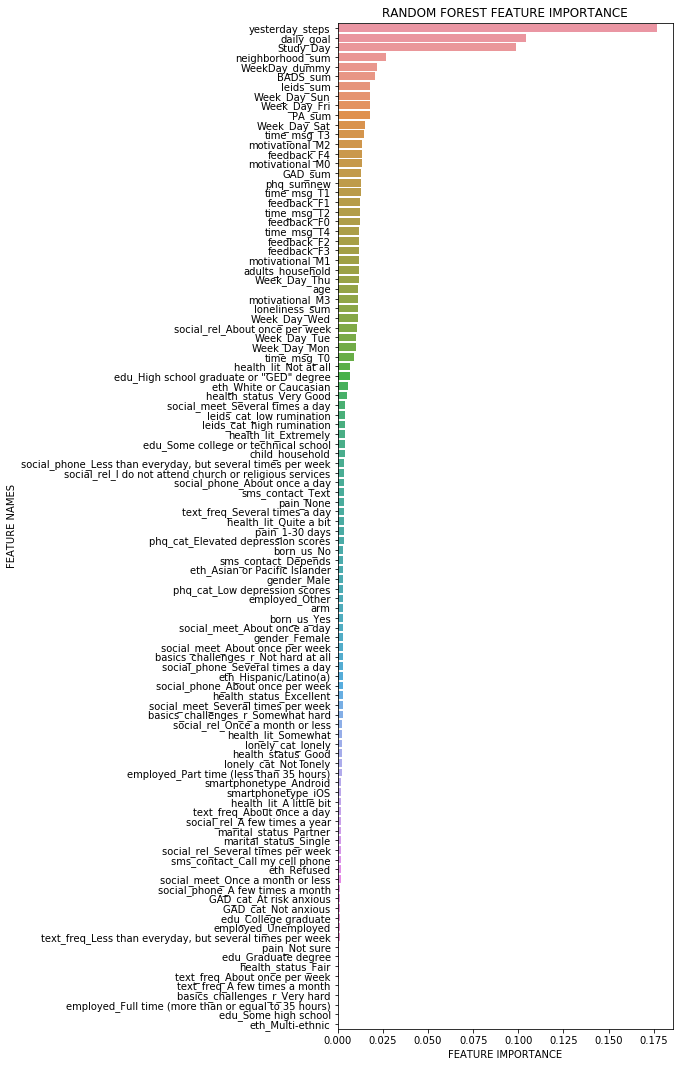

In [38]:
# Plotting out the importance of the variables
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(6,18.5))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.savefig('RF importance.jpg', bbox_inches = 'tight')

plot_feature_importance(importances, features.loc[train_index].columns, "RANDOM FOREST")

### Now we fit a multi level model with the important variables from the above random forest

In [39]:
data_dropnan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2832 entries, 0 to 3769
Data columns (total 42 columns):
ID_DIAMANTE                        2832 non-null object
Study_Day                          2832 non-null int64
Week_Day                           2832 non-null object
WeekDay_dummy                      2832 non-null int64
age                                2832 non-null int64
gender                             2832 non-null object
eth                                2832 non-null object
edu                                2832 non-null object
employed                           2832 non-null object
basics_challenges_r                2832 non-null object
marital_status                     2832 non-null object
adults_household                   2832 non-null int64
child_household                    2832 non-null int64
born_us                            2832 non-null object
health_lit                         2832 non-null object
health_status                      2832 non-null object
pa

In [40]:
# THIS IS WITH variables from the random forest obtained in the above random forest, take out WeekDay_dummy
# Add all variables
full = "today_steps ~ C(arm) + C(Week_Day,Treatment(reference='Mon')) + age + C(gender) + C(eth) + C(edu) + C(employed) + C(basics_challenges_r) + C(marital_status) + adults_household + child_household + C(born_us) + C(health_lit) + C(health_status) + C(pain) + C(social_phone) + C(social_meet) + C(social_rel) + C(sms_contact) + C(text_freq) + C(smartphonetype) + phq_sumnew + GAD_sum + leids_sum + BADS_sum + neighborhood_sum + loneliness_sum + PA_sum + C(phq_cat) + C(GAD_cat) + C(leids_cat) + C(lonely_cat) + C(feedback) + C(motivational) + C(time_msg) + daily_goal + yesterday_steps"
mod_lme = MixedLM.from_formula(full, groups="ID_DIAMANTE", re_formula="Study_Day", data=data_dropnan2) # default re_intercept gives a random intercept for each group
mod_lme = mod_lme.fit()        
mod_lme.summary()

C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2566: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid v

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                          Mixed Linear Model Regression Results
==========================================================================================================================
Model:                                 MixedLM                      Dependent Variable:                      today_steps  
No. Observations:                      2832                         Method:                                  REML         
No. Groups:                            76                           Scale:                                   12655555.4891
Min. group size:                       14                           Likelihood:                              -26690.3983  
Max. group size:                       45                           Converged:                               Yes          
Mean group size:                       37.3                                                                               
--------------------------------------------------------------------------------------------------------------------------
                                                                     Coef.     Std.Err.    z    P>|z|   [0.025     0.975] 
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                           -9015.172 13449.414  -0.670 0.503 -35375.539 17345.196
C(arm)[T.1]                                                          -665.766  1088.501  -0.612 0.541  -2799.189  1467.656
C(Week_Day, Treatment(reference='Mon'))[T.Fri]                       1263.560   257.233   4.912 0.000    759.393  1767.727
C(Week_Day, Treatment(reference='Mon'))[T.Sat]                        -65.446   260.631  -0.251 0.802   -576.272   445.380
C(Week_Day, Treatment(reference='Mon'))[T.Sun]                      -1140.674   261.894  -4.355 0.000  -1653.977  -627.371
C(Week_Day, Treatment(reference='Mon'))[T.Thu]                        881.030   255.132   3.453 0.001    380.981  1381.079
C(Week_Day, Treatment(reference='Mon'))[T.Tue]                        682.989   257.784   2.649 0.008    177.742  1188.236
C(Week_Day, Treatment(reference='Mon'))[T.Wed]                        483.438   257.482   1.878 0.060    -21.217   988.093
C(gender)[T.Male]                                                    1206.976                                             
C(eth)[T.Hispanic/Latino(a)]                                         -483.629  1603.740  -0.302 0.763  -3626.902  2659.644
C(eth)[T.Multi-ethnic]                                                357.376  3348.515   0.107 0.915  -6205.593  6920.344
C(eth)[T.Refused]                                                   -6693.474  5095.494  -1.314 0.189 -16680.458  3293.510
C(eth)[T.White or Caucasian]                                         1177.721  1407.406   0.837 0.403  -1580.744  3936.187
C(edu)[T.Graduate degree]                                           -5038.793  3964.200  -1.271 0.204 -12808.481  2730.895
C(edu)[T.High school graduate or "GED" degree]                       -351.532  2614.072  -0.134 0.893  -5475.018  4771.955
C(edu)[T.Some college or technical school]                          -1498.128  2323.645  -0.645 0.519  -6052.388  3056.133
C(edu)[T.Some high school]                                          -1133.795  4891.849  -0.232 0.817 -10721.644  8454.054
C(employed)[T.Other]                                                15767.055  6762.437   2.332 0.020   2512.922 29021.188
C(employed)[T.Part time (less than 35 hours)]                       16748.883  4899.315   3.419 0.001   7146.401 26351.365
C(employed)[T.Unemployed]                                           16066.988  5808.144   2.766 0.006   4683.235 27450.741
C(basics_challenges_r)[T.Somewhat hard]                               670.442   957.929   0.700 0.484  -1207.065  2547.948
C(basics_challenges_r)[T.Very hard]                       

In [41]:
# THIS IS WITH variables from the random forest obtained in the above random forest, take out WeekDay_dummy
# Add variables with importance until 0.011 (until before social_rel) and also add in Feedback, Motivational, time_msg
f1 = "today_steps ~ C(arm) + yesterday_steps + daily_goal + neighborhood_sum + BADS_sum + PA_sum + C(Week_Day,Treatment(reference='Mon')) + leids_sum + C(motivational) + C(time_msg) + adults_household + phq_sumnew + GAD_sum + C(feedback) + age + loneliness_sum"
mod_lme = MixedLM.from_formula(f1, groups="ID_DIAMANTE", re_formula="Study_Day", data=data_dropnan2) # default re_intercept gives a random intercept for each group
mod_lme = mod_lme.fit()        
mod_lme.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Mixed Linear Model Regression Results
===================================================================================================
Model:                          MixedLM              Dependent Variable:              today_steps  
No. Observations:               2832                 Method:                          REML         
No. Groups:                     76                   Scale:                           12779990.8648
Min. group size:                14                   Likelihood:                      -27092.3521  
Max. group size:                45                   Converged:                       Yes          
Mean group size:                37.3                                                               
---------------------------------------------------------------------------------------------------
                                                  Coef.    Std.Err.   z    P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------------------------------
Intercept                                         2795.352 2381.360  1.174 0.240 -1872.027 7462.732
C(arm)[T.1]                                       -309.405  414.819 -0.746 0.456 -1122.435  503.625
C(Week_Day, Treatment(reference='Mon'))[T.Fri]    1191.382  258.479  4.609 0.000   684.772 1697.993
C(Week_Day, Treatment(reference='Mon'))[T.Sat]    -143.062  261.943 -0.546 0.585  -656.461  370.337
C(Week_Day, Treatment(reference='Mon'))[T.Sun]   -1175.965  263.140 -4.469 0.000 -1691.710 -660.220
C(Week_Day, Treatment(reference='Mon'))[T.Thu]     805.193  256.456  3.140 0.002   302.548 1307.837
C(Week_Day, Treatment(reference='Mon'))[T.Tue]     635.563  258.963  2.454 0.014   128.005 1143.120
C(Week_Day, Treatment(reference='Mon'))[T.Wed]     414.447  258.643  1.602 0.109   -92.484  921.377
C(motivational)[T.M1]                               25.214  225.621  0.112 0.911  -416.995  467.422
C(motivational)[T.M2]                             -256.110  219.507 -1.167 0.243  -686.334  174.115
C(motivational)[T.M3]                              -85.663  221.292 -0.387 0.699  -519.388  348.062
C(time_msg)[T.T1]                                   98.290  339.789  0.289 0.772  -567.684  764.265
C(time_msg)[T.T2]                                  464.434  338.737  1.371 0.170  -199.478 1128.346
C(time_msg)[T.T3]                                  557.397  337.273  1.653 0.098  -103.646 1218.440
C(time_msg)[T.T4]                                  357.363  340.748  1.049 0.294  -310.491 1025.217
C(feedback)[T.F1]                                  173.920  267.841  0.649 0.516  -351.037  698.878
C(feedback)[T.F2]                                  -73.535  265.117 -0.277 0.781  -593.155  446.085
C(feedback)[T.F3]                                 -107.410  267.931 -0.401 0.689  -632.545  417.725
C(feedback)[T.F4]                                 -100.168  270.068 -0.371 0.711  -629.492  429.157
yesterday_steps                                      0.111    0.020  5.575 0.000     0.072    0.150
daily_goal                                           0.671    0.090  7.433 0.000     0.494    0.848
neighborhood_sum                                   -50.091   44.450 -1.127 0.260  -137.210   37.029
BADS_sum                                            33.405   34.693  0.963 0.336   -34.591  101.402
PA_sum                                              -2.411    1.642 -1.468 0.142    -5.629    0.808
leids_sum                                           41.250   40.339  1.023 0.307   -37.812  120.312
adults_household                                    13.426   29.190  0.460 0.646   -43.785   70.636
phq_sumnew                                          23.830   71.534  0.333 0.739  -116.375  164.035
GAD_sum                                            -33.284   49.900 -0.667 0.505  -131.086   64.518
age                                                -66.166   80.054 -0.827 0.409  

In [42]:
# THIS IS WITH variables from the random forest obtained in the above random forest, take out WeekDay_dummy
# Add variables with importance until 0.012
f2 = "today_steps ~ C(arm) + yesterday_steps + daily_goal + neighborhood_sum + BADS_sum + PA_sum + C(Week_Day,Treatment(reference='Mon')) + leids_sum + C(motivational) + C(time_msg) + adults_household + phq_sumnew + GAD_sum + C(feedback)"
mod_lme = MixedLM.from_formula(f2, groups="ID_DIAMANTE", re_formula="Study_Day", data=data_dropnan2) # default re_intercept gives a random intercept for each group
mod_lme = mod_lme.fit()        
mod_lme.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Mixed Linear Model Regression Results
===================================================================================================
Model:                          MixedLM              Dependent Variable:              today_steps  
No. Observations:               2832                 Method:                          REML         
No. Groups:                     76                   Scale:                           12781269.1576
Min. group size:                14                   Likelihood:                      -27104.5854  
Max. group size:                45                   Converged:                       Yes          
Mean group size:                37.3                                                               
---------------------------------------------------------------------------------------------------
                                                  Coef.    Std.Err.   z    P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------------------------------
Intercept                                          433.696 1405.413  0.309 0.758 -2320.863 3188.255
C(arm)[T.1]                                       -197.608  405.392 -0.487 0.626  -992.163  596.946
C(Week_Day, Treatment(reference='Mon'))[T.Fri]    1189.206  258.492  4.601 0.000   682.572 1695.840
C(Week_Day, Treatment(reference='Mon'))[T.Sat]    -144.970  261.955 -0.553 0.580  -658.393  368.452
C(Week_Day, Treatment(reference='Mon'))[T.Sun]   -1177.335  263.158 -4.474 0.000 -1693.115 -661.555
C(Week_Day, Treatment(reference='Mon'))[T.Thu]     803.248  256.470  3.132 0.002   300.577 1305.919
C(Week_Day, Treatment(reference='Mon'))[T.Tue]     633.071  258.975  2.445 0.015   125.489 1140.653
C(Week_Day, Treatment(reference='Mon'))[T.Wed]     410.520  258.653  1.587 0.112   -96.431  917.471
C(motivational)[T.M1]                               18.951  225.572  0.084 0.933  -423.162  461.065
C(motivational)[T.M2]                             -258.429  219.503 -1.177 0.239  -688.647  171.790
C(motivational)[T.M3]                              -84.230  221.319 -0.381 0.704  -518.007  349.546
C(time_msg)[T.T1]                                   98.992  339.781  0.291 0.771  -566.967  764.951
C(time_msg)[T.T2]                                  470.287  338.703  1.388 0.165  -193.558 1134.133
C(time_msg)[T.T3]                                  560.508  337.263  1.662 0.097  -100.516 1221.532
C(time_msg)[T.T4]                                  356.738  340.747  1.047 0.295  -311.114 1024.590
C(feedback)[T.F1]                                  170.407  267.796  0.636 0.525  -354.463  695.277
C(feedback)[T.F2]                                  -78.595  265.091 -0.296 0.767  -598.165  440.974
C(feedback)[T.F3]                                 -115.575  267.881 -0.431 0.666  -640.612  409.461
C(feedback)[T.F4]                                 -101.662  270.072 -0.376 0.707  -630.994  427.670
yesterday_steps                                      0.112    0.020  5.621 0.000     0.073    0.151
daily_goal                                           0.706    0.088  8.060 0.000     0.535    0.878
neighborhood_sum                                   -49.682   44.538 -1.115 0.265  -136.975   37.611
BADS_sum                                            32.545   34.848  0.934 0.350   -35.756  100.845
PA_sum                                              -2.163    1.644 -1.316 0.188    -5.385    1.059
leids_sum                                           33.481   40.079  0.835 0.404   -45.073  112.035
adults_household                                    21.956   28.766  0.763 0.445   -34.425   78.337
phq_sumnew                                          -4.415   68.416 -0.065 0.949  -138.507  129.677
GAD_sum                                            -43.527   49.743 -0.875 0.382  -141.021   53.966
ID_DIAMANTE Var                                2125028.064  174.502               

In [43]:
# THIS IS WITH variables from the random forest obtained in the above random forest, take out WeekDay_dummy
# Add variables with importance until 0.014
f3 = "today_steps ~ C(arm) + yesterday_steps + daily_goal + neighborhood_sum + leids_sum + BADS_sum + PA_sum + C(Week_Day,Treatment(reference='Mon')) + C(motivational) + C(time_msg)"
mod_lme = MixedLM.from_formula(f3, groups="ID_DIAMANTE", re_formula="Study_Day", data=data_dropnan2) # default re_intercept gives a random intercept for each group
mod_lme = mod_lme.fit()        
mod_lme.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Mixed Linear Model Regression Results
===================================================================================================
Model:                          MixedLM              Dependent Variable:              today_steps  
No. Observations:               2832                 Method:                          REML         
No. Groups:                     76                   Scale:                           12776489.4892
Min. group size:                14                   Likelihood:                      -27145.6983  
Max. group size:                45                   Converged:                       Yes          
Mean group size:                37.3                                                               
---------------------------------------------------------------------------------------------------
                                                  Coef.    Std.Err.   z    P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------------------------------
Intercept                                          804.814 1355.570  0.594 0.553 -1852.054 3461.682
C(arm)[T.1]                                       -246.461  398.745 -0.618 0.537 -1027.987  535.065
C(Week_Day, Treatment(reference='Mon'))[T.Fri]    1182.091  258.037  4.581 0.000   676.347 1687.835
C(Week_Day, Treatment(reference='Mon'))[T.Sat]    -167.004  261.309 -0.639 0.523  -679.160  345.152
C(Week_Day, Treatment(reference='Mon'))[T.Sun]   -1191.080  262.682 -4.534 0.000 -1705.926 -676.233
C(Week_Day, Treatment(reference='Mon'))[T.Thu]     787.895  255.692  3.081 0.002   286.749 1289.042
C(Week_Day, Treatment(reference='Mon'))[T.Tue]     628.828  258.685  2.431 0.015   121.815 1135.842
C(Week_Day, Treatment(reference='Mon'))[T.Wed]     406.009  258.561  1.570 0.116  -100.761  912.779
C(motivational)[T.M1]                               18.697  221.771  0.084 0.933  -415.966  453.360
C(motivational)[T.M2]                             -258.491  215.221 -1.201 0.230  -680.318  163.335
C(motivational)[T.M3]                              -84.364  215.680 -0.391 0.696  -507.089  338.361
C(time_msg)[T.T1]                                   73.583  254.903  0.289 0.773  -426.018  573.184
C(time_msg)[T.T2]                                  449.442  254.015  1.769 0.077   -48.417  947.302
C(time_msg)[T.T3]                                  533.198  253.003  2.107 0.035    37.320 1029.076
C(time_msg)[T.T4]                                  343.122  253.206  1.355 0.175  -153.152  839.396
yesterday_steps                                      0.114    0.020  5.726 0.000     0.075    0.153
daily_goal                                           0.679    0.085  8.023 0.000     0.513    0.844
neighborhood_sum                                   -54.889   43.512 -1.261 0.207  -140.172   30.394
leids_sum                                           17.222   34.721  0.496 0.620   -50.831   85.274
BADS_sum                                            32.334   33.422  0.967 0.333   -33.172   97.840
PA_sum                                              -1.746    1.543 -1.132 0.258    -4.769    1.278
ID_DIAMANTE Var                                2054061.539  167.824                                
ID_DIAMANTE x Study_Day Cov                      -8228.984    3.584                                
Study_Day Var                                      184.641    0.106                                
===================================================================================================

"""

In [44]:
# THIS IS WITH variables from the random forest obtained in the above random forest, take out WeekDay_dummy
# Add variables with importance until 0.017
f4 = "today_steps ~ C(arm) + yesterday_steps + daily_goal + neighborhood_sum + BADS_sum + PA_sum + C(Week_Day) + leids_sum"
mod_lme = MixedLM.from_formula(f4, groups="ID_DIAMANTE", re_formula="Study_Day", data=data_dropnan2) # default re_intercept gives a random intercept for each group
mod_lme = mod_lme.fit()        
mod_lme.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
=================================================================================
Model:                    MixedLM        Dependent Variable:        today_steps  
No. Observations:         2832           Method:                    REML         
No. Groups:               76             Scale:                     12784873.1041
Min. group size:          14             Likelihood:                -27193.6274  
Max. group size:          45             Converged:                 Yes          
Mean group size:          37.3                                                   
---------------------------------------------------------------------------------
                               Coef.    Std.Err.   z    P>|z|   [0.025    0.975] 
---------------------------------------------------------------------------------
Intercept                      2177.487 1351.127  1.612 0.107  -470.672  4825.646
C(arm)[T.1]                    -271.236  403.777 -0.672 0.502 -1062.625   520.153
C(Week_Day)[T.Mon]            -1185.269  257.811 -4.597 0.000 -1690.569  -679.969
C(Week_Day)[T.Sat]            -1333.438  248.954 -5.356 0.000 -1821.379  -845.496
C(Week_Day)[T.Sun]            -2357.546  255.046 -9.244 0.000 -2857.428 -1857.664
C(Week_Day)[T.Thu]             -405.211  245.225 -1.652 0.098  -885.843    75.420
C(Week_Day)[T.Tue]             -588.199  249.745 -2.355 0.019 -1077.690   -98.708
C(Week_Day)[T.Wed]             -794.275  247.845 -3.205 0.001 -1280.042  -308.509
yesterday_steps                   0.113    0.020  5.668 0.000     0.074     0.152
daily_goal                        0.679    0.085  7.984 0.000     0.512     0.846
neighborhood_sum                -53.815   43.760 -1.230 0.219  -139.583    31.954
BADS_sum                         32.120   33.648  0.955 0.340   -33.827    98.068
PA_sum                           -1.710    1.552 -1.101 0.271    -4.752     1.333
leids_sum                        19.150   34.905  0.549 0.583   -49.263    87.563
ID_DIAMANTE Var             2086944.646  169.621                                 
ID_DIAMANTE x Study_Day Cov   -8374.711    3.607                                 
Study_Day Var                   182.189    0.106                                 
=================================================================================

"""

In [45]:
# THIS IS WITH variables from the random forest obtained in the above random forest, take out WeekDay_dummy
# Add variables with importance until 0.021
f5 = "today_steps ~ C(arm) + yesterday_steps + C(WeekDay_dummy) + daily_goal + neighborhood_sum + BADS_sum"
mod_lme = MixedLM.from_formula(f5, groups="ID_DIAMANTE", re_formula="Study_Day", data=data_dropnan2) # default re_intercept gives a random intercept for each group
mod_lme = mod_lme.fit()        
mod_lme.summary()

C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Che

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
=================================================================================
Model:                    MixedLM        Dependent Variable:        today_steps  
No. Observations:         2832           Method:                    REML         
No. Groups:               76             Scale:                     12645925.2630
Min. group size:          14             Likelihood:                -27570.7074  
Max. group size:          45             Converged:                 No           
Mean group size:          37.3                                                   
---------------------------------------------------------------------------------
                               Coef.     Std.Err.   z    P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------------
Intercept                        999.092 1678.412  0.595 0.552 -2290.536 4288.719
C(arm)[T.1]                      163.025  472.356  0.345 0.730  -762.777 1088.826
C(WeekDay_dummy)[T.1]           1256.114  150.293  8.358 0.000   961.545 1550.683
yesterday_steps                    0.110    0.019  5.754 0.000     0.073    0.148
daily_goal                         0.637    0.099  6.410 0.000     0.442    0.832
neighborhood_sum                 -65.467   51.497 -1.271 0.204  -166.400   35.465
BADS_sum                          31.875   40.047  0.796 0.426   -46.615  110.365
ID_DIAMANTE Var              1789223.365  150.072                                
ID_DIAMANTE x Study_Day Cov    91663.873  996.710                                
Study_Day Var               20714761.446                                         
=================================================================================

"""

## Maybe if we want to use AUC, must come up with some binary classifier as the response variable. For instance maybe can try like 

AUC score 0.9677872276128747


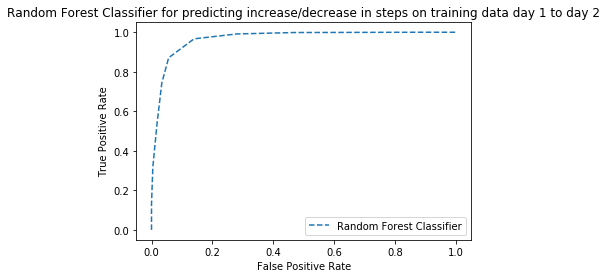

AUC score 0.9720618094994739


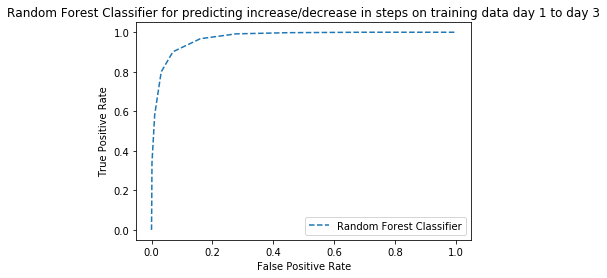

AUC score 0.9310848725742342


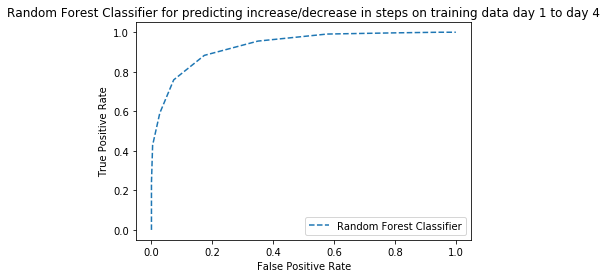

AUC score 0.9779119873046875


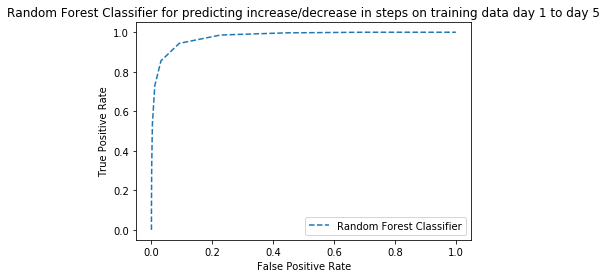

AUC score 0.977962101666528


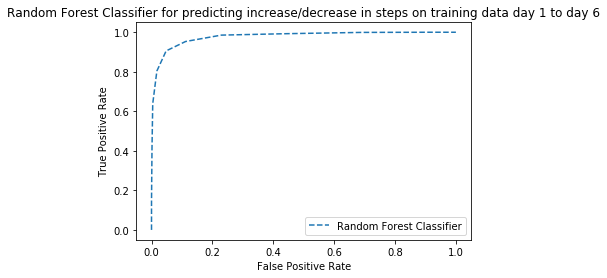

AUC score 0.9844317799634148


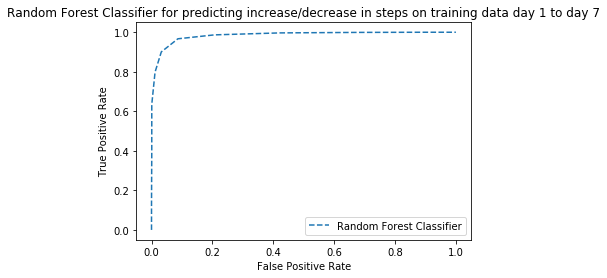

AUC score 0.9913436138038224


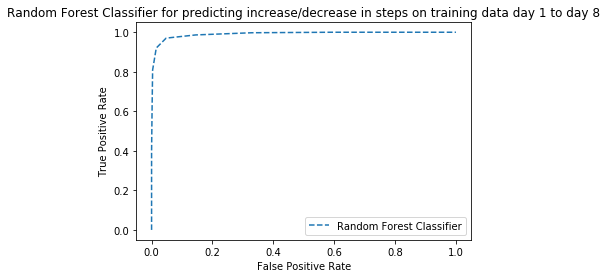

AUC score 0.9910827156458895


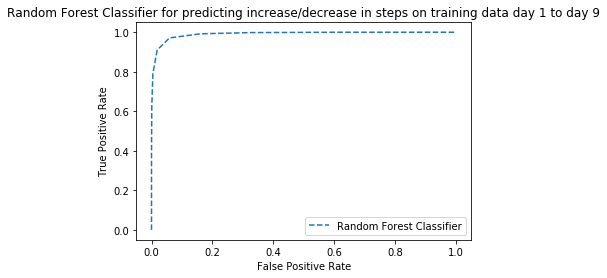

AUC score 0.9961197321069932


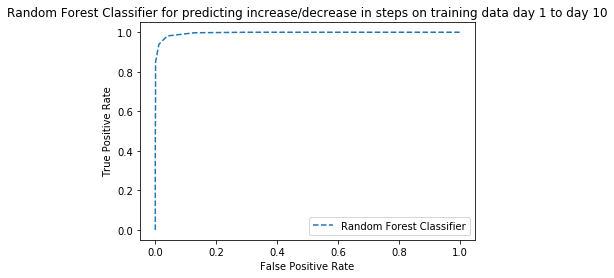

AUC score 0.9860353379338269


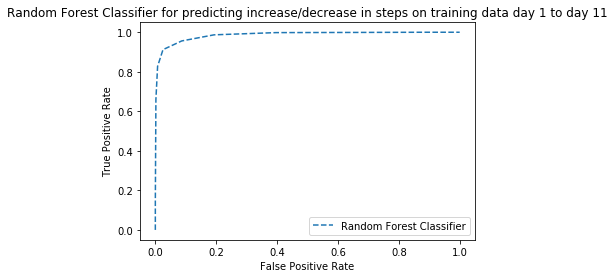

AUC score 0.9956601087539966


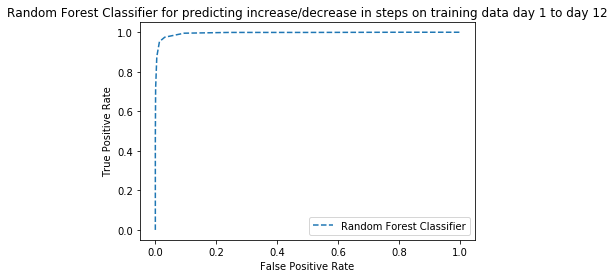

AUC score 0.9926864276386133


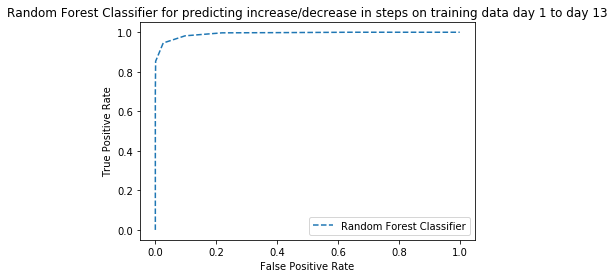

AUC score 0.9898479163621204


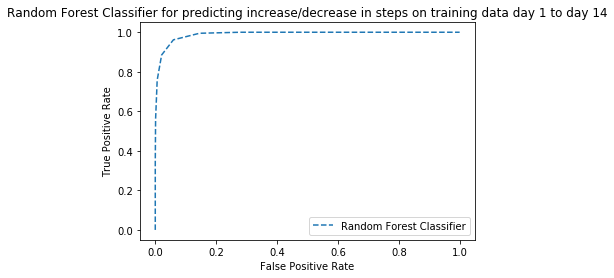

AUC score 0.9969228537197199


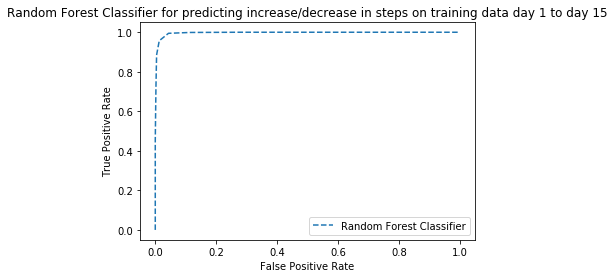

AUC score 0.9924551767676768


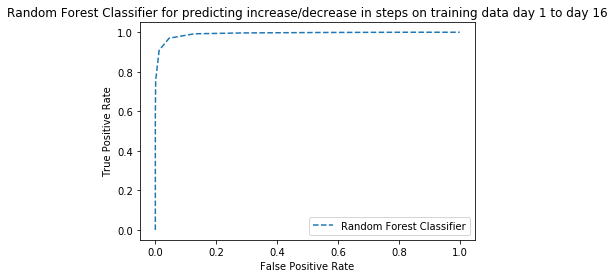

AUC score 0.9960023092927246


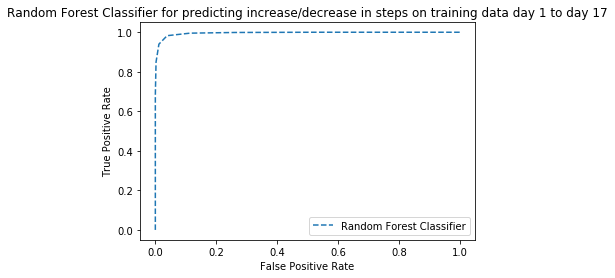

AUC score 0.9956891352380279


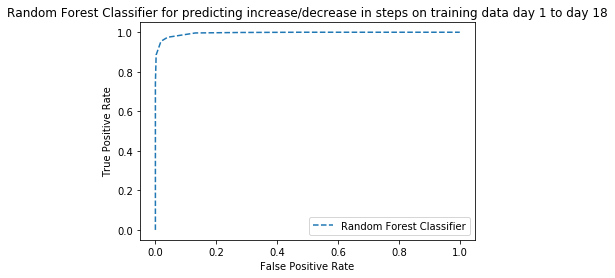

AUC score 0.9987900873470626


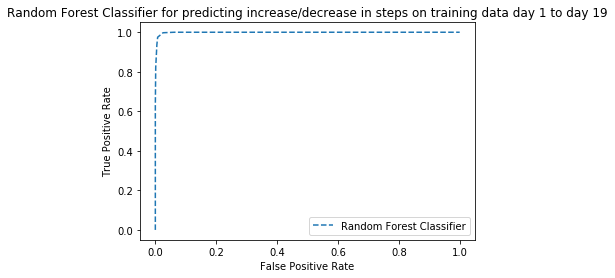

AUC score 0.993784126662816


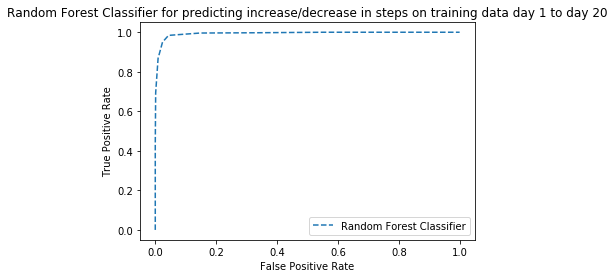

AUC score 0.9956774842748044


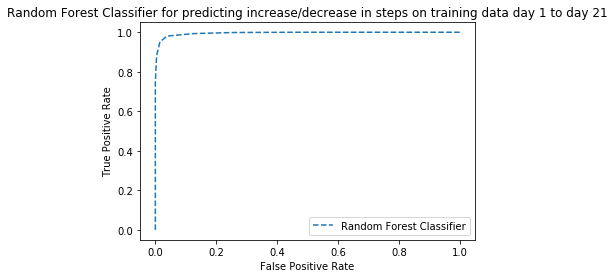

AUC score 0.9954525508331188


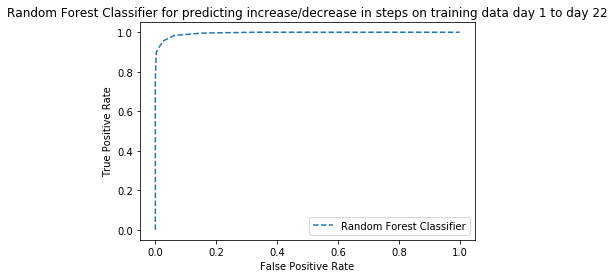

AUC score 0.9986678321678322


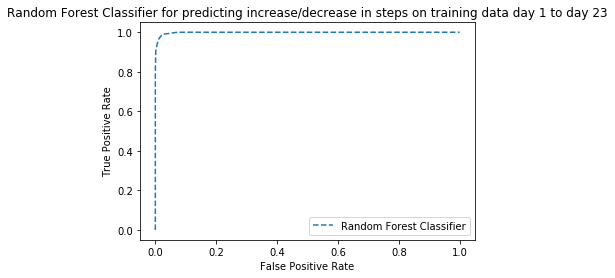

AUC score 0.9969122239225743


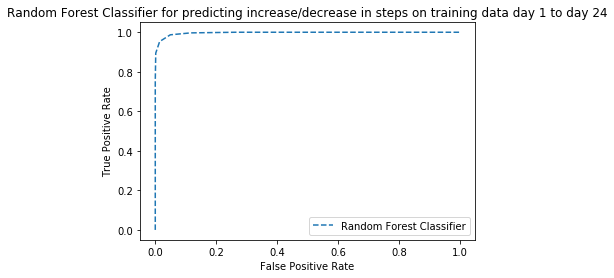

AUC score 0.9991020021598147


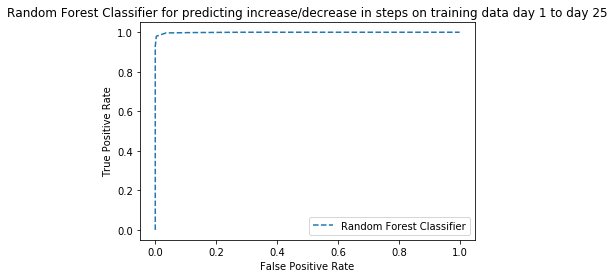

AUC score 0.9982517141966651


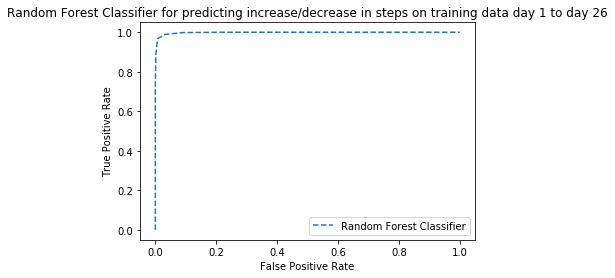

AUC score 0.9988879428042926


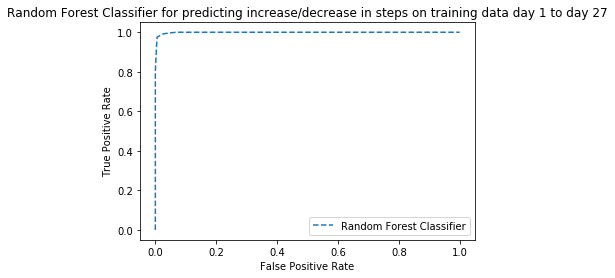

AUC score 0.9993392217872795


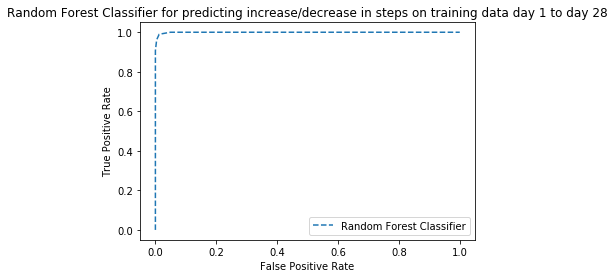

AUC score 0.9979397727711867


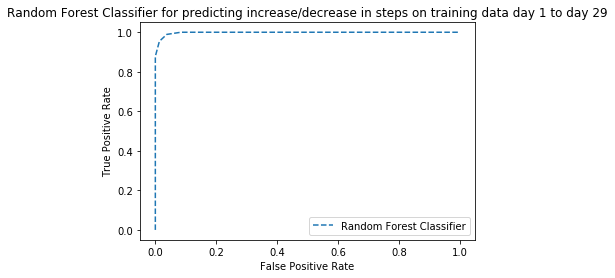

AUC score 0.9973904866825797


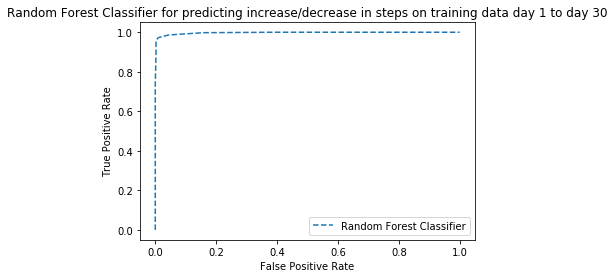

AUC score 0.9990840371784488


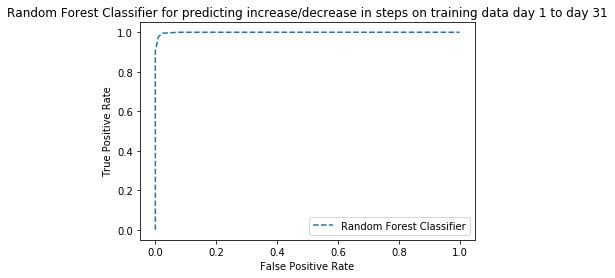

AUC score 0.9993392119822894


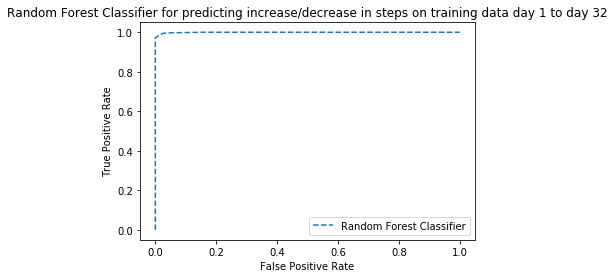

AUC score 0.990567533291059


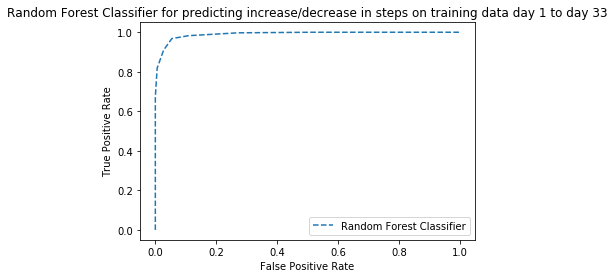

AUC score 0.9975534652212427


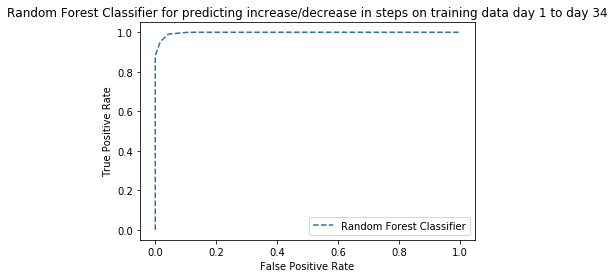

AUC score 0.9971790890269151


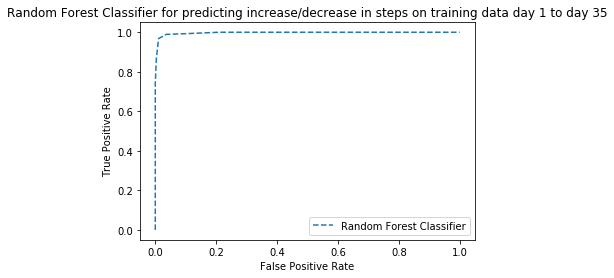

AUC score 0.998647651831817


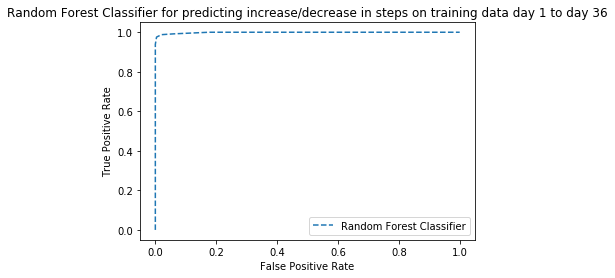

AUC score 0.9951050873260879


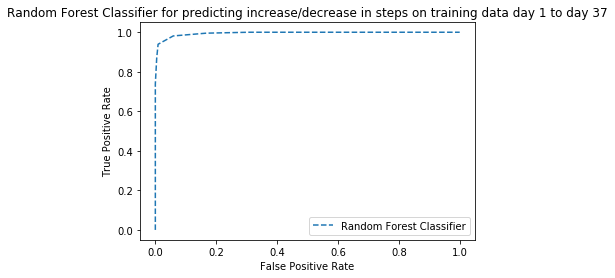

AUC score 0.9955720173777431


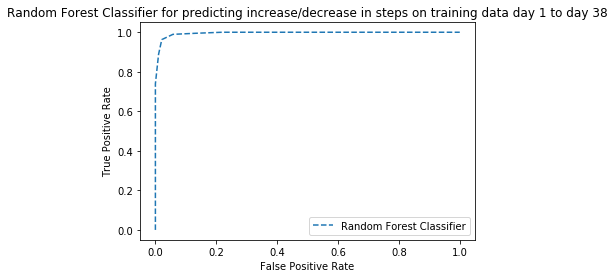

AUC score 0.9991819128365313


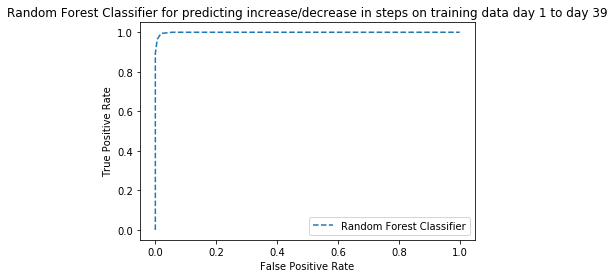

AUC score 0.9983288770053476


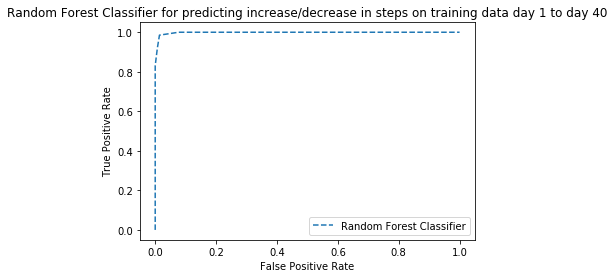

AUC score 0.9998833773907635


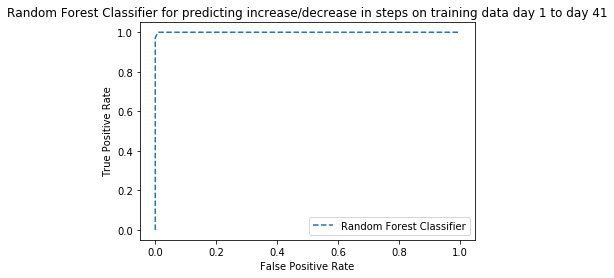

AUC score 0.9967956934119457


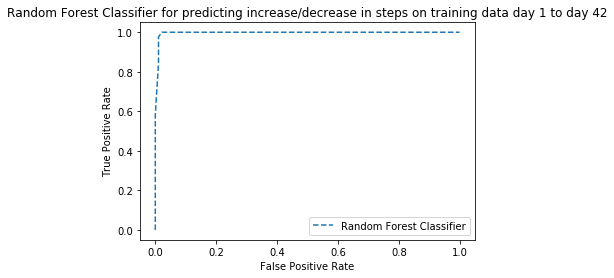

AUC score 0.999874213836478


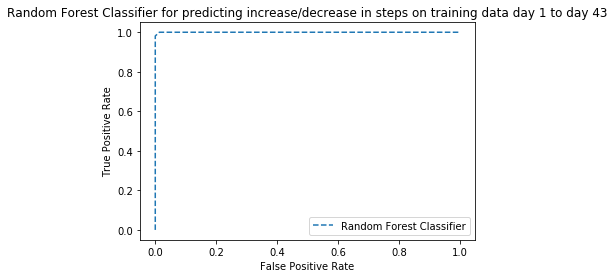

In [46]:
from sklearn.ensemble import RandomForestClassifier
data_dropnan_rf_try = data_dropnan2.drop(["ID_DIAMANTE"],axis=1)
data_dropnan_rf_try['increase_or_decrease_from_yesterday'] = np.where(data_dropnan_rf_try.today_steps 
                                                                   - data_dropnan_rf_try.yesterday_steps > 0, 1, 0)

# Number of trees needed for random forest is typically set as sqrt(p) (classification) 
m = math.floor(math.sqrt(features.shape[1]))

# Labels are the values we want to predict
labels = data_dropnan_rf_try["increase_or_decrease_from_yesterday"]

# Convert categorical data into dummy variables
features = pd.get_dummies(data_dropnan_rf_try)
features = features.drop("increase_or_decrease_from_yesterday", axis = 1)

# Split into Xtrain, Xtest, Ytrain, Ytest
for i in range(2,44):
    train_index, test_index = features[features.Study_Day < i].index, features[features.Study_Day >= i].index
    train_index, test_index = list(train_index), list(test_index)
    Xtrain, ytrain = np.array(features.loc[train_index]), np.array(labels.loc[train_index])
    Xtest, ytest = np.array(features.loc[test_index]), np.array(labels.loc[test_index])

    # Instantiate model with 1000 decision trees
    rf = RandomForestClassifier(n_estimators = m, random_state = 10)
    # Train the model on training data
    rf.fit(Xtrain, ytrain)
    
    # Use the forest's predict method on the test data
    predictions = rf.predict(Xtest)
    probs = rf.predict_proba(Xtest)
    
    # Print auc score
    print("AUC score",roc_auc_score(ytest, probs[:, 1]))
    
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(ytest, probs[:,1])
    
    # plot the roc curve for the model
    plt.plot(fpr, tpr, linestyle='--', label='Random Forest Classifier')
    plt.title('Random Forest Classifier for predicting increase/decrease in steps on training data day 1 to day ' + str(i))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()


******************************************************************************************

### PCA

#### First, scale the numerical variables and make the categorical variables into dummy variables
- We performed PCA next
- We first drop the variables "today_steps", "ID_DIAMANTE","difference_from_yesterday_steps","Study_Day"
- We remove "Study_Day" from the features list as it has high correlation

In [47]:
data_dropnan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2832 entries, 0 to 3769
Data columns (total 42 columns):
ID_DIAMANTE                        2832 non-null object
Study_Day                          2832 non-null int64
Week_Day                           2832 non-null object
WeekDay_dummy                      2832 non-null int64
age                                2832 non-null int64
gender                             2832 non-null object
eth                                2832 non-null object
edu                                2832 non-null object
employed                           2832 non-null object
basics_challenges_r                2832 non-null object
marital_status                     2832 non-null object
adults_household                   2832 non-null int64
child_household                    2832 non-null int64
born_us                            2832 non-null object
health_lit                         2832 non-null object
health_status                      2832 non-null object
pa

In [48]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
features = data_dropnan2.drop(["today_steps","ID_DIAMANTE","difference_from_yesterday_steps","Study_Day"], axis=1)

# Categorical features (drop out those continuous variables)
cat_features = features.drop(["age","phq_sumnew","GAD_sum","leids_sum","BADS_sum",
                               "neighborhood_sum","loneliness_sum","PA_sum","daily_goal","yesterday_steps",
                             "WeekDay_dummy","adults_household","child_household","arm"], axis=1)
# Continuous features
cont_features = features[["age","phq_sumnew","GAD_sum","leids_sum","BADS_sum",
                               "neighborhood_sum","loneliness_sum","PA_sum","daily_goal",
                                  "yesterday_steps","adults_household","child_household"]]

# Features that need no change
features_remain = features[["WeekDay_dummy","arm"]].reset_index()  # need to reset the index because we reseting at the bottom

# Standardizing the continuous features
features_stand = StandardScaler().fit_transform(cont_features)
features_stand = pd.DataFrame(features_stand, columns = ["age","phq_sumnew","GAD_sum","leids_sum","BADS_sum",
                               "neighborhood_sum","loneliness_sum","PA_sum","daily_goal","yesterday_steps"
                                                         ,"adults_household","child_household"])

# Get dummies on the categorical variables
cat_features_dummy = pd.get_dummies(cat_features).reset_index()
cat_features_dummy = cat_features_dummy.drop("index",axis=1)

# Combining back the categorical and numerical variables
X = pd.concat([cat_features_dummy, features_remain, features_stand], axis=1, sort=False)
# Drop the index column
pd.set_option("display.max_rows", 5, "display.max_columns", None) 
X = X.drop(["index"],axis=1) # remove the index column
print(X)

# Separating out the response
y = data_dropnan2.today_steps

      Week_Day_Fri  Week_Day_Mon  Week_Day_Sat  Week_Day_Sun  Week_Day_Thu  \
0                0             0             0             0             0   
1                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2830             0             0             0             0             0   
2831             0             0             0             0             1   

      Week_Day_Tue  Week_Day_Wed  gender_Female  gender_Male  \
0                1             0              1            0   
1                0             1              1            0   
...            ...           ...            ...          ...   
2830             0             1              1            0   
2831             0             0              1            0   

      eth_Asian or Pacific Islander  eth_Hispanic/Latino(a)  eth_Multi-ethnic  \
0                                 1                       0      

#### Next, try PCA

- There are many features which might not be ideal for visualization and fitting of the clustering model since some of them might be highly correlated.
- We employ the Principal Component Analysis (PCA) to transform the high-dimensional data into a lower-dimensional data while keeping the significance of those predictors with the PCA class from sklearn.

[0.13163016 0.08675837 0.06580523 0.05575923 0.0499447  0.04411473
 0.03847898 0.03535412 0.0323603  0.02750123 0.0259645  0.02462771
 0.02276439 0.02243167 0.02043783 0.01947046 0.01651712 0.01627073
 0.01398622 0.01308141 0.01281934 0.01067571 0.01056863 0.00977621
 0.00922528 0.00838218 0.00818685 0.00804618 0.0078712  0.00779452
 0.00753891 0.0073212  0.00720716 0.00681607 0.00673395 0.00666882
 0.00635744 0.00609333 0.00585199 0.00578817 0.00566171 0.00559603
 0.00548025 0.00527151 0.00505142]


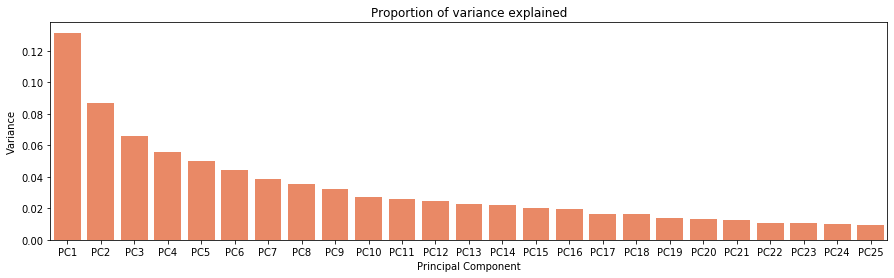

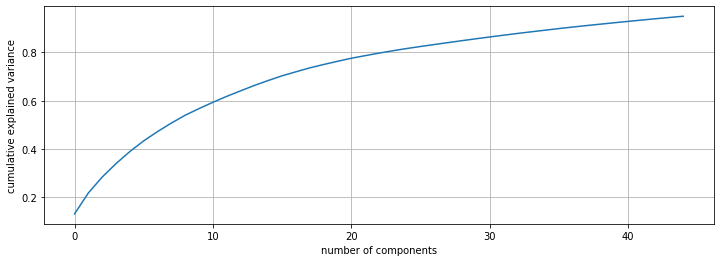

In [50]:
from sklearn.decomposition import PCA

# PCA === Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
pca = PCA(n_components=0.95)
pca.fit_transform(X)

# Variance explained by the principal componenets
explained_variance = pca.explained_variance_ratio_
print(explained_variance)  # seems like only 1 PC is needed to explain 95% of the total variance
                           # The index part seems to be giving some problem must find a way to remove it
# Loading vectors
pc1 = pca.components_[:1]
#pc2 = pca.components_[:2]
#pc3 = pca.components_[:3]

df = pd.DataFrame({'Variance':explained_variance[:25], 'Principal Component':['PC1','PC2','PC3','PC4','PC5','PC6'
                                                                              ,'PC7','PC8','PC9','PC10','PC11','PC12'
                                                                              ,'PC13','PC14','PC15','PC16','PC17','PC18'
                                                                              ,'PC19','PC20','PC21','PC22','PC23','PC24'
                                                                              ,'PC25']})
plt.figure(figsize = (15,4))
sns.barplot(x='Principal Component',y="Variance", data=df, color="coral")
plt.title("Proportion of variance explained")

# Loadings
# set the maximum number of rows and columns to display to unlimited
pd.set_option("display.max_rows", None, "display.max_columns", None) 
loadings = pd.DataFrame(pc1.T, columns=['PC1'], index=X.columns)  # need to transpose the PC vector
# print(loadings.sort_values(by="PC1",ascending=False))

###### Observations: #######
# For our dataset, I used the data_dropnan2 but I dropped 3 features "ID_DIAMANTE","difference_from_yesterday_steps"
# and "Study_Day". I removed "Study_Day" because I am not sure if standardizig make sense or not (???)
# Then we split the features into categorical features to be converted into dummy variables, continuous variables that
# has to be scaled and also variables that does not need any changes: (2 variables: "WeekDay_dummy","arm")

plt.figure(figsize = (12,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()


### Kmeans
- https://antonsruberts.github.io/kproto-audience/

In [51]:
from tqdm import tqdm
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
import plotly.graph_objects as go
from kneed import KneeLocator

# Separating out the response
y = data_dropnan2.today_steps
y = y.reset_index().drop(["index"],axis=1)  # we need to reset the index for y and then drop the index column
data = pd.concat([X,y],axis=1) # concatenate the X and y to get back full data set
pd.set_option("display.max_rows", 5, "display.max_columns", None)

# Elbow plot with inertia
#Elbow method to choose the optimal number of clusters
sse = {}
for k in tqdm(range(2, 40)):   # tqdm instantly make your loops show a smart progress meter
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    # print(kmeans.n_iter_) # The number of iterations required to converge
    
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
                             # returns the lowest SSE value
                             # SSE return the results of the one with the lowest SSE.
    
fig = go.Figure(data=go.Scatter(x=list(sse.keys()), y=list(sse.values())))
fig.show()

kl = KneeLocator(range(2, 40), list(sse.values()), curve="convex", direction="decreasing")
print("Elbow is obtained at " + str(kl.elbow))

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:32<00:00,  1.19it/s]


Elbow is obtained at 7


### KPrototypes (which combines both k-modes and k-means to cluster mixed numerical/categorical data)

In [52]:
from sklearn.preprocessing import PowerTransformer

# Separating out the features (removing variables that we do not want to include in the analysis)
features = data_dropnan2.drop(["ID_DIAMANTE","difference_from_yesterday_steps","Study_Day"], axis=1)

#Preprocessing numerical
numerical = features.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))

##preprocessing categorical
categorical = features.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(features.select_dtypes(include='object').columns) / features.shape[1]
print(categorical_weight)

C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kiat Kai\Documents\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

0.6153846153846154


In [69]:
# examine the mode for each column
for col in data_dropnan2.columns:
    print(data_dropnan2[col].value_counts())

DIAMANTE-647170    45
DIAMANTE-746571    45
                   ..
DIAMANTE-647417    15
DIAMANTE-7904      14
Name: ID_DIAMANTE, Length: 76, dtype: int64
13    75
12    73
      ..
44    46
45    31
Name: Study_Day, Length: 45, dtype: int64
Thu    432
Fri    420
      ... 
Sun    376
Mon    375
Name: Week_Day, Length: 7, dtype: int64
1    2048
0     784
Name: WeekDay_dummy, dtype: int64
18    841
21    679
     ... 
23     26
33     16
Name: age, Length: 10, dtype: int64
Female    1980
Male       852
Name: gender, dtype: int64
Asian or Pacific Islander    1751
White or Caucasian            650
Hispanic/Latino(a)            333
Refused                        54
Multi-ethnic                   44
Name: eth, dtype: int64
Some college or technical school        1436
High school graduate or "GED" degree    1111
College graduate                         204
Graduate degree                           61
Some high school                          20
Name: edu, dtype: int64
Other                   

In [123]:
from kmodes.kprototypes import KPrototypes

# Separating out the features (removing variables that we do not want to include in the analysis)
features = data_dropnan2.drop(["ID_DIAMANTE","difference_from_yesterday_steps","Study_Day"], axis=1)

kprot_data = features.copy()

# Elbow plot with cost (will take a LONG time)
costs = []
n_clusters = []
clusters_assigned = []

for i in tqdm(range(2, 30)):
    try:
        # The "Cao" approach selects prototypes for each data object based on the density of the data point and the dissimilarity value
        
        # The "Huang" approach will first select k distinct objects from the data set as initial k-modes, and
        # then assign the most frequent categories equally to the initial k-modes 
        # k-modes is used for clustering categorical variables. It defines clusters based on the number of matching
        # categories between data points
        
        # Step 1: Initialize the function by specifying the number of clusters
        kproto = KPrototypes(n_clusters= i, init='Huang', verbose=2)
    
        # Step 2: To build the clusters, fit.predict the data
        clusters = kproto.fit_predict(kprot_data, categorical=[0,1,3,4,5,6,7,8,11,12,13,14,15
                                                               ,16,17,18,19,20,28,29,30,31, 
                                                               32,33,34,38])
        
        # Step 3: Append the cost and number of clusters used to compute the cost to appropriate lists
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")

# Construct an elbow plot to find the optimal number for K
# Pick the point where the cost begins to decrease in a linear fashion
# For K-prototypes, cost is defined as the sum distance of all points to their respective cluster centroids
fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
fig.show()

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 478, ncost: 75958496389.19295
Run: 1, iteration: 2/100, moves: 220, ncost: 74802445736.30556
Run: 1, iteration: 3/100, moves: 107, ncost: 74539910252.09026
Run: 1, iteration: 4/100, moves: 43, ncost: 74494527091.24673
Run: 1, iteration: 5/100, moves: 18, ncost: 74483651614.70819
Run: 1, iteration: 6/100, moves: 8, ncost: 74481705274.1714
Run: 1, iteration: 7/100, moves: 1, ncost: 74481675959.81078
Run: 1, iteration: 8/100, moves: 0, ncost: 74481675959.81078
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 200, ncost: 74740167333.23367
Run: 2, iteration: 2/100, moves: 86, ncost: 74534763255.5257
Run: 2, iteration: 3/100, moves: 40, ncost: 74493896314.29933
Run: 2, iteration: 4/100, moves: 17, ncost: 74483651614.70818
Run: 2, iteration: 5/100, moves: 8, ncost: 74481705274.17143
Run: 2, iteration: 6/100, moves: 1, 

  4%|██▉                                                                                | 1/28 [00:31<14:09, 31.48s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 700, ncost: 66342107429.4512
Run: 1, iteration: 2/100, moves: 418, ncost: 63033702609.169334
Run: 1, iteration: 3/100, moves: 239, ncost: 61912765187.192696
Run: 1, iteration: 4/100, moves: 158, ncost: 61322258405.14761
Run: 1, iteration: 5/100, moves: 164, ncost: 60795061995.698456
Run: 1, iteration: 6/100, moves: 140, ncost: 60441989255.252106
Run: 1, iteration: 7/100, moves: 101, ncost: 60139870801.41143
Run: 1, iteration: 8/100, moves: 109, ncost: 59737372194.66005
Run: 1, iteration: 9/100, moves: 116, ncost: 59239263914.12571
Run: 1, iteration: 10/100, moves: 102, ncost: 58876679409.45257
Run: 1, iteration: 11/100, moves: 55, ncost: 58761205329.240585
Run: 1, iteration: 12/100, moves: 29, ncost: 58735210000.42062
Run: 1, iteration: 13/100, moves: 12, ncost: 58730561537.51009
Run: 1, iteration: 14/100, moves: 6, ncost: 58729732923.95015
Run: 1, iteration: 15/100, moves: 

Run: 9, iteration: 2/100, moves: 246, ncost: 61418598379.19762
Run: 9, iteration: 3/100, moves: 164, ncost: 60817684315.460304
Run: 9, iteration: 4/100, moves: 130, ncost: 60473760469.54259
Run: 9, iteration: 5/100, moves: 87, ncost: 60233256712.72
Run: 9, iteration: 6/100, moves: 97, ncost: 59906491814.35247
Run: 9, iteration: 7/100, moves: 108, ncost: 59445626216.58749
Run: 9, iteration: 8/100, moves: 111, ncost: 58971907447.64918
Run: 9, iteration: 9/100, moves: 80, ncost: 58772453167.308365
Run: 9, iteration: 10/100, moves: 37, ncost: 58735225186.27728
Run: 9, iteration: 11/100, moves: 13, ncost: 58730561537.51008
Run: 9, iteration: 12/100, moves: 6, ncost: 58729732923.95013
Run: 9, iteration: 13/100, moves: 0, ncost: 58729732923.95013
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 542, ncost: 63234799189.42061
Run: 10, iteration: 2/100, moves: 329, ncost: 60799459668.4481
Run: 10, iteration: 3/100, moves: 217, ncos

  7%|█████▉                                                                             | 2/28 [01:35<17:48, 41.11s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 730, ncost: 51335637764.79174
Run: 1, iteration: 2/100, moves: 432, ncost: 48984045920.056595
Run: 1, iteration: 3/100, moves: 261, ncost: 47962962175.2042
Run: 1, iteration: 4/100, moves: 173, ncost: 47489535657.5021
Run: 1, iteration: 5/100, moves: 123, ncost: 47261957982.39602
Run: 1, iteration: 6/100, moves: 90, ncost: 47139792639.20157
Run: 1, iteration: 7/100, moves: 54, ncost: 47098972615.5437
Run: 1, iteration: 8/100, moves: 32, ncost: 47084703031.442085
Run: 1, iteration: 9/100, moves: 29, ncost: 47072151659.25146
Run: 1, iteration: 10/100, moves: 20, ncost: 47064830232.31289
Run: 1, iteration: 11/100, moves: 20, ncost: 47055362582.56502
Run: 1, iteration: 12/100, moves: 12, ncost: 47052641239.2412
Run: 1, iteration: 13/100, moves: 7, ncost: 47051473460.17028
Run: 1, iteration: 14/100, moves: 4, ncost: 47051038830.75104
Run: 1, iteration: 15/100, moves: 1, ncost: 47

Run: 8, iteration: 13/100, moves: 25, ncost: 47111973015.53506
Run: 8, iteration: 14/100, moves: 21, ncost: 47104296355.4923
Run: 8, iteration: 15/100, moves: 23, ncost: 47087897572.54294
Run: 8, iteration: 16/100, moves: 27, ncost: 47075173952.443146
Run: 8, iteration: 17/100, moves: 18, ncost: 47066402362.640594
Run: 8, iteration: 18/100, moves: 13, ncost: 47062052070.42196
Run: 8, iteration: 19/100, moves: 5, ncost: 47061292299.885735
Run: 8, iteration: 20/100, moves: 2, ncost: 47061129832.04679
Run: 8, iteration: 21/100, moves: 0, ncost: 47061129832.04679
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 1124, ncost: 51860542287.38204
Run: 9, iteration: 2/100, moves: 386, ncost: 49263001756.92859
Run: 9, iteration: 3/100, moves: 240, ncost: 47993960276.37287
Run: 9, iteration: 4/100, moves: 149, ncost: 47566211899.10466
Run: 9, iteration: 5/100, moves: 94, ncost: 47406350664.43081
Run: 9, iteration: 6/100, moves: 74, nc

 11%|████████▉                                                                          | 3/28 [02:54<21:57, 52.68s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 392, ncost: 44865209413.77831
Run: 1, iteration: 2/100, moves: 235, ncost: 43794070077.68421
Run: 1, iteration: 3/100, moves: 203, ncost: 43053319737.594925
Run: 1, iteration: 4/100, moves: 235, ncost: 42127070389.10662
Run: 1, iteration: 5/100, moves: 170, ncost: 41620170332.58588
Run: 1, iteration: 6/100, moves: 157, ncost: 41322701452.02415
Run: 1, iteration: 7/100, moves: 93, ncost: 41222320394.14385
Run: 1, iteration: 8/100, moves: 55, ncost: 41168422171.426636
Run: 1, iteration: 9/100, moves: 49, ncost: 41131006529.15952
Run: 1, iteration: 10/100, moves: 50, ncost: 41097782742.90861
Run: 1, iteration: 11/100, moves: 23, ncost: 41090253434.384514
Run: 1, iteration: 12/100, moves: 15, ncost: 41086541234.80072
Run: 1, iteration: 13/100, moves: 4, ncost: 41086115547.61528
Run: 1, iteration: 14/100, moves: 3, ncost: 41084521125.86602
Run: 1, iteration: 15/100, moves: 11, nc

Run: 7, iteration: 18/100, moves: 7, ncost: 41371920830.6686
Run: 7, iteration: 19/100, moves: 7, ncost: 41368655433.855644
Run: 7, iteration: 20/100, moves: 13, ncost: 41360872716.80375
Run: 7, iteration: 21/100, moves: 16, ncost: 41353908268.361725
Run: 7, iteration: 22/100, moves: 19, ncost: 41344574668.8283
Run: 7, iteration: 23/100, moves: 18, ncost: 41330932566.215744
Run: 7, iteration: 24/100, moves: 38, ncost: 41278498915.16058
Run: 7, iteration: 25/100, moves: 38, ncost: 41243264015.50921
Run: 7, iteration: 26/100, moves: 33, ncost: 41212250296.447876
Run: 7, iteration: 27/100, moves: 31, ncost: 41196444897.13758
Run: 7, iteration: 28/100, moves: 14, ncost: 41190656848.45575
Run: 7, iteration: 29/100, moves: 17, ncost: 41180195854.662155
Run: 7, iteration: 30/100, moves: 22, ncost: 41172911370.04443
Run: 7, iteration: 31/100, moves: 8, ncost: 41170662499.59464
Run: 7, iteration: 32/100, moves: 15, ncost: 41168485145.75724
Run: 7, iteration: 33/100, moves: 4, ncost: 41168169708

 14%|███████████▊                                                                       | 4/28 [04:51<28:43, 71.80s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 886, ncost: 43993807952.71643
Run: 1, iteration: 2/100, moves: 512, ncost: 40789966749.12561
Run: 1, iteration: 3/100, moves: 352, ncost: 38213985091.14641
Run: 1, iteration: 4/100, moves: 227, ncost: 37188037422.15012
Run: 1, iteration: 5/100, moves: 149, ncost: 36802933236.87605
Run: 1, iteration: 6/100, moves: 100, ncost: 36617712645.22302
Run: 1, iteration: 7/100, moves: 95, ncost: 36494658554.6527
Run: 1, iteration: 8/100, moves: 78, ncost: 36376187724.05571
Run: 1, iteration: 9/100, moves: 64, ncost: 36311781243.85985
Run: 1, iteration: 10/100, moves: 48, ncost: 36272306240.26325
Run: 1, iteration: 11/100, moves: 53, ncost: 36220071715.86693
Run: 1, iteration: 12/100, moves: 44, ncost: 36190629294.255264
Run: 1, iteration: 13/100, moves: 43, ncost: 36163375773.71184
Run: 1, iteration: 14/100, moves: 11, ncost: 36159820697.15166
Run: 1, iteration: 15/100, moves: 5, ncos

Starting iterations...
Run: 6, iteration: 1/100, moves: 474, ncost: 39093945594.13188
Run: 6, iteration: 2/100, moves: 270, ncost: 37996528579.6405
Run: 6, iteration: 3/100, moves: 178, ncost: 37471083193.82721
Run: 6, iteration: 4/100, moves: 139, ncost: 37144387374.219055
Run: 6, iteration: 5/100, moves: 132, ncost: 36843284945.36668
Run: 6, iteration: 6/100, moves: 118, ncost: 36627371342.63845
Run: 6, iteration: 7/100, moves: 75, ncost: 36537376934.64506
Run: 6, iteration: 8/100, moves: 54, ncost: 36483014471.11582
Run: 6, iteration: 9/100, moves: 50, ncost: 36421305479.25029
Run: 6, iteration: 10/100, moves: 51, ncost: 36374361240.55986
Run: 6, iteration: 11/100, moves: 47, ncost: 36331873653.32843
Run: 6, iteration: 12/100, moves: 37, ncost: 36314407228.426636
Run: 6, iteration: 13/100, moves: 36, ncost: 36292301174.52846
Run: 6, iteration: 14/100, moves: 35, ncost: 36270062181.68011
Run: 6, iteration: 15/100, moves: 35, ncost: 36249374554.74424
Run: 6, iteration: 16/100, moves: 

 18%|██████████████▊                                                                    | 5/28 [07:03<34:27, 89.88s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 776, ncost: 39091723631.650475
Run: 1, iteration: 2/100, moves: 498, ncost: 35736185092.388664
Run: 1, iteration: 3/100, moves: 310, ncost: 34165873528.928143
Run: 1, iteration: 4/100, moves: 209, ncost: 33405255028.493675
Run: 1, iteration: 5/100, moves: 94, ncost: 33120616877.95627
Run: 1, iteration: 6/100, moves: 71, ncost: 33016143609.51524
Run: 1, iteration: 7/100, moves: 29, ncost: 32995414538.5181
Run: 1, iteration: 8/100, moves: 6, ncost: 32992444653.59239
Run: 1, iteration: 9/100, moves: 19, ncost: 32956536619.703976
Run: 1, iteration: 10/100, moves: 9, ncost: 32951378643.248825
Run: 1, iteration: 11/100, moves: 17, ncost: 32929111104.44677
Run: 1, iteration: 12/100, moves: 17, ncost: 32914792058.69388
Run: 1, iteration: 13/100, moves: 30, ncost: 32880189367.741077
Run: 1, iteration: 14/100, moves: 29, ncost: 32862397958.376404
Run: 1, iteration: 15/100, moves: 16, 

Run: 5, iteration: 20/100, moves: 14, ncost: 32801925042.258255
Run: 5, iteration: 21/100, moves: 8, ncost: 32800623596.229908
Run: 5, iteration: 22/100, moves: 13, ncost: 32798613510.036644
Run: 5, iteration: 23/100, moves: 14, ncost: 32795457508.154804
Run: 5, iteration: 24/100, moves: 14, ncost: 32791952527.982533
Run: 5, iteration: 25/100, moves: 12, ncost: 32789539651.89827
Run: 5, iteration: 26/100, moves: 8, ncost: 32788545672.656593
Run: 5, iteration: 27/100, moves: 2, ncost: 32788463518.219368
Run: 5, iteration: 28/100, moves: 3, ncost: 32788268228.55323
Run: 5, iteration: 29/100, moves: 0, ncost: 32788268228.55323
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 895, ncost: 40704540186.501366
Run: 6, iteration: 2/100, moves: 582, ncost: 37142445421.28603
Run: 6, iteration: 3/100, moves: 365, ncost: 35472694994.64531
Run: 6, iteration: 4/100, moves: 299, ncost: 34505323215.60844
Run: 6, iteration: 5/100, moves: 24

Run: 10, iteration: 19/100, moves: 5, ncost: 32811172851.875813
Run: 10, iteration: 20/100, moves: 1, ncost: 32810950687.256073
Run: 10, iteration: 21/100, moves: 0, ncost: 32810950687.256073
Best run was number 7


 21%|█████████████████▌                                                                | 6/28 [09:40<40:23, 110.17s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 640, ncost: 36076045801.49633
Run: 1, iteration: 2/100, moves: 355, ncost: 34788057287.11101
Run: 1, iteration: 3/100, moves: 236, ncost: 33710724684.95155
Run: 1, iteration: 4/100, moves: 282, ncost: 32179885559.252884
Run: 1, iteration: 5/100, moves: 230, ncost: 31382976061.571934
Run: 1, iteration: 6/100, moves: 160, ncost: 31039581596.652847
Run: 1, iteration: 7/100, moves: 129, ncost: 30785264132.819714
Run: 1, iteration: 8/100, moves: 84, ncost: 30587879625.621094
Run: 1, iteration: 9/100, moves: 83, ncost: 30361676841.0462
Run: 1, iteration: 10/100, moves: 104, ncost: 30182210382.61349
Run: 1, iteration: 11/100, moves: 92, ncost: 30033444696.7546
Run: 1, iteration: 12/100, moves: 83, ncost: 29947477075.59976
Run: 1, iteration: 13/100, moves: 64, ncost: 29899813849.97785
Run: 1, iteration: 14/100, moves: 32, ncos

Run: 6, iteration: 11/100, moves: 51, ncost: 30327499659.264442
Run: 6, iteration: 12/100, moves: 41, ncost: 30308497516.144947
Run: 6, iteration: 13/100, moves: 22, ncost: 30302088783.783127
Run: 6, iteration: 14/100, moves: 19, ncost: 30295357852.41307
Run: 6, iteration: 15/100, moves: 17, ncost: 30289094210.34492
Run: 6, iteration: 16/100, moves: 22, ncost: 30275452050.379276
Run: 6, iteration: 17/100, moves: 36, ncost: 30249629204.166893
Run: 6, iteration: 18/100, moves: 42, ncost: 30210216782.40623
Run: 6, iteration: 19/100, moves: 46, ncost: 30163924060.451183
Run: 6, iteration: 20/100, moves: 16, ncost: 30160312929.174507
Run: 6, iteration: 21/100, moves: 15, ncost: 30155646198.269
Run: 6, iteration: 22/100, moves: 12, ncost: 30152481090.126423
Run: 6, iteration: 23/100, moves: 12, ncost: 30150616328.96613
Run: 6, iteration: 24/100, moves: 4, ncost: 30150299399.806484
Run: 6, iteration: 25/100, moves: 3, ncost: 30150006167.06152
Run: 6, iteration: 26/100, moves: 3, ncost: 301498

 25%|████████████████████▌                                                             | 7/28 [12:04<42:07, 120.37s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 843, ncost: 32507407750.540695
Run: 1, iteration: 2/100, moves: 454, ncost: 29507024036.808758
Run: 1, iteration: 3/100, moves: 321, ncost: 28483895611.80472
Run: 1, iteration: 4/100, moves: 189, ncost: 28123536616.72019
Run: 1, iteration: 5/100, moves: 133, ncost: 27990510545.851
Run: 1, iteration: 6/100, moves: 71, ncost: 27894420092.515976
Run: 1, iteration: 7/100, moves: 59, ncost: 27766747957.076054
Run: 1, iteration: 8/100, moves: 57, ncost: 27711063388.73258
Run: 1, iteration: 9/100, moves: 48, ncost: 27676586651.84623
Run: 1, iteration: 10/100, moves: 30, ncost: 27653475748.53813
Run: 1, iteration: 11/100, moves: 12, ncost: 27646658978.70723
Run: 1, iteration: 12/100, moves: 10, ncost: 27644898791.686954
Run: 1, iteration: 13/100, moves: 10, ncost: 27643136336.22745
Run: 1, iteration: 14/100, moves: 5, ncost: 27642431741.101044
Run: 1, iteration: 15/100, moves: 12, n

Run: 5, iteration: 14/100, moves: 84, ncost: 28466639668.117725
Run: 5, iteration: 15/100, moves: 88, ncost: 28389467714.401577
Run: 5, iteration: 16/100, moves: 69, ncost: 28344592714.269157
Run: 5, iteration: 17/100, moves: 48, ncost: 28319060153.535057
Run: 5, iteration: 18/100, moves: 47, ncost: 28298194548.768932
Run: 5, iteration: 19/100, moves: 49, ncost: 28268360735.283226
Run: 5, iteration: 20/100, moves: 64, ncost: 28227546678.86472
Run: 5, iteration: 21/100, moves: 41, ncost: 28204240584.650787
Run: 5, iteration: 22/100, moves: 56, ncost: 28169462392.75215
Run: 5, iteration: 23/100, moves: 36, ncost: 28150347799.529118
Run: 5, iteration: 24/100, moves: 26, ncost: 28142712378.689705
Run: 5, iteration: 25/100, moves: 17, ncost: 28137555371.39608
Run: 5, iteration: 26/100, moves: 17, ncost: 28133097843.93395
Run: 5, iteration: 27/100, moves: 9, ncost: 28132142090.794357
Run: 5, iteration: 28/100, moves: 5, ncost: 28131659291.881027
Run: 5, iteration: 29/100, moves: 3, ncost: 28

 29%|███████████████████████▍                                                          | 8/28 [14:53<44:58, 134.91s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 851, ncost: 31103613426.019016
Run: 1, iteration: 2/100, moves: 372, ncost: 28742175157.068577
Run: 1, iteration: 3/100, moves: 241, ncost: 27174978522.188057
Run: 1, iteration: 4/100, moves: 158, ncost: 26675140710.744408
Run: 1, iteration: 5/100, moves: 127, ncost: 26472128582.34464
Run: 1, iteration: 6/100, moves: 119, ncost: 26337364309.560814
Run: 1, iteration: 7/100, moves: 108, ncost: 26241848319.49031
Run: 1, iteration: 8/100, moves: 99, ncost: 26134914334.087273
Run: 1, iteration: 9/100, moves: 89, ncost: 25979803713.65247
Run: 1, iteration: 10/100, moves: 72, ncost: 25888131657.8178
Run: 1, iteration: 11/100, moves: 61, ncost: 25849732390.019073
Run: 1, iteration: 12/100, moves: 36, ncost: 25812756992.504845
Run: 1, iteration: 13/100, moves: 42, ncost: 25757230844.204445
Run: 1, iteration: 14/100, moves: 52, ncost: 25705011172.168167
Run: 1, iteration: 15/100, move

Run: 5, iteration: 15/100, moves: 44, ncost: 26858023383.031147
Run: 5, iteration: 16/100, moves: 30, ncost: 26846277240.923687
Run: 5, iteration: 17/100, moves: 26, ncost: 26838063016.854477
Run: 5, iteration: 18/100, moves: 32, ncost: 26816980592.16486
Run: 5, iteration: 19/100, moves: 44, ncost: 26787687407.18631
Run: 5, iteration: 20/100, moves: 16, ncost: 26783355508.707527
Run: 5, iteration: 21/100, moves: 25, ncost: 26756755388.549854
Run: 5, iteration: 22/100, moves: 38, ncost: 26718698021.065384
Run: 5, iteration: 23/100, moves: 71, ncost: 26622389041.773163
Run: 5, iteration: 24/100, moves: 104, ncost: 26451499063.82421
Run: 5, iteration: 25/100, moves: 106, ncost: 26314469288.41568
Run: 5, iteration: 26/100, moves: 57, ncost: 26241097162.889248
Run: 5, iteration: 27/100, moves: 32, ncost: 26214085797.216656
Run: 5, iteration: 28/100, moves: 17, ncost: 26208356080.13322
Run: 5, iteration: 29/100, moves: 8, ncost: 26205964342.25821
Run: 5, iteration: 30/100, moves: 13, ncost: 

Run: 10, iteration: 7/100, moves: 63, ncost: 26638430122.131813
Run: 10, iteration: 8/100, moves: 72, ncost: 26558244859.294025
Run: 10, iteration: 9/100, moves: 87, ncost: 26486278362.991417
Run: 10, iteration: 10/100, moves: 83, ncost: 26419548185.02222
Run: 10, iteration: 11/100, moves: 64, ncost: 26387207272.292908
Run: 10, iteration: 12/100, moves: 35, ncost: 26366158500.540623
Run: 10, iteration: 13/100, moves: 45, ncost: 26321725496.87086
Run: 10, iteration: 14/100, moves: 43, ncost: 26301761399.90242
Run: 10, iteration: 15/100, moves: 17, ncost: 26295078422.91719
Run: 10, iteration: 16/100, moves: 10, ncost: 26292912608.57197
Run: 10, iteration: 17/100, moves: 5, ncost: 26290320559.535374
Run: 10, iteration: 18/100, moves: 11, ncost: 26284167816.41226
Run: 10, iteration: 19/100, moves: 10, ncost: 26282030750.193985
Run: 10, iteration: 20/100, moves: 8, ncost: 26280515528.372997
Run: 10, iteration: 21/100, moves: 13, ncost: 26277460955.098164
Run: 10, iteration: 22/100, moves: 1

 32%|██████████████████████████▎                                                       | 9/28 [18:16<49:11, 155.33s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 853, ncost: 27416815652.329697
Run: 1, iteration: 2/100, moves: 405, ncost: 26051615822.842255
Run: 1, iteration: 3/100, moves: 228, ncost: 25646102742.991432
Run: 1, iteration: 4/100, moves: 170, ncost: 25331393589.537846
Run: 1, iteration: 5/100, moves: 151, ncost: 25183873382.45195
Run: 1, iteration: 6/100, moves: 133, ncost: 25039565921.93301
Run: 1, iteration: 7/100, moves: 125, ncost: 24916048553.77259
Run: 1, iteration: 8/100, moves: 102, ncost: 24833704105.117546
Run: 1, iteration: 9/100, moves: 75, ncost: 24777146743.97574
Run: 1, iteration: 10/100, moves: 53, ncost: 24736434295.39058
Run: 1, iteration: 11/100, moves: 41, ncost: 24718558301.911533
Run: 1, iteration: 12/100, moves: 34, ncost: 24708517408.45652
Run: 1, iteration: 13/100, moves: 18, ncost: 24704977917.67213
Run: 1, iteration: 14/100, moves: 16, ncost: 24701381208.259304
Run: 1, iteration: 15/100, moves

Run: 6, iteration: 16/100, moves: 29, ncost: 24626090157.453785
Run: 6, iteration: 17/100, moves: 31, ncost: 24617034005.53613
Run: 6, iteration: 18/100, moves: 41, ncost: 24605492221.522568
Run: 6, iteration: 19/100, moves: 28, ncost: 24598831539.795395
Run: 6, iteration: 20/100, moves: 27, ncost: 24589144057.22619
Run: 6, iteration: 21/100, moves: 19, ncost: 24584710224.221725
Run: 6, iteration: 22/100, moves: 21, ncost: 24579626147.625267
Run: 6, iteration: 23/100, moves: 19, ncost: 24574659645.866737
Run: 6, iteration: 24/100, moves: 15, ncost: 24571062172.914387
Run: 6, iteration: 25/100, moves: 15, ncost: 24559519629.17555
Run: 6, iteration: 26/100, moves: 44, ncost: 24528838864.347397
Run: 6, iteration: 27/100, moves: 57, ncost: 24474527021.436157
Run: 6, iteration: 28/100, moves: 57, ncost: 24398670172.807823
Run: 6, iteration: 29/100, moves: 59, ncost: 24318665245.69365
Run: 6, iteration: 30/100, moves: 62, ncost: 24268051241.73772
Run: 6, iteration: 31/100, moves: 53, ncost: 

Run: 10, iteration: 22/100, moves: 13, ncost: 24061792728.670017
Run: 10, iteration: 23/100, moves: 8, ncost: 24060635675.26941
Run: 10, iteration: 24/100, moves: 7, ncost: 24054447266.835606
Run: 10, iteration: 25/100, moves: 8, ncost: 24052358038.53437
Run: 10, iteration: 26/100, moves: 2, ncost: 24052184433.920258
Run: 10, iteration: 27/100, moves: 0, ncost: 24052184433.920258
Best run was number 10


 36%|████████████████████████████▉                                                    | 10/28 [21:34<50:27, 168.17s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 739, ncost: 26043811657.062756
Run: 1, iteration: 2/100, moves: 333, ncost: 25263720017.844196
Run: 1, iteration: 3/100, moves: 221, ncost: 24893284699.028534
Run: 1, iteration: 4/100, moves: 183, ncost: 24578661263.466812
Run: 1, iteration: 5/100, moves: 148, ncost: 24358801800.454212
Run: 1, iteration: 6/100, moves: 106, ncost: 24251927476.06233
Run: 1, iteration: 7/100, moves: 80, ncost: 24194499804.94804
Run: 1, iteration: 8/100, moves: 51, ncost: 24172344162.576008
Run: 1, iteration: 9/100, moves: 43, ncost: 24148897561.984783
Run: 1, iteration: 10/100, moves: 40, ncost: 24094800842.144455
Run: 1, iteration: 11/100, moves: 74, ncost: 23862038792.002472
Run: 1, iteration: 12/100, moves: 66, ncost: 23686970058.382053
Run: 1, iteration: 13/100, moves: 86, ncost: 23493888473.974358
Run: 1, iteration: 14/100, moves: 73

Run: 6, iteration: 7/100, moves: 129, ncost: 23395581712.756855
Run: 6, iteration: 8/100, moves: 151, ncost: 23164705530.30335
Run: 6, iteration: 9/100, moves: 101, ncost: 23083628457.89929
Run: 6, iteration: 10/100, moves: 87, ncost: 23019415093.621613
Run: 6, iteration: 11/100, moves: 68, ncost: 22975223827.914722
Run: 6, iteration: 12/100, moves: 57, ncost: 22940225652.32469
Run: 6, iteration: 13/100, moves: 34, ncost: 22923271963.696804
Run: 6, iteration: 14/100, moves: 27, ncost: 22917232400.6665
Run: 6, iteration: 15/100, moves: 20, ncost: 22909323155.3864
Run: 6, iteration: 16/100, moves: 13, ncost: 22902808278.60004
Run: 6, iteration: 17/100, moves: 17, ncost: 22879708930.63389
Run: 6, iteration: 18/100, moves: 7, ncost: 22868697183.06221
Run: 6, iteration: 19/100, moves: 9, ncost: 22857166991.846287
Run: 6, iteration: 20/100, moves: 2, ncost: 22855998660.191902
Run: 6, iteration: 21/100, moves: 4, ncost: 22855059098.355366
Run: 6, iteration: 22/100, moves: 5, ncost: 2285189772

 39%|███████████████████████████████▊                                                 | 11/28 [24:52<50:08, 176.95s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 873, ncost: 25359720092.335876
Run: 1, iteration: 2/100, moves: 551, ncost: 23521457548.593307
Run: 1, iteration: 3/100, moves: 207, ncost: 23104084539.761616
Run: 1, iteration: 4/100, moves: 121, ncost: 22762116363.616367
Run: 1, iteration: 5/100, moves: 93, ncost: 22342413014.66584
Run: 1, iteration: 6/100, moves: 75, ncost: 22125903874.012665
Run: 1, iteration: 7/100, moves: 80, ncost: 22005249448.96635
Run: 1, iteration: 8/100, moves: 60, ncost: 21918663682.202465
Run: 1, iteration: 9/100, moves: 43, ncost: 21882203934.316303
Run: 1, iteration: 10/100, moves: 50, ncost: 21850754685.92057
Run: 1, iteration: 11/100, moves: 35, ncost: 21832592110.118484
Run: 1, iteration: 12/100, moves: 21, ncost: 21820555684.790028
Run: 1, iteration: 13/100, moves: 18, ncost: 21811848949.151344
Run: 1, iteration: 14/100, moves: 3, ncost: 21811282275.228283
Run: 1, iteration: 15/100, moves:

Run: 5, iteration: 11/100, moves: 29, ncost: 22352215657.38005
Run: 5, iteration: 12/100, moves: 30, ncost: 22338249663.12663
Run: 5, iteration: 13/100, moves: 22, ncost: 22327095526.319534
Run: 5, iteration: 14/100, moves: 13, ncost: 22319212094.101147
Run: 5, iteration: 15/100, moves: 17, ncost: 22312000654.82268
Run: 5, iteration: 16/100, moves: 13, ncost: 22270703414.26601
Run: 5, iteration: 17/100, moves: 27, ncost: 22157291640.653847
Run: 5, iteration: 18/100, moves: 39, ncost: 22086660477.948036
Run: 5, iteration: 19/100, moves: 33, ncost: 22041116309.885185
Run: 5, iteration: 20/100, moves: 31, ncost: 22022856761.43746
Run: 5, iteration: 21/100, moves: 32, ncost: 22013982588.833008
Run: 5, iteration: 22/100, moves: 28, ncost: 21998309738.591503
Run: 5, iteration: 23/100, moves: 39, ncost: 21985306973.079567
Run: 5, iteration: 24/100, moves: 31, ncost: 21979086768.483147
Run: 5, iteration: 25/100, moves: 9, ncost: 21977664315.99899
Run: 5, iteration: 26/100, moves: 10, ncost: 21

Run: 8, iteration: 26/100, moves: 18, ncost: 21757322196.234962
Run: 8, iteration: 27/100, moves: 4, ncost: 21756544797.547146
Run: 8, iteration: 28/100, moves: 5, ncost: 21755440929.828613
Run: 8, iteration: 29/100, moves: 8, ncost: 21754193548.4531
Run: 8, iteration: 30/100, moves: 0, ncost: 21754193548.4531
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 917, ncost: 25197968108.397633
Run: 9, iteration: 2/100, moves: 481, ncost: 23452144056.074093
Run: 9, iteration: 3/100, moves: 318, ncost: 22711379054.633335
Run: 9, iteration: 4/100, moves: 203, ncost: 22362782857.017166
Run: 9, iteration: 5/100, moves: 147, ncost: 22184833694.97474
Run: 9, iteration: 6/100, moves: 142, ncost: 21991147419.359383
Run: 9, iteration: 7/100, moves: 109, ncost: 21886191645.872536
Run: 9, iteration: 8/100, moves: 70, ncost: 21814304372.053757
Run: 9, iteration: 9/100, moves: 57, ncost: 21760272888.03623
Run: 9, iteration: 10/100, moves: 33

 43%|██████████████████████████████████▋                                              | 12/28 [29:01<52:59, 198.70s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 649, ncost: 23659713753.333736
Run: 1, iteration: 2/100, moves: 300, ncost: 23087204616.51897
Run: 1, iteration: 3/100, moves: 229, ncost: 22701656693.48638
Run: 1, iteration: 4/100, moves: 183, ncost: 22404768681.911823
Run: 1, iteration: 5/100, moves: 176, ncost: 22047798043.059093
Run: 1, iteration: 6/100, moves: 176, ncost: 21760067034.181973
Run: 1, iteration: 7/100, moves: 141, ncost: 21583510540.97427
Run: 1, iteration: 8/100, moves: 92, ncost: 21528886280.824806
Run: 1, iteration: 9/100, moves: 58, ncost: 21506639874.86326
Run: 1, iteration: 10/100, moves: 54, ncost: 21481405003.362286
Run: 1, iteration: 11/100, moves: 77, ncost: 21440098552.682213
Run: 1, iteration: 12/100, moves: 57, ncost: 21389590982.440876
Run: 1, iteration: 13/100, moves: 63, ncost: 21343601029.57035
Run: 1, iteration: 14/100, moves: 49, ncost: 21323239172.919056
Run: 1, iteration: 15/100, move

Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 642, ncost: 22462000291.966393
Run: 4, iteration: 2/100, moves: 342, ncost: 21460030530.1205
Run: 4, iteration: 3/100, moves: 192, ncost: 20970320653.075134
Run: 4, iteration: 4/100, moves: 154, ncost: 20829882236.127872
Run: 4, iteration: 5/100, moves: 83, ncost: 20771253029.15395
Run: 4, iteration: 6/100, moves: 62, ncost: 20741329032.06984
Run: 4, iteration: 7/100, moves: 54, ncost: 20714761755.933403
Run: 4, iteration: 8/100, moves: 51, ncost: 20690778233.35095
Run: 4, iteration: 9/100, moves: 41, ncost: 20670730172.765156
Run: 4, iteration: 10/100, moves: 32, ncost: 20653377566.632393
Run: 4, iteration: 11/100, moves: 42, ncost: 20625225954.698185
Run: 4, iteration: 12/100, moves: 49, ncost: 20604153616.336643
Run: 4, iteration: 13/100, moves: 33, ncost: 20589962535.17983
Run: 4, iteration: 14/100, moves: 33, ncost: 20575339967.481876
Run: 4, iteration: 15/100, moves: 18, ncost: 20565240278.780693


Run: 8, iteration: 7/100, moves: 113, ncost: 21982049865.699802
Run: 8, iteration: 8/100, moves: 100, ncost: 21844648061.410374
Run: 8, iteration: 9/100, moves: 79, ncost: 21742819244.00545
Run: 8, iteration: 10/100, moves: 74, ncost: 21609353733.89551
Run: 8, iteration: 11/100, moves: 85, ncost: 21490862316.699398
Run: 8, iteration: 12/100, moves: 77, ncost: 21334458274.979103
Run: 8, iteration: 13/100, moves: 72, ncost: 21252911947.495407
Run: 8, iteration: 14/100, moves: 78, ncost: 21149339074.68639
Run: 8, iteration: 15/100, moves: 58, ncost: 21108642953.89457
Run: 8, iteration: 16/100, moves: 61, ncost: 21061362358.188305
Run: 8, iteration: 17/100, moves: 64, ncost: 21008255571.987507
Run: 8, iteration: 18/100, moves: 46, ncost: 20974185796.120495
Run: 8, iteration: 19/100, moves: 44, ncost: 20950354392.02579
Run: 8, iteration: 20/100, moves: 18, ncost: 20932666217.56372
Run: 8, iteration: 21/100, moves: 24, ncost: 20910126444.530148
Run: 8, iteration: 22/100, moves: 14, ncost: 20

 46%|█████████████████████████████████████▌                                           | 13/28 [33:51<56:31, 226.13s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 782, ncost: 22323339966.085785
Run: 1, iteration: 2/100, moves: 400, ncost: 21008167890.97412
Run: 1, iteration: 3/100, moves: 240, ncost: 20661187078.062218
Run: 1, iteration: 4/100, moves: 126, ncost: 20450243896.64871
Run: 1, iteration: 5/100, moves: 92, ncost: 20318369247.848873
Run: 1, iteration: 6/100, moves: 61, ncost: 20221990098.22434
Run: 1, iteration: 7/100, moves: 65, ncost: 20154298555.993755
Run: 1, iteration: 8/100, moves: 57, ncost: 20120401481.240467
Run: 1, iteration: 9/100, moves: 50, ncost: 20082099741.52789
Run: 1, iteration: 10/100, moves: 58, ncost: 20018176782.37908
Run: 1, iteration: 11/100, moves: 55, ncost: 19949296352.470562
Run: 1, iteration: 12/100, moves: 50, ncost: 19890786649.267487
Run: 1, iteration: 13/100, moves: 47, ncost: 19862042411.069324
Run: 1, iteration: 14/100, moves: 31, ncost: 19848614473.36182
Run: 1, iteration: 15/100, moves: 1

Run: 6, iteration: 3/100, moves: 180, ncost: 20557334158.225082
Run: 6, iteration: 4/100, moves: 135, ncost: 20405381802.79193
Run: 6, iteration: 5/100, moves: 100, ncost: 20251233790.318077
Run: 6, iteration: 6/100, moves: 75, ncost: 20181343297.192806
Run: 6, iteration: 7/100, moves: 64, ncost: 20145400291.88127
Run: 6, iteration: 8/100, moves: 30, ncost: 20133067154.167778
Run: 6, iteration: 9/100, moves: 25, ncost: 20124190129.04912
Run: 6, iteration: 10/100, moves: 21, ncost: 20118351106.89646
Run: 6, iteration: 11/100, moves: 17, ncost: 20113018092.727703
Run: 6, iteration: 12/100, moves: 32, ncost: 20100355614.21213
Run: 6, iteration: 13/100, moves: 33, ncost: 20086794502.18929
Run: 6, iteration: 14/100, moves: 31, ncost: 20075384354.731976
Run: 6, iteration: 15/100, moves: 36, ncost: 20061082331.113953
Run: 6, iteration: 16/100, moves: 65, ncost: 20025134600.841663
Run: 6, iteration: 17/100, moves: 69, ncost: 19982250814.940918
Run: 6, iteration: 18/100, moves: 78, ncost: 19940

Run: 10, iteration: 11/100, moves: 29, ncost: 19960707534.275475
Run: 10, iteration: 12/100, moves: 24, ncost: 19934398152.054127
Run: 10, iteration: 13/100, moves: 24, ncost: 19924007543.727325
Run: 10, iteration: 14/100, moves: 18, ncost: 19917913622.443348
Run: 10, iteration: 15/100, moves: 21, ncost: 19909356101.37099
Run: 10, iteration: 16/100, moves: 19, ncost: 19902553655.96487
Run: 10, iteration: 17/100, moves: 10, ncost: 19895918516.106087
Run: 10, iteration: 18/100, moves: 5, ncost: 19895537197.58786
Run: 10, iteration: 19/100, moves: 1, ncost: 19895510896.365368
Run: 10, iteration: 20/100, moves: 0, ncost: 19895510896.365368
Best run was number 4


 50%|████████████████████████████████████████▌                                        | 14/28 [37:51<53:44, 230.29s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 799, ncost: 23586980483.052074
Run: 1, iteration: 2/100, moves: 512, ncost: 20533199135.71584
Run: 1, iteration: 3/100, moves: 217, ncost: 19704106207.628254
Run: 1, iteration: 4/100, moves: 100, ncost: 19588055723.402702
Run: 1, iteration: 5/100, moves: 67, ncost: 19532292598.151672
Run: 1, iteration: 6/100, moves: 79, ncost: 19484607366.855877
Run: 1, iteration: 7/100, moves: 36, ncost: 19473159557.174137
Run: 1, iteration: 8/100, moves: 21, ncost: 19465209887.904766
Run: 1, iteration: 9/100, moves: 34, ncost: 19448198422.554794
Run: 1, iteration: 10/100, moves: 25, ncost: 19440216796.919277
Run: 1, iteration: 11/100, moves: 22, ncost: 19435352393.429977
Run: 1, iteration: 12/100, moves: 37, ncost: 19416682295.33254
Run: 1, iteration: 13/100, moves: 51, ncost: 

Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 912, ncost: 22208870229.980488
Run: 6, iteration: 2/100, moves: 433, ncost: 20880416327.872734
Run: 6, iteration: 3/100, moves: 222, ncost: 20493413979.43241
Run: 6, iteration: 4/100, moves: 170, ncost: 20131490407.990803
Run: 6, iteration: 5/100, moves: 168, ncost: 19870460386.26068
Run: 6, iteration: 6/100, moves: 134, ncost: 19694132522.361336
Run: 6, iteration: 7/100, moves: 120, ncost: 19383345263.679638
Run: 6, iteration: 8/100, moves: 75, ncost: 19221119402.262417
Run: 6, iteration: 9/100, moves: 93, ncost: 19067797466.52287
Run: 6, iteration: 10/100, moves: 72, ncost: 18999626255.716434
Run: 6, iteration: 11/100, moves: 68, ncost: 18956312247.381744
Run: 6, iteration: 12/100, moves: 62, ncost: 18936334014.925533
Run: 6, iteration: 13/100, moves: 38, ncost: 18926569372.074005
Run: 6, iteration: 14/100, moves: 46, ncost: 18913732563.274815
R

Run: 10, iteration: 20/100, moves: 0, ncost: 19085867506.35868
Best run was number 4


 54%|███████████████████████████████████████████▍                                     | 15/28 [41:52<50:34, 233.40s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 926, ncost: 20695561402.639595
Run: 1, iteration: 2/100, moves: 408, ncost: 19266461230.999912
Run: 1, iteration: 3/100, moves: 304, ncost: 18626063784.321075
Run: 1, iteration: 4/100, moves: 245, ncost: 18279029038.98743
Run: 1, iteration: 5/100, moves: 158, ncost: 18144519050.02304
Run: 1, iteration: 6/100, moves: 97, ncost: 18051455646.766323
Run: 1, iteration: 7/100, moves: 108, ncost: 17963109698.33317
Run: 1, iteration: 8/100, moves: 80, ncost: 17927217078.0296
Run: 1, iteration: 9/100, moves: 67, ncost: 17891668348.86503
Run: 1, iteration: 10/100, moves: 42, ncost: 17860567928.569023
Run: 1, iteration: 11/100, moves: 34, ncost: 17843212322.081646
Run: 1, iteration: 12/100, moves: 21, ncost: 17821577405.457207
Run: 1, iteration: 13/100, moves: 16, ncost: 17809473444.196777
Run: 1, iteration: 14/100, moves: 6, ncost: 17808756493.796314
Run: 1, iteration: 15/100, moves: 

Run: 6, iteration: 19/100, moves: 31, ncost: 18445703525.512962
Run: 6, iteration: 20/100, moves: 27, ncost: 18431416347.601055
Run: 6, iteration: 21/100, moves: 33, ncost: 18417210290.002773
Run: 6, iteration: 22/100, moves: 20, ncost: 18412056796.324062
Run: 6, iteration: 23/100, moves: 5, ncost: 18411257471.856228
Run: 6, iteration: 24/100, moves: 6, ncost: 18410584917.225414
Run: 6, iteration: 25/100, moves: 7, ncost: 18407637479.33847
Run: 6, iteration: 26/100, moves: 23, ncost: 18392620757.190193
Run: 6, iteration: 27/100, moves: 10, ncost: 18382105142.691032
Run: 6, iteration: 28/100, moves: 9, ncost: 18372797451.993717
Run: 6, iteration: 29/100, moves: 19, ncost: 18358325326.718647
Run: 6, iteration: 30/100, moves: 25, ncost: 18347272438.574154
Run: 6, iteration: 31/100, moves: 27, ncost: 18333580887.927216
Run: 6, iteration: 32/100, moves: 15, ncost: 18331100794.599636
Run: 6, iteration: 33/100, moves: 1, ncost: 18331035177.861237
Run: 6, iteration: 34/100, moves: 3, ncost: 18

 57%|██████████████████████████████████████████████▎                                  | 16/28 [45:51<47:01, 235.11s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 971, ncost: 20785800574.293118
Run: 1, iteration: 2/100, moves: 446, ncost: 19374270125.053436
Run: 1, iteration: 3/100, moves: 230, ncost: 18871485518.55575
Run: 1, iteration: 4/100, moves: 212, ncost: 18544845414.358334
Run: 1, iteration: 5/100, moves: 138, ncost: 18353653079.488655
Run: 1, iteration: 6/100, moves: 114, ncost: 18189364795.910984
Run: 1, iteration: 7/100, moves: 105, ncost: 18002363908.694263
Run: 1, iteration: 8/100, moves: 96, ncost: 17906364813.989506
Run: 1, iteration: 9/100, moves: 88, ncost: 17834341977.997955
Run: 1, iteration: 10/100, moves: 89, ncost: 17771208063.15356
Run: 1, iteration: 11/100, moves: 81, ncost: 17722076699.009846
Run: 1, iteration: 12/100, moves: 94, ncost: 17645318009.225525
Run: 1, iteration: 13/100, moves: 87, ncost: 17577444677.47928
Run: 1, iteration: 14/100, moves: 66, ncost: 17537372412.318203
Run: 1, iteration: 15/100, mo

Run: 5, iteration: 9/100, moves: 58, ncost: 18734760008.223568
Run: 5, iteration: 10/100, moves: 43, ncost: 18714171426.41159
Run: 5, iteration: 11/100, moves: 17, ncost: 18707705239.96045
Run: 5, iteration: 12/100, moves: 11, ncost: 18703780688.279385
Run: 5, iteration: 13/100, moves: 9, ncost: 18701965934.929398
Run: 5, iteration: 14/100, moves: 9, ncost: 18693198756.647003
Run: 5, iteration: 15/100, moves: 6, ncost: 18689976976.997074
Run: 5, iteration: 16/100, moves: 1, ncost: 18689910989.220875
Run: 5, iteration: 17/100, moves: 0, ncost: 18689910989.220875
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 726, ncost: 20144509410.063305
Run: 6, iteration: 2/100, moves: 478, ncost: 18451372669.93667
Run: 6, iteration: 3/100, moves: 259, ncost: 17874237251.57485
Run: 6, iteration: 4/100, moves: 169, ncost: 17601582378.36262
Run: 6, iteration: 5/100, moves: 90, ncost

Run: 10, iteration: 4/100, moves: 170, ncost: 18334570823.07474
Run: 10, iteration: 5/100, moves: 154, ncost: 18102125111.3554
Run: 10, iteration: 6/100, moves: 111, ncost: 18014216725.721325
Run: 10, iteration: 7/100, moves: 86, ncost: 17912899840.59717
Run: 10, iteration: 8/100, moves: 54, ncost: 17865937404.943512
Run: 10, iteration: 9/100, moves: 47, ncost: 17823326098.51448
Run: 10, iteration: 10/100, moves: 51, ncost: 17770334513.55366
Run: 10, iteration: 11/100, moves: 55, ncost: 17736511719.101727
Run: 10, iteration: 12/100, moves: 43, ncost: 17712002143.14042
Run: 10, iteration: 13/100, moves: 104, ncost: 17633859859.177113
Run: 10, iteration: 14/100, moves: 81, ncost: 17578501857.151352
Run: 10, iteration: 15/100, moves: 54, ncost: 17553053845.5372
Run: 10, iteration: 16/100, moves: 55, ncost: 17527497638.852844
Run: 10, iteration: 17/100, moves: 45, ncost: 17510070539.51989
Run: 10, iteration: 18/100, moves: 29, ncost: 17500136285.464817
Run: 10, iteration: 19/100, moves: 13

 61%|█████████████████████████████████████████████████▏                               | 17/28 [50:33<45:40, 249.18s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 728, ncost: 19163617456.34854
Run: 1, iteration: 2/100, moves: 393, ncost: 18042352598.661987
Run: 1, iteration: 3/100, moves: 196, ncost: 17644182808.84528
Run: 1, iteration: 4/100, moves: 138, ncost: 17477610254.44093
Run: 1, iteration: 5/100, moves: 130, ncost: 17324802771.630726
Run: 1, iteration: 6/100, moves: 106, ncost: 17230870333.55727
Run: 1, iteration: 7/100, moves: 102, ncost: 17150170758.40084
Run: 1, iteration: 8/100, moves: 93, ncost: 17091065060.693043
Run: 1, iteration: 9/100, moves: 80, ncost: 17013575380.977942
Run: 1, iteration: 10/100, moves: 76, ncost: 16944036778.445866
Run: 1, iteration: 11/100, moves: 76, ncost: 16893827455.002665
Run: 1, iteration: 12/100, moves: 42, ncost: 16872311594.974588
Run: 1, iteration: 13/100, moves: 40, ncost: 16856254971.327295
Run: 1, iteration: 14/100, moves: 19, ncost: 16848476287.989616
Run: 1, iteration: 15/100, move

Run: 6, iteration: 21/100, moves: 11, ncost: 16746462535.530819
Run: 6, iteration: 22/100, moves: 5, ncost: 16745432886.212059
Run: 6, iteration: 23/100, moves: 11, ncost: 16741340634.34608
Run: 6, iteration: 24/100, moves: 15, ncost: 16734097576.095495
Run: 6, iteration: 25/100, moves: 14, ncost: 16718272687.100374
Run: 6, iteration: 26/100, moves: 22, ncost: 16706029908.954292
Run: 6, iteration: 27/100, moves: 20, ncost: 16684546134.33614
Run: 6, iteration: 28/100, moves: 15, ncost: 16678061095.469952
Run: 6, iteration: 29/100, moves: 7, ncost: 16676458816.355316
Run: 6, iteration: 30/100, moves: 3, ncost: 16676042346.987188
Run: 6, iteration: 31/100, moves: 5, ncost: 16675164754.163015
Run: 6, iteration: 32/100, moves: 2, ncost: 16674881669.264696
Run: 6, iteration: 33/100, moves: 0, ncost: 16674881669.264696
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 817, ncost: 19388530381.76236
Run: 7, iteration: 2/100, moves: 

 64%|████████████████████████████████████████████████████                             | 18/28 [54:24<40:35, 243.54s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 810, ncost: 18687659533.59855
Run: 1, iteration: 2/100, moves: 374, ncost: 17698189123.760418
Run: 1, iteration: 3/100, moves: 258, ncost: 17257634156.84671
Run: 1, iteration: 4/100, moves: 203, ncost: 16963357996.380533
Run: 1, iteration: 5/100, moves: 159, ncost: 16751200805.0062
Run: 1, iteration: 6/100, moves: 94, ncost: 16632211457.673103
Run: 1, iteration: 7/100, moves: 79, ncost: 16527244599.093315
Run: 1, iteration: 8/100, moves: 52, ncost: 16471759737.594713
Run: 1, iteration: 9/100, moves: 32, ncost: 16432724543.62762
Run: 1, iteration: 10/100, moves: 19, ncost: 16424844703.48771
Run: 1, iteration: 11/100, moves: 16, ncost: 16415688084.516842
Run: 1, iteration: 12/100, moves: 11, ncost: 16414231367.642912
Run: 1, iteration: 13/100, moves: 5, ncost: 16413818331.951727
Run: 1, iteration: 14/100, moves: 9, ncost: 16412553726.233973
Run: 1, iteration: 15/100, moves: 16

Run: 5, iteration: 8/100, moves: 53, ncost: 16496000651.291319
Run: 5, iteration: 9/100, moves: 60, ncost: 16470330306.39214
Run: 5, iteration: 10/100, moves: 43, ncost: 16445345841.86253
Run: 5, iteration: 11/100, moves: 42, ncost: 16418204790.482828
Run: 5, iteration: 12/100, moves: 31, ncost: 16405573002.470858
Run: 5, iteration: 13/100, moves: 14, ncost: 16400011234.059309
Run: 5, iteration: 14/100, moves: 25, ncost: 16390694521.05921
Run: 5, iteration: 15/100, moves: 25, ncost: 16382477164.047213
Run: 5, iteration: 16/100, moves: 23, ncost: 16373691759.947645
Run: 5, iteration: 17/100, moves: 24, ncost: 16356112235.099129
Run: 5, iteration: 18/100, moves: 23, ncost: 16329471249.324247
Run: 5, iteration: 19/100, moves: 46, ncost: 16246910000.41104
Run: 5, iteration: 20/100, moves: 36, ncost: 16212834496.862785
Run: 5, iteration: 21/100, moves: 25, ncost: 16197629351.044397
Run: 5, iteration: 22/100, moves: 17, ncost: 16194769955.56328
Run: 5, iteration: 23/100, moves: 14, ncost: 16

Run: 10, iteration: 5/100, moves: 78, ncost: 16292554611.410433
Run: 10, iteration: 6/100, moves: 87, ncost: 16243770415.760338
Run: 10, iteration: 7/100, moves: 65, ncost: 16214102927.060648
Run: 10, iteration: 8/100, moves: 56, ncost: 16193198841.13954
Run: 10, iteration: 9/100, moves: 33, ncost: 16184250682.814772
Run: 10, iteration: 10/100, moves: 21, ncost: 16174289815.827974
Run: 10, iteration: 11/100, moves: 21, ncost: 16161538388.074121
Run: 10, iteration: 12/100, moves: 9, ncost: 16158984683.045467
Run: 10, iteration: 13/100, moves: 4, ncost: 16158444566.65259
Run: 10, iteration: 14/100, moves: 4, ncost: 16157886593.177626
Run: 10, iteration: 15/100, moves: 1, ncost: 16157631622.213078
Run: 10, iteration: 16/100, moves: 6, ncost: 16154850598.703594
Run: 10, iteration: 17/100, moves: 12, ncost: 16147218312.502789
Run: 10, iteration: 18/100, moves: 13, ncost: 16134537421.428272
Run: 10, iteration: 19/100, moves: 4, ncost: 16131063129.076391
Run: 10, iteration: 20/100, moves: 2, 

 68%|██████████████████████████████████████████████████████▉                          | 19/28 [59:29<39:18, 262.08s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 828, ncost: 18485560981.61395
Run: 1, iteration: 2/100, moves: 368, ncost: 17273556240.150333
Run: 1, iteration: 3/100, moves: 205, ncost: 16691715146.93658
Run: 1, iteration: 4/100, moves: 127, ncost: 16235014061.395365
Run: 1, iteration: 5/100, moves: 91, ncost: 16093957594.579174
Run: 1, iteration: 6/100, moves: 76, ncost: 16024331854.651558
Run: 1, iteration: 7/100, moves: 84, ncost: 15947804324.167336
Run: 1, iteration: 8/100, moves: 71, ncost: 15901849427.02103
Run: 1, iteration: 9/100, moves: 58, ncost: 15854892556.390526
Run: 1, iteration: 10/100, moves: 41, ncost: 15830511941.320213
Run: 1, iteration: 11/100, moves: 39, ncost: 15809157325.668604
Run: 1, iteration: 12/100, moves: 20, ncost: 15803415458.189804
Run: 1, iteration: 13/100, moves: 13, ncost: 15799246735.04616
Run: 1, iteration: 14/100, moves: 7, ncost: 15797960232.778154
Run: 1, iteration: 15/100, moves: 

Run: 5, iteration: 32/100, moves: 22, ncost: 15639329964.871153
Run: 5, iteration: 33/100, moves: 38, ncost: 15620244064.381609
Run: 5, iteration: 34/100, moves: 29, ncost: 15609378727.771532
Run: 5, iteration: 35/100, moves: 25, ncost: 15602493873.279575
Run: 5, iteration: 36/100, moves: 36, ncost: 15592806964.527164
Run: 5, iteration: 37/100, moves: 26, ncost: 15586727828.983385
Run: 5, iteration: 38/100, moves: 13, ncost: 15583376755.608624
Run: 5, iteration: 39/100, moves: 10, ncost: 15580266230.253798
Run: 5, iteration: 40/100, moves: 10, ncost: 15578714186.781595
Run: 5, iteration: 41/100, moves: 12, ncost: 15567901314.757051
Run: 5, iteration: 42/100, moves: 7, ncost: 15565471225.553776
Run: 5, iteration: 43/100, moves: 17, ncost: 15563414737.5929
Run: 5, iteration: 44/100, moves: 4, ncost: 15563193375.014206
Run: 5, iteration: 45/100, moves: 0, ncost: 15563193375.014206
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, mov

 71%|████████████████████████████████████████████████████████▍                      | 20/28 [1:03:53<35:00, 262.62s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1024, ncost: 17246876008.407627
Run: 1, iteration: 2/100, moves: 387, ncost: 16416736416.816319
Run: 1, iteration: 3/100, moves: 206, ncost: 16069910621.975594
Run: 1, iteration: 4/100, moves: 161, ncost: 15871744744.036467
Run: 1, iteration: 5/100, moves: 134, ncost: 15734192859.731934
Run: 1, iteration: 6/100, moves: 100, ncost: 15660331609.449083
Run: 1, iteration: 7/100, moves: 79, ncost: 15616195273.934368
Run: 1, iteration: 8/100, moves: 61, ncost: 15578175055.690262
Run: 1, iteration: 9/100, moves: 54, ncost: 15550854735.356228
Run: 1, iteration: 10/100, moves: 56, ncost: 15512235547.470636
Run: 1, iteration: 11/100, moves: 42, ncost: 15489103823.898468
Run: 1, iteration: 12/100, moves: 42, ncost: 15469673441.31775
Run: 1, iteration: 13/100, moves: 41, ncost: 15449287552.004599
Run: 1, iteration: 14/100, moves: 

Run: 6, iteration: 12/100, moves: 55, ncost: 15512356240.425995
Run: 6, iteration: 13/100, moves: 50, ncost: 15493656379.359228
Run: 6, iteration: 14/100, moves: 48, ncost: 15481772340.698458
Run: 6, iteration: 15/100, moves: 43, ncost: 15470388264.55706
Run: 6, iteration: 16/100, moves: 40, ncost: 15459567821.92643
Run: 6, iteration: 17/100, moves: 30, ncost: 15451890812.210514
Run: 6, iteration: 18/100, moves: 21, ncost: 15447125889.498178
Run: 6, iteration: 19/100, moves: 30, ncost: 15440959945.152504
Run: 6, iteration: 20/100, moves: 20, ncost: 15437485485.25033
Run: 6, iteration: 21/100, moves: 31, ncost: 15425387659.656054
Run: 6, iteration: 22/100, moves: 57, ncost: 15398356653.452698
Run: 6, iteration: 23/100, moves: 55, ncost: 15372434208.951632
Run: 6, iteration: 24/100, moves: 49, ncost: 15351613478.931917
Run: 6, iteration: 25/100, moves: 37, ncost: 15339365906.154127
Run: 6, iteration: 26/100, moves: 41, ncost: 15323540212.652258
Run: 6, iteration: 27/100, moves: 44, ncost

Run: 10, iteration: 24/100, moves: 20, ncost: 15197382600.383595
Run: 10, iteration: 25/100, moves: 20, ncost: 15184144829.514967
Run: 10, iteration: 26/100, moves: 9, ncost: 15182403213.38841
Run: 10, iteration: 27/100, moves: 0, ncost: 15182403213.38841
Best run was number 2


 75%|███████████████████████████████████████████████████████████▎                   | 21/28 [1:07:26<28:54, 247.79s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 711, ncost: 18070123130.36208
Run: 1, iteration: 2/100, moves: 363, ncost: 16805010476.531824
Run: 1, iteration: 3/100, moves: 235, ncost: 16296497819.109352
Run: 1, iteration: 4/100, moves: 240, ncost: 15881163453.97915
Run: 1, iteration: 5/100, moves: 215, ncost: 15538864045.321226
Run: 1, iteration: 6/100, moves: 225, ncost: 15126894653.375582
Run: 1, iteration: 7/100, moves: 193, ncost: 14838736283.525597
Run: 1, iteration: 8/100, moves: 154, ncost: 14710907854.054813
Run: 1, iteration: 9/100, moves: 86, ncost: 14657202352.841915
Run: 1, iteration: 10/100, moves: 58, ncost: 14630084268.68856
Run: 1, iteration: 11/100, moves: 24, ncost: 14618843854.061388
Run: 1, iteration: 12/100, moves: 16, ncost: 14615703510.326498
Run: 1, iteration: 13/100, moves: 11, ncost: 14612676336.304245
Run: 1, iteration: 14/100, moves: 0, ncost: 14612676336.304245
Init: initializing centroids


Run: 7, iteration: 3/100, moves: 181, ncost: 15097113340.200176
Run: 7, iteration: 4/100, moves: 120, ncost: 14889499753.741205
Run: 7, iteration: 5/100, moves: 60, ncost: 14798464947.989859
Run: 7, iteration: 6/100, moves: 42, ncost: 14745290370.794142
Run: 7, iteration: 7/100, moves: 26, ncost: 14708039210.702694
Run: 7, iteration: 8/100, moves: 33, ncost: 14690715067.905027
Run: 7, iteration: 9/100, moves: 15, ncost: 14670195676.341469
Run: 7, iteration: 10/100, moves: 6, ncost: 14658946624.527597
Run: 7, iteration: 11/100, moves: 12, ncost: 14654325914.132242
Run: 7, iteration: 12/100, moves: 4, ncost: 14653288536.88153
Run: 7, iteration: 13/100, moves: 12, ncost: 14650135728.50659
Run: 7, iteration: 14/100, moves: 8, ncost: 14646868292.364506
Run: 7, iteration: 15/100, moves: 13, ncost: 14639136675.344574
Run: 7, iteration: 16/100, moves: 5, ncost: 14638229657.015827
Run: 7, iteration: 17/100, moves: 0, ncost: 14638229657.015827
Init: initializing centroids
Init: initializing clus

 79%|██████████████████████████████████████████████████████████████                 | 22/28 [1:10:32<22:55, 229.31s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 893, ncost: 18446332823.178593
Run: 1, iteration: 2/100, moves: 500, ncost: 16755125569.996983
Run: 1, iteration: 3/100, moves: 308, ncost: 16099496433.452383
Run: 1, iteration: 4/100, moves: 264, ncost: 15549221280.83104
Run: 1, iteration: 5/100, moves: 198, ncost: 15186755578.39743
Run: 1, iteration: 6/100, moves: 139, ncost: 15049658318.555677
Run: 1, iteration: 7/100, moves: 147, ncost: 14933654904.593843
Run: 1, iteration: 8/100, moves: 123, ncost: 14850839271.563816
Run: 1, iteration: 9/100, moves: 107, ncost: 14772439946.702051
Run: 1, iteration: 10/100, moves: 84, ncost: 14724305349.48051
Run: 1, iteration: 11/100, moves: 91, ncost: 14665932859.161476
Run: 1, iteration: 12/100, moves: 77, ncost: 14621034682.699942
Run: 1, iteration: 13/100, moves: 54, ncost: 14593363308.369354
Run: 1, iteration: 14/100, moves: 40, ncost: 14560734843.408016
Run: 1, iteration: 15/100, 

Run: 6, iteration: 16/100, moves: 33, ncost: 14502964686.100552
Run: 6, iteration: 17/100, moves: 23, ncost: 14497384518.920914
Run: 6, iteration: 18/100, moves: 8, ncost: 14494537896.672333
Run: 6, iteration: 19/100, moves: 15, ncost: 14486228505.923578
Run: 6, iteration: 20/100, moves: 19, ncost: 14480732412.487755
Run: 6, iteration: 21/100, moves: 21, ncost: 14472005457.489777
Run: 6, iteration: 22/100, moves: 18, ncost: 14461993000.578989
Run: 6, iteration: 23/100, moves: 20, ncost: 14449394115.083504
Run: 6, iteration: 24/100, moves: 34, ncost: 14425831609.883688
Run: 6, iteration: 25/100, moves: 42, ncost: 14394155447.636162
Run: 6, iteration: 26/100, moves: 38, ncost: 14380959482.035698
Run: 6, iteration: 27/100, moves: 14, ncost: 14377107383.448011
Run: 6, iteration: 28/100, moves: 6, ncost: 14376074700.52373
Run: 6, iteration: 29/100, moves: 3, ncost: 14375655289.769377
Run: 6, iteration: 30/100, moves: 1, ncost: 14375514950.692272
Run: 6, iteration: 31/100, moves: 2, ncost: 1

 82%|████████████████████████████████████████████████████████████████▉              | 23/28 [1:13:54<18:25, 221.20s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 895, ncost: 16281043084.999495
Run: 1, iteration: 2/100, moves: 439, ncost: 15242581374.063234
Run: 1, iteration: 3/100, moves: 295, ncost: 14816800154.932264
Run: 1, iteration: 4/100, moves: 243, ncost: 14509321386.629276
Run: 1, iteration: 5/100, moves: 206, ncost: 14290213163.931698
Run: 1, iteration: 6/100, moves: 167, ncost: 14173286334.070278
Run: 1, iteration: 7/100, moves: 90, ncost: 14130646255.087442
Run: 1, iteration: 8/100, moves: 57, ncost: 14106397352.108261
Run: 1, iteration: 9/100, moves: 61, ncost: 14074203096.858633
Run: 1, iteration: 10/100, moves: 48, ncost: 14050757036.48267
Run: 1, iteration: 11/100, moves: 44, ncost: 14031058929.826576
Run: 1, iteration: 12/100, moves: 21, ncost: 14016064508.535137
Run: 1, iteration: 13/100, moves: 10, ncost: 14011601312.529488
Run: 1, iteration: 14/100, moves: 15, ncost: 14001191369.896128
Run: 1, iteration: 15/100, m

Run: 5, iteration: 31/100, moves: 2, ncost: 13820615496.079767
Run: 5, iteration: 32/100, moves: 0, ncost: 13820615496.079767
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 812, ncost: 17293962293.69039
Run: 6, iteration: 2/100, moves: 442, ncost: 15796761147.04558
Run: 6, iteration: 3/100, moves: 359, ncost: 15007082478.603159
Run: 6, iteration: 4/100, moves: 238, ncost: 14582539989.354708
Run: 6, iteration: 5/100, moves: 194, ncost: 14377909258.939112
Run: 6, iteration: 6/100, moves: 117, ncost: 14298083542.373886
Run: 6, iteration: 7/100, moves: 116, ncost: 14190734030.646242
Run: 6, iteration: 8/100, moves: 78, ncost: 14142968733.535278
Run: 6, iteration: 9/100, moves: 56, ncost: 14123938947.90521
Run: 6, iteration: 10/100, moves: 33, ncost: 14118238405.355513
Run: 6, iteration: 11/100, moves: 32, ncost: 

Run: 10, iteration: 23/100, moves: 12, ncost: 13937485228.02464
Run: 10, iteration: 24/100, moves: 8, ncost: 13936362969.694855
Run: 10, iteration: 25/100, moves: 0, ncost: 13936362969.694855
Best run was number 9


 86%|███████████████████████████████████████████████████████████████████▋           | 24/28 [1:17:52<15:04, 226.09s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 876, ncost: 18357582551.99756
Run: 1, iteration: 2/100, moves: 484, ncost: 16605190357.535563
Run: 1, iteration: 3/100, moves: 330, ncost: 15629648633.020813
Run: 1, iteration: 4/100, moves: 225, ncost: 14958947925.369211
Run: 1, iteration: 5/100, moves: 140, ncost: 14596036052.70633
Run: 1, iteration: 6/100, moves: 142, ncost: 14386383190.453001
Run: 1, iteration: 7/100, moves: 96, ncost: 14291633312.450943
Run: 1, iteration: 8/100, moves: 61, ncost: 14246816694.37874
Run: 1, iteration: 9/100, moves: 65, ncost: 14205002576.200644
Run: 1, iteration: 10/100, moves: 52, ncost: 14170762386.430002
Run: 1, iteration: 11/100, moves: 54, ncost: 14142291433.473295
Run: 1, iteration: 12/100, moves: 46, ncost: 14118422927.961905
Run: 1, iteration: 13/100, moves: 37, ncost: 14102989924.72864
Run: 1, iteration: 14/100, moves: 38, ncost: 14088759948.35703
Run: 1, iteration: 15/100, moves

Run: 5, iteration: 26/100, moves: 0, ncost: 13490594403.86448
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 750, ncost: 16100470029.246119
Run: 6, iteration: 2/100, moves: 363, ncost: 15005835570.230202
Run: 6, iteration: 3/100, moves: 254, ncost: 14368732603.580376
Run: 6, iteration: 4/100, moves: 158, ncost: 14125321871.177729
Run: 6, iteration: 5/100, moves: 156, ncost: 13797219722.359652
Run: 6, iteration: 6/100, moves: 146, ncost: 13622455949.751823
Run: 6, iteration: 7/100, moves: 118, ncost: 13523179831.00278
Run: 6, iteration: 8/100, moves: 62, ncost: 13490289554.344896
Run: 6, iteration: 9/100, moves: 34, ncost: 13474891784.101366
Run: 6, iteration: 10/100, moves: 33, ncost: 13460258753.580976
Run: 6, iteration: 11/100, moves: 16, ncost: 13456645665.72107
Run: 6, iteration: 12/100, moves: 8, ncost: 

Run: 10, iteration: 23/100, moves: 12, ncost: 13855055110.095463
Run: 10, iteration: 24/100, moves: 12, ncost: 13851481308.01468
Run: 10, iteration: 25/100, moves: 15, ncost: 13845706982.748917
Run: 10, iteration: 26/100, moves: 20, ncost: 13833960419.639996
Run: 10, iteration: 27/100, moves: 22, ncost: 13818272528.607155
Run: 10, iteration: 28/100, moves: 17, ncost: 13812199704.580248
Run: 10, iteration: 29/100, moves: 24, ncost: 13805112858.42453
Run: 10, iteration: 30/100, moves: 19, ncost: 13799179488.251501
Run: 10, iteration: 31/100, moves: 13, ncost: 13793091023.902466
Run: 10, iteration: 32/100, moves: 8, ncost: 13788690021.942028
Run: 10, iteration: 33/100, moves: 5, ncost: 13784445674.327803
Run: 10, iteration: 34/100, moves: 0, ncost: 13784445674.327803
Best run was number 4


 89%|██████████████████████████████████████████████████████████████████████▌        | 25/28 [1:22:02<11:39, 233.26s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 851, ncost: 16400273166.125042
Run: 1, iteration: 2/100, moves: 448, ncost: 15201902812.177258
Run: 1, iteration: 3/100, moves: 299, ncost: 14507658116.907393
Run: 1, iteration: 4/100, moves: 197, ncost: 14037392524.329811
Run: 1, iteration: 5/100, moves: 169, ncost: 13750514097.921272
Run: 1, iteration: 6/100, moves: 122, ncost: 13545291675.02514
Run: 1, iteration: 7/100, moves: 98, ncost: 13452200362.86455
Run: 1, iteration: 8/100, moves: 75, ncost: 13399449244.398758
Run: 1, iteration: 9/100, moves: 86, ncost: 13342902862.038511
Run: 1, iteration: 10/100, moves: 52, ncost: 13319048883.850262
Run: 1, iteration: 11/100, moves: 46, ncost: 13301743591.496737
Run: 1, iteration: 12/100, moves: 39, ncost: 13287

Run: 5, iteration: 16/100, moves: 0, ncost: 13140385593.449663
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 813, ncost: 16239996527.052534
Run: 6, iteration: 2/100, moves: 460, ncost: 14876269943.170631
Run: 6, iteration: 3/100, moves: 278, ncost: 14339845248.70165
Run: 6, iteration: 4/100, moves: 210, ncost: 13913037660.157602
Run: 6, iteration: 5/100, moves: 187, ncost: 13586352376.699686
Run: 6, iteration: 6/100, moves: 170, ncost: 13394638486.851978
Run: 6, iteration: 7/100, moves: 95, ncost: 13326301456.409143
Run: 6, iteration: 8/100, moves: 51, ncost: 13311832294.659288
Run: 6, iteration: 9/100, moves: 41, ncost: 13302698971.87936
Run: 6, iteration: 10/100, moves: 29, ncost: 13295543514.906511
Run: 6, iteration: 11/100, moves: 35, ncost: 132834

Run: 10, iteration: 17/100, moves: 13, ncost: 13285298783.982885
Run: 10, iteration: 18/100, moves: 14, ncost: 13281591522.584593
Run: 10, iteration: 19/100, moves: 9, ncost: 13280526629.53773
Run: 10, iteration: 20/100, moves: 0, ncost: 13280526629.53773
Best run was number 5


 93%|█████████████████████████████████████████████████████████████████████████▎     | 26/28 [1:25:58<07:48, 234.10s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 796, ncost: 17214336195.55464
Run: 1, iteration: 2/100, moves: 375, ncost: 15851484706.824919
Run: 1, iteration: 3/100, moves: 397, ncost: 14373838662.89449
Run: 1, iteration: 4/100, moves: 307, ncost: 13552937218.769768
Run: 1, iteration: 5/100, moves: 182, ncost: 13208270051.709816
Run: 1, iteration: 6/100, moves: 105, ncost: 12985370626.940504
Run: 1, iteration: 7/100, moves: 72, ncost: 12923832651.278286
Run: 1, iteration: 8/100, moves: 40, ncost: 12892826536.439465
Run: 1, iteration: 9/100, moves: 39, ncost: 12867244313.878796
Run: 1, iteration: 10/100, moves: 23, ncost: 12858191429.604412
Run: 1, iteration: 11/100, moves: 17, ncost: 12853618507.659237
Run: 1, iteration: 12/100, moves: 20, ncost: 12847337621.782091
Run: 1, iteration: 13/100, moves: 20, ncost

Run: 6, iteration: 11/100, moves: 71, ncost: 13377496305.496645
Run: 6, iteration: 12/100, moves: 91, ncost: 13312079926.130627
Run: 6, iteration: 13/100, moves: 64, ncost: 13261670751.210218
Run: 6, iteration: 14/100, moves: 59, ncost: 13222792761.23043
Run: 6, iteration: 15/100, moves: 46, ncost: 13180945436.129673
Run: 6, iteration: 16/100, moves: 45, ncost: 13148746332.947992
Run: 6, iteration: 17/100, moves: 34, ncost: 13130020050.30566
Run: 6, iteration: 18/100, moves: 25, ncost: 13111616248.754782
Run: 6, iteration: 19/100, moves: 23, ncost: 13102778216.463861
Run: 6, iteration: 20/100, moves: 11, ncost: 13100235751.524405
Run: 6, iteration: 21/100, moves: 1, ncost: 13100070531.921675
Run: 6, iteration: 22/100, moves: 0, ncost: 13100070531.921675
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 963, ncost: 14431920258.1717
Run: 7, iteration: 2/100, moves: 412,

Best run was number 7


 96%|████████████████████████████████████████████████████████████████████████████▏  | 27/28 [1:30:11<03:59, 239.67s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 751, ncost: 15337651349.95041
Run: 1, iteration: 2/100, moves: 319, ncost: 14039661655.379244
Run: 1, iteration: 3/100, moves: 200, ncost: 13365070423.134085
Run: 1, iteration: 4/100, moves: 117, ncost: 13273608636.851593
Run: 1, iteration: 5/100, moves: 108, ncost: 13202680824.583694
Run: 1, iteration: 6/100, moves: 116, ncost: 13134768810.06143
Run: 1, iteration: 7/100, moves: 94, ncost: 13086758540.512753
Run: 1, iteration: 8/100, moves: 99, ncost: 13021319914.907576
Run: 1, iteration: 9/100, moves: 105, ncost: 12940168965.522932
Run: 1, iteration: 10/100, moves: 91, ncost: 12894637018.212637
Run: 1, iteration: 11/100, moves: 75, ncost: 12853412775

Run: 5, iteration: 9/100, moves: 49, ncost: 12964616836.76163
Run: 5, iteration: 10/100, moves: 40, ncost: 12931628745.150816
Run: 5, iteration: 11/100, moves: 41, ncost: 12912756551.207886
Run: 5, iteration: 12/100, moves: 25, ncost: 12903066831.651875
Run: 5, iteration: 13/100, moves: 14, ncost: 12895729647.097033
Run: 5, iteration: 14/100, moves: 13, ncost: 12890401598.491545
Run: 5, iteration: 15/100, moves: 15, ncost: 12878597004.242102
Run: 5, iteration: 16/100, moves: 15, ncost: 12863298600.16295
Run: 5, iteration: 17/100, moves: 11, ncost: 12859215531.676311
Run: 5, iteration: 18/100, moves: 4, ncost: 12858809544.146957
Run: 5, iteration: 19/100, moves: 6, ncost: 12858134416.684404
Run: 5, iteration: 20/100, moves: 2, ncost: 12858070624.350317
Run: 5, iteration: 21/100, moves: 0, ncost: 12858070624.350317
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 769, ncost: 14313501269.860903
Run: 6, iteration: 2/100, moves

Run: 9, iteration: 26/100, moves: 10, ncost: 12744124295.580076
Run: 9, iteration: 27/100, moves: 18, ncost: 12736670535.588669
Run: 9, iteration: 28/100, moves: 17, ncost: 12728470864.235966
Run: 9, iteration: 29/100, moves: 20, ncost: 12717952224.219225
Run: 9, iteration: 30/100, moves: 25, ncost: 12708471075.379707
Run: 9, iteration: 31/100, moves: 19, ncost: 12698727594.330814
Run: 9, iteration: 32/100, moves: 23, ncost: 12687672745.138739
Run: 9, iteration: 33/100, moves: 15, ncost: 12684407040.965519
Run: 9, iteration: 34/100, moves: 5, ncost: 12683642815.27434
Run: 9, iteration: 35/100, moves: 7, ncost: 12682640847.965929
Run: 9, iteration: 36/100, moves: 10, ncost: 12681190321.08921
Run: 9, iteration: 37/100, moves: 4, ncost: 12680977679.392609
Run: 9, iteration: 38/100, moves: 2, ncost: 12680885610.54749
Run: 9, iteration: 39/100, moves: 4, ncost: 12680474100.097876
Run: 9, iteration: 40/100, moves: 4, ncost: 12680212420.771267
Run: 9, iteration: 41/100, moves: 1, ncost: 12680

100%|███████████████████████████████████████████████████████████████████████████████| 28/28 [2:17:51<00:00, 295.42s/it]


In [124]:
kl = KneeLocator(range(2, 30), costs, curve="convex", direction="decreasing")
print("Elbow is obtained at " + str(kl.elbow))

Elbow is obtained at 8


In [125]:
# categorical columns
categorical_columns = [0,1,3,4,5,6,7,8,11,12,13,14,15,16,17,18,19,20,28,29,30,31,32,33,34,38]

kproto = KPrototypes(n_clusters= 8, init='Huang', verbose=2)
clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)

#Print training statistics:
print("Cost of Kprototypes is", kproto.cost_)
print("Number of iterations of Kprototypes is", kproto.n_iter_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 663, ncost: 35463999107.37317
Run: 1, iteration: 2/100, moves: 464, ncost: 33094768980.547516
Run: 1, iteration: 3/100, moves: 334, ncost: 31436476809.9485
Run: 1, iteration: 4/100, moves: 256, ncost: 30415112975.465744
Run: 1, iteration: 5/100, moves: 173, ncost: 30018344052.223137
Run: 1, iteration: 6/100, moves: 78, ncost: 29938409551.262123
Run: 1, iteration: 7/100, moves: 39, ncost: 29896949454.186188
Run: 1, iteration: 8/100, moves: 36, ncost: 29884151382.73817
Run: 1, iteration: 9/100, moves: 22, ncost: 29878283997.902546
Run: 1, iteration: 10/100, moves: 17, ncost: 29874784682.663357
Run: 1, iteration: 11/100, moves: 4, ncost: 29874065571.54751
Run: 1, iteration: 12/100, moves: 5, ncost: 29873361418.86577
Run: 1, iteration: 13/100, moves: 7, ncost: 29872635510.713856
Run: 1, iteration: 14/100, moves: 2, ncost: 29872587448.468983
Run: 1, iteration: 15/100, moves: 0, n

Run: 6, iteration: 10/100, moves: 61, ncost: 30318307100.94839
Run: 6, iteration: 11/100, moves: 61, ncost: 30276955138.56637
Run: 6, iteration: 12/100, moves: 70, ncost: 30239277623.668407
Run: 6, iteration: 13/100, moves: 74, ncost: 30170283251.785954
Run: 6, iteration: 14/100, moves: 109, ncost: 30056608940.282818
Run: 6, iteration: 15/100, moves: 94, ncost: 29973492779.167236
Run: 6, iteration: 16/100, moves: 63, ncost: 29936437227.52302
Run: 6, iteration: 17/100, moves: 48, ncost: 29912853873.417625
Run: 6, iteration: 18/100, moves: 46, ncost: 29893809344.889538
Run: 6, iteration: 19/100, moves: 36, ncost: 29883050222.843315
Run: 6, iteration: 20/100, moves: 16, ncost: 29879997812.223743
Run: 6, iteration: 21/100, moves: 7, ncost: 29879236241.255676
Run: 6, iteration: 22/100, moves: 5, ncost: 29878642659.4942
Run: 6, iteration: 23/100, moves: 2, ncost: 29878498824.313267
Run: 6, iteration: 24/100, moves: 2, ncost: 29878408297.781433
Run: 6, iteration: 25/100, moves: 0, ncost: 2987

Run: 10, iteration: 28/100, moves: 4, ncost: 29881077924.716
Run: 10, iteration: 29/100, moves: 8, ncost: 29880421627.858402
Run: 10, iteration: 30/100, moves: 3, ncost: 29880145178.770638
Run: 10, iteration: 31/100, moves: 1, ncost: 29880038043.1153
Run: 10, iteration: 32/100, moves: 3, ncost: 29879812278.788593
Run: 10, iteration: 33/100, moves: 0, ncost: 29879812278.788593
Best run was number 9
Cost of Kprototypes is 29870360651.69542
Number of iterations of Kprototypes is 35


In [126]:
# Print count of each cluster
print(pd.Series(clusters).value_counts())

7    627
2    477
    ... 
6    234
4     85
Length: 8, dtype: int64


In [127]:
# Print cluster centroids of the trained model. (return the cluster centroid points(prototypes)
print(kproto.cluster_centroids_)

[array([[2.00842333e+01, 3.72138229e+00, 4.14686825e-01, 5.30885529e+00,
        3.79265659e+00, 1.33066955e+01, 2.97796976e+01, 1.44751620e+01,
        5.58963283e+00, 1.75974082e+02, 8.87602592e+03, 4.77596048e+03,
        8.76187159e+03],
       [2.05325843e+01, 3.37303371e+00, 3.57303371e-01, 5.55056180e+00,
        4.32584270e+00, 1.33775281e+01, 2.92831461e+01, 1.50921348e+01,
        5.91460674e+00, 1.57408989e+02, 8.60629213e+03, 4.43021568e+03,
        4.02720861e+03],
       [1.99601677e+01, 3.86373166e+00, 4.65408805e-01, 5.31027254e+00,
        3.62054507e+00, 1.32788260e+01, 3.00272537e+01, 1.43920335e+01,
        5.59538784e+00, 1.79027254e+02, 8.85576520e+03, 9.22295101e+03,
        5.32521193e+03],
       [1.97936508e+01, 3.29365079e+00, 3.45238095e-01, 6.32936508e+00,
        6.00793651e+00, 1.61428571e+01, 3.21349206e+01, 1.40555556e+01,
        5.50793651e+00, 1.80083333e+02, 1.15567460e+04, 1.35735916e+04,
        1.33232240e+04],
       [1.88705882e+01, 2.84705882e

In [128]:
# Setting the objects to category
cat_data = data_dropnan2.copy()
for i in cat_data.select_dtypes("object"):
    cat_data[i] = cat_data[i].astype("category")

# kprototypes labels
proto_labs = kproto.labels_  # kproto.labels_ gives the cluster label for each observation (row) in the dataset

In [136]:
data_dropnan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2832 entries, 0 to 3769
Data columns (total 42 columns):
ID_DIAMANTE                        2832 non-null object
Study_Day                          2832 non-null int64
Week_Day                           2832 non-null object
WeekDay_dummy                      2832 non-null int64
age                                2832 non-null int64
gender                             2832 non-null object
eth                                2832 non-null object
edu                                2832 non-null object
employed                           2832 non-null object
basics_challenges_r                2832 non-null object
marital_status                     2832 non-null object
adults_household                   2832 non-null int64
child_household                    2832 non-null int64
born_us                            2832 non-null object
health_lit                         2832 non-null object
health_status                      2832 non-null object
pa

In [129]:
from lightgbm import LGBMClassifier
clf_kp = LGBMClassifier(colsample_by_tree = 0.8)
cv_scores_kp = cross_val_score(clf_kp, cat_data, proto_labs, scoring = "f1_weighted")
print(f'CV F1 score for k-prototypes clusters is {np.mean(cv_scores_kp)}')

[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
CV F1 score for k-prototypes clusters is 0.9530321639437099


In [130]:
clf_kp.fit(cat_data, proto_labs)

[LightGBM] [Warning] Unknown parameter: colsample_by_tree


LGBMClassifier(colsample_by_tree=0.8)

In [131]:
import shap
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(cat_data)

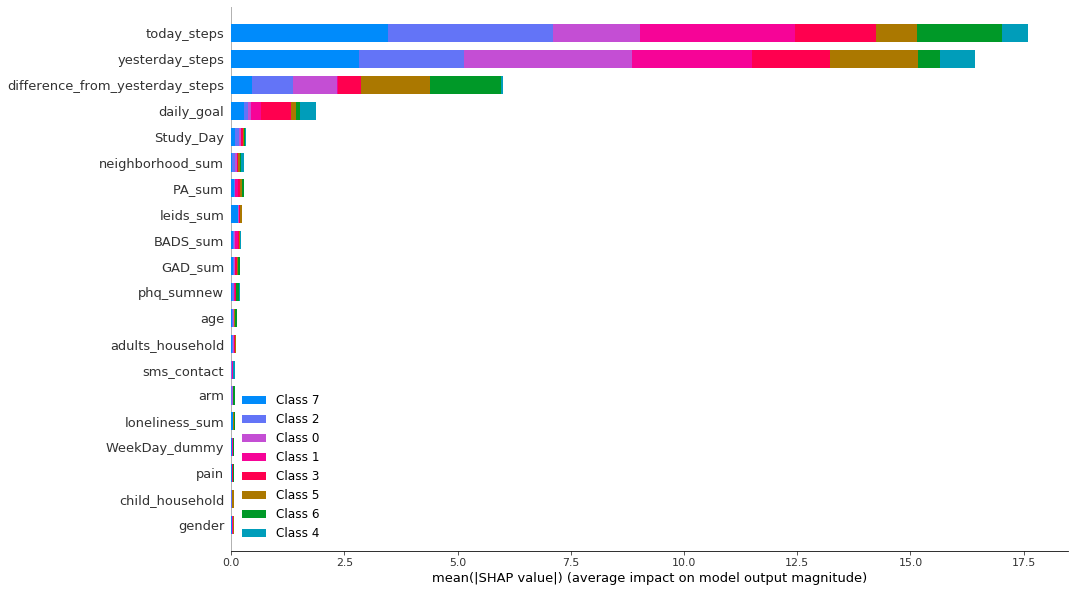

In [132]:
shap.summary_plot(shap_values_kp, cat_data, plot_type='bar', plot_size=(15,10))

### Try k-prototype removing some other variables which seems useless in the above clustering

#### For arm 0

In [147]:
# Separating out the features (removing variables that we do not want to include in the analysis)
features = data_dropnan2.drop(["ID_DIAMANTE","difference_from_yesterday_steps","Study_Day","basics_challenges_r",
                              "WeekDay_dummy","born_us","pain","sms_contact","smartphonetype"], axis=1)

# Separate out arm 0 and arm 1
features_arm_1 = features[features.arm == 1]
features_arm_0 = features[features.arm == 0]

kprot_data_arm0 = features_arm_0.copy()
kprot_data_arm1 = features_arm_1.copy()

In [148]:
# Elbow plot with cost (will take a LONG time)
costs = []
n_clusters = []
clusters_assigned = []

for i in tqdm(range(2, 30)):
    try:
        # The "Cao" approach selects prototypes for each data object based on the density of the data point and the dissimilarity value
        
        # The "Huang" approach will first select k distinct objects from the data set as initial k-modes, and
        # then assign the most frequent categories equally to the initial k-modes 
        # k-modes is used for clustering categorical variables. It defines clusters based on the number of matching
        # categories between data points
        
        # Step 1: Initialize the function by specifying the number of clusters
        kproto = KPrototypes(n_clusters= i, init='Huang', verbose=2)
    
        # Step 2: To build the clusters, fit.predict the data
        clusters = kproto.fit_predict(kprot_data_arm0, categorical=[0,2,3,4,5,6,9,10,11,12,13,14,22,23,24,25,26,27,28,32])
        
        # Step 3: Append the cost and number of clusters used to compute the cost to appropriate lists
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")

# Construct an elbow plot to find the optimal number for K
# Pick the point where the cost begins to decrease in a linear fashion
# For K-prototypes, cost is defined as the sum distance of all points to their respective cluster centroids
fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
fig.show()

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 126, ncost: 56306013601.583466
Run: 1, iteration: 2/100, moves: 99, ncost: 55754322850.27193
Run: 1, iteration: 3/100, moves: 48, ncost: 55631890153.58408
Run: 1, iteration: 4/100, moves: 19, ncost: 55618034792.80191
Run: 1, iteration: 5/100, moves: 0, ncost: 55618034792.80191
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 165, ncost: 55857327807.60562
Run: 2, iteration: 2/100, moves: 65, ncost: 55635107743.4525
Run: 2, iteration: 3/100, moves: 21, ncost: 55618034792.80194
Run: 2, iteration: 4/100, moves: 0, ncost: 55618034792.80194
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 249, ncost: 56730476210.26122
Run: 3, iteration: 2/100, moves: 156, ncost: 55920871589.11174
Run: 3, iteration: 3/100, moves: 67, ncost: 55753526487.61186
Run: 3, iterat

  4%|██▉                                                                                | 1/28 [00:30<13:50, 30.76s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 486, ncost: 43473176757.95617
Run: 1, iteration: 2/100, moves: 157, ncost: 42904438122.886635
Run: 1, iteration: 3/100, moves: 35, ncost: 42871275271.71164
Run: 1, iteration: 4/100, moves: 14, ncost: 42864596947.31898
Run: 1, iteration: 5/100, moves: 14, ncost: 42859345466.54346
Run: 1, iteration: 6/100, moves: 4, ncost: 42858295503.4394
Run: 1, iteration: 7/100, moves: 2, ncost: 42858128318.26704
Run: 1, iteration: 8/100, moves: 1, ncost: 42858100891.058136
Run: 1, iteration: 9/100, moves: 0, ncost: 42858100891.058136
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 575, ncost: 47694837533.177414
Run: 2, iteration: 2/100, moves: 229, ncost: 46026960531.81429
Run: 2, iteration: 3/100, moves: 140, ncost: 45170787399.969574
Run: 2, iteration: 4/100, moves: 110, ncost: 44682088093.378716
Run: 2, iteration: 5/100, m

Run: 10, iteration: 11/100, moves: 1, ncost: 42858179503.72644
Run: 10, iteration: 12/100, moves: 2, ncost: 42858096859.628105
Run: 10, iteration: 13/100, moves: 0, ncost: 42858096859.628105
Best run was number 5


  7%|█████▉                                                                             | 2/28 [01:04<13:44, 31.70s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 338, ncost: 36836652696.2936
Run: 1, iteration: 2/100, moves: 229, ncost: 35763566499.92547
Run: 1, iteration: 3/100, moves: 159, ncost: 35281264961.10735
Run: 1, iteration: 4/100, moves: 77, ncost: 35138835742.799835
Run: 1, iteration: 5/100, moves: 61, ncost: 35061233083.03588
Run: 1, iteration: 6/100, moves: 34, ncost: 35028363999.2526
Run: 1, iteration: 7/100, moves: 25, ncost: 34993471597.8117
Run: 1, iteration: 8/100, moves: 29, ncost: 34950331731.634544
Run: 1, iteration: 9/100, moves: 19, ncost: 34938570415.08867
Run: 1, iteration: 10/100, moves: 10, ncost: 34934006770.12165
Run: 1, iteration: 11/100, moves: 16, ncost: 34927481646.52229
Run: 1, iteration: 12/100, moves: 3, ncost: 34927176683.09846
Run: 1, iteration: 13/100, moves: 0, ncost: 34927176683.09846
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, move

Run: 9, iteration: 8/100, moves: 24, ncost: 34937855259.77135
Run: 9, iteration: 9/100, moves: 9, ncost: 34933800603.571434
Run: 9, iteration: 10/100, moves: 15, ncost: 34927481646.5223
Run: 9, iteration: 11/100, moves: 3, ncost: 34927176683.09845
Run: 9, iteration: 12/100, moves: 0, ncost: 34927176683.09845
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 424, ncost: 37063629061.26624
Run: 10, iteration: 2/100, moves: 225, ncost: 35716715553.145424
Run: 10, iteration: 3/100, moves: 130, ncost: 35301566881.76305
Run: 10, iteration: 4/100, moves: 78, ncost: 35135895402.24019
Run: 10, iteration: 5/100, moves: 68, ncost: 35042851579.249084
Run: 10, iteration: 6/100, moves: 32, ncost: 35015473238.74431
Run: 10, iteration: 7/100, moves: 27, ncost: 34989553991.95148
Run: 10, iteration: 8/100, moves: 23, ncost: 34974938310.31576
Run: 10, iteration: 9/100, moves: 13, ncost: 34970670934.401726
Run: 10, iteration: 10/100, moves: 22

 11%|████████▉                                                                          | 3/28 [01:44<14:10, 34.04s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 453, ncost: 32294105472.182163
Run: 1, iteration: 2/100, moves: 195, ncost: 31035815723.12975
Run: 1, iteration: 3/100, moves: 86, ncost: 30720975129.536446
Run: 1, iteration: 4/100, moves: 77, ncost: 30575026190.28499
Run: 1, iteration: 5/100, moves: 44, ncost: 30473732394.873962
Run: 1, iteration: 6/100, moves: 36, ncost: 30409482536.5876
Run: 1, iteration: 7/100, moves: 14, ncost: 30403013810.588085
Run: 1, iteration: 8/100, moves: 8, ncost: 30400571540.092773
Run: 1, iteration: 9/100, moves: 1, ncost: 30400498260.37897
Run: 1, iteration: 10/100, moves: 0, ncost: 30400498260.37897
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 526, ncost: 31970330918.854015
Run: 2, iteration: 2/100, moves: 255, ncost: 30981065524.82428
Run: 2, iteration: 3/100, moves:

Run: 9, iteration: 7/100, moves: 77, ncost: 30267898095.848896
Run: 9, iteration: 8/100, moves: 39, ncost: 30242085895.045288
Run: 9, iteration: 9/100, moves: 17, ncost: 30235641426.57547
Run: 9, iteration: 10/100, moves: 10, ncost: 30231697507.531536
Run: 9, iteration: 11/100, moves: 6, ncost: 30230410714.576595
Run: 9, iteration: 12/100, moves: 9, ncost: 30227927958.5688
Run: 9, iteration: 13/100, moves: 6, ncost: 30226991902.595757
Run: 9, iteration: 14/100, moves: 1, ncost: 30226956969.310513
Run: 9, iteration: 15/100, moves: 0, ncost: 30226956969.310513
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 500, ncost: 32515279673.278248
Run: 10, iteration: 2/100, moves: 146, ncost: 32223224127.677094
Run: 10, iteration: 3/100, moves: 69, ncost: 32134432107.07606
Run: 10, iteration: 4/100, moves: 48, ncost: 32084193150.11405
Run: 10, iteration: 5/100, moves: 57, ncost: 32003483928.47031
Run: 10, iteration: 6/100, moves: 67

 14%|███████████▊                                                                       | 4/28 [02:27<14:42, 36.78s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 824, ncost: 33902554846.15343
Run: 1, iteration: 2/100, moves: 397, ncost: 31390882606.90042
Run: 1, iteration: 3/100, moves: 219, ncost: 28728170377.55622
Run: 1, iteration: 4/100, moves: 173, ncost: 27596974540.094765
Run: 1, iteration: 5/100, moves: 86, ncost: 27357573299.453323
Run: 1, iteration: 6/100, moves: 55, ncost: 27229363925.441887
Run: 1, iteration: 7/100, moves: 33, ncost: 27205690813.69387
Run: 1, iteration: 8/100, moves: 17, ncost: 27199847697.361023
Run: 1, iteration: 9/100, moves: 15, ncost: 27194213627.990223
Run: 1, iteration: 10/100, moves: 17, ncost: 27183875644.085964
Run: 1, iteration: 11/100, moves: 36, ncost: 27155213772.614708
Run: 1, iteration: 12/100, moves: 39, ncost: 27130803673.060513
Run: 1, iteration: 13/100, moves: 35, ncost: 27109563841.9683
Run: 1, iteration: 14/100, moves: 30, ncost: 27078184434.476795
Run: 1, iteration: 15/100, moves: 3

Run: 6, iteration: 10/100, moves: 26, ncost: 27230483927.230476
Run: 6, iteration: 11/100, moves: 26, ncost: 27216373671.486057
Run: 6, iteration: 12/100, moves: 22, ncost: 27203989133.954823
Run: 6, iteration: 13/100, moves: 33, ncost: 27181359443.841
Run: 6, iteration: 14/100, moves: 27, ncost: 27158569227.21878
Run: 6, iteration: 15/100, moves: 27, ncost: 27143046611.54152
Run: 6, iteration: 16/100, moves: 36, ncost: 27120020170.705418
Run: 6, iteration: 17/100, moves: 32, ncost: 27096988902.851685
Run: 6, iteration: 18/100, moves: 33, ncost: 27066500104.32388
Run: 6, iteration: 19/100, moves: 27, ncost: 27052581862.892742
Run: 6, iteration: 20/100, moves: 8, ncost: 27051634498.345882
Run: 6, iteration: 21/100, moves: 1, ncost: 27051609828.61002
Run: 6, iteration: 22/100, moves: 0, ncost: 27051609828.61002
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 659, ncost: 30688628433.609703
Run: 7, iteration: 2/100, moves: 25

 18%|██████████████▊                                                                    | 5/28 [03:30<17:06, 44.65s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 297, ncost: 26694566758.94497
Run: 1, iteration: 2/100, moves: 234, ncost: 25832517651.998768
Run: 1, iteration: 3/100, moves: 185, ncost: 25261568114.81508
Run: 1, iteration: 4/100, moves: 135, ncost: 24980598708.228382
Run: 1, iteration: 5/100, moves: 83, ncost: 24841977857.726765
Run: 1, iteration: 6/100, moves: 55, ncost: 24773431751.72406
Run: 1, iteration: 7/100, moves: 24, ncost: 24763293020.3282
Run: 1, iteration: 8/100, moves: 7, ncost: 24761756518.22916
Run: 1, iteration: 9/100, moves: 9, ncost: 24760117925.68845
Run: 1, iteration: 10/100, moves: 11, ncost: 24758004078.92293
Run: 1, iteration: 11/100, moves: 8, ncost: 24756973421.906376
Run: 1, iteration: 12/100, moves: 5, ncost: 24756255935.241734
Run: 1, iteration: 13/100, moves: 0, ncost: 24756255935.241734
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, 

Run: 8, iteration: 9/100, moves: 27, ncost: 24554495826.137943
Run: 8, iteration: 10/100, moves: 20, ncost: 24538753725.946945
Run: 8, iteration: 11/100, moves: 19, ncost: 24526840605.682545
Run: 8, iteration: 12/100, moves: 12, ncost: 24523053132.4938
Run: 8, iteration: 13/100, moves: 8, ncost: 24521117959.329483
Run: 8, iteration: 14/100, moves: 6, ncost: 24517850227.80798
Run: 8, iteration: 15/100, moves: 10, ncost: 24513078536.43848
Run: 8, iteration: 16/100, moves: 4, ncost: 24512596765.35744
Run: 8, iteration: 17/100, moves: 0, ncost: 24512596765.35744
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 461, ncost: 27295080469.392387
Run: 9, iteration: 2/100, moves: 263, ncost: 25725069280.932907
Run: 9, iteration: 3/100, moves: 181, ncost: 25171754089.276608
Run: 9, iteration: 4/100, moves: 110, ncost: 25013202196.06239
Run: 9, iteration: 5/100, moves: 56, ncost:

 21%|█████████████████▊                                                                 | 6/28 [04:21<17:06, 46.67s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 611, ncost: 24374121983.545387
Run: 1, iteration: 2/100, moves: 242, ncost: 23460756371.370262
Run: 1, iteration: 3/100, moves: 113, ncost: 23229320768.848965
Run: 1, iteration: 4/100, moves: 130, ncost: 22945379987.956314
Run: 1, iteration: 5/100, moves: 84, ncost: 22854437314.71967
Run: 1, iteration: 6/100, moves: 88, ncost: 22741953987.89564
Run: 1, iteration: 7/100, moves: 94, ncost: 22604823441.102127
Run: 1, iteration: 8/100, moves: 83, ncost: 22516095426.365265
Run: 1, iteration: 9/100, moves: 55, ncost: 22481561166.68725
Run: 1, iteration: 10/100, moves: 45, ncost: 22453298844.92911
Run: 1, iteration: 11/100, moves: 42, ncost: 22411268217.94887
Run: 1, iteration: 12/100, moves: 29, ncost: 22389046250.72094
Run: 1, iteration: 13/100, moves: 30, ncost: 22373779129.715496
Run: 1, iteration: 14/100, moves: 12, ncost: 22369650437.396793
Run: 1, iteration: 15/100, moves: 8

Run: 8, iteration: 3/100, moves: 159, ncost: 22549036720.184776
Run: 8, iteration: 4/100, moves: 102, ncost: 22409530598.48124
Run: 8, iteration: 5/100, moves: 53, ncost: 22375463981.133236
Run: 8, iteration: 6/100, moves: 22, ncost: 22368360468.86722
Run: 8, iteration: 7/100, moves: 15, ncost: 22362225443.261223
Run: 8, iteration: 8/100, moves: 16, ncost: 22357291287.386856
Run: 8, iteration: 9/100, moves: 6, ncost: 22356531825.934616
Run: 8, iteration: 10/100, moves: 3, ncost: 22356170032.781578
Run: 8, iteration: 11/100, moves: 8, ncost: 22355160001.976154
Run: 8, iteration: 12/100, moves: 1, ncost: 22355123098.48496
Run: 8, iteration: 13/100, moves: 0, ncost: 22355123098.48496
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 520, ncost: 24840589104.46567
Run: 9, iteration: 2/100, moves: 292, ncost: 23428572253.34426
Run: 9, iteration: 3/100, moves: 230, ncost: 22739852893.27881
Run: 9, iteration: 4/100, moves: 117, nco

 25%|████████████████████▊                                                              | 7/28 [05:16<17:08, 48.98s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 531, ncost: 22304745271.67773
Run: 1, iteration: 2/100, moves: 175, ncost: 21761666548.399216
Run: 1, iteration: 3/100, moves: 113, ncost: 21565754952.13737
Run: 1, iteration: 4/100, moves: 74, ncost: 21419486955.440674
Run: 1, iteration: 5/100, moves: 71, ncost: 21312660808.257942
Run: 1, iteration: 6/100, moves: 55, ncost: 21244016302.828213
Run: 1, iteration: 7/100, moves: 45, ncost: 21209962162.97323
Run: 1, iteration: 8/100, moves: 30, ncost: 21197865653.85152
Run: 1, iteration: 9/100, moves: 21, ncost: 21187442003.54694
Run: 1, iteration: 10/100, moves: 24, ncost: 21180558347.299232
Run: 1, iteration: 11/100, moves: 13, ncost: 21177899967.587307
Run: 1, iteration: 12/100, moves: 8, ncost: 21176075067.5757
Run: 1, iteration: 13/100, moves: 17, ncost: 21171821865.94871
Run: 1, iteration: 14/100, moves: 11, ncost: 21170065841.3734
Run: 1, iteration: 15/100, moves: 13, nco

Run: 7, iteration: 18/100, moves: 43, ncost: 21412672809.683002
Run: 7, iteration: 19/100, moves: 43, ncost: 21348726657.7527
Run: 7, iteration: 20/100, moves: 30, ncost: 21313559816.055683
Run: 7, iteration: 21/100, moves: 18, ncost: 21298288088.03621
Run: 7, iteration: 22/100, moves: 15, ncost: 21284141963.6623
Run: 7, iteration: 23/100, moves: 12, ncost: 21279579586.302586
Run: 7, iteration: 24/100, moves: 6, ncost: 21278801206.283485
Run: 7, iteration: 25/100, moves: 5, ncost: 21277586745.39685
Run: 7, iteration: 26/100, moves: 10, ncost: 21275868159.403706
Run: 7, iteration: 27/100, moves: 5, ncost: 21275426833.604107
Run: 7, iteration: 28/100, moves: 1, ncost: 21275388616.901638
Run: 7, iteration: 29/100, moves: 0, ncost: 21275388616.901638
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 692, ncost: 24895573873.764874
Run: 8, iteration: 2/100, moves: 257, ncost: 22798198847.519657
Run: 8, iteration: 3/100, moves: 17

 29%|███████████████████████▋                                                           | 8/28 [06:26<18:29, 55.48s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 578, ncost: 21551509683.743633
Run: 1, iteration: 2/100, moves: 248, ncost: 20442275006.067337
Run: 1, iteration: 3/100, moves: 118, ncost: 20305564918.59178
Run: 1, iteration: 4/100, moves: 76, ncost: 20242491891.353577
Run: 1, iteration: 5/100, moves: 49, ncost: 20206685415.91076
Run: 1, iteration: 6/100, moves: 36, ncost: 20170687809.030483
Run: 1, iteration: 7/100, moves: 54, ncost: 20125112783.47001
Run: 1, iteration: 8/100, moves: 35, ncost: 20101562949.93933
Run: 1, iteration: 9/100, moves: 27, ncost: 20075634097.80072
Run: 1, iteration: 10/100, moves: 16, ncost: 20068895186.613605
Run: 1, iteration: 11/100, moves: 18, ncost: 20061285808.220196
Run: 1, iteration: 12/100, moves: 29, ncost: 20049690972.83712
Run: 1, iteration: 13/100, moves: 31, ncost: 20034484877.57706
Run: 1, iteration: 14/100, moves: 39, ncost: 20020405500.082325
Run: 1, iteration: 15/100, moves: 17,

Run: 7, iteration: 6/100, moves: 53, ncost: 20144541805.41826
Run: 7, iteration: 7/100, moves: 55, ncost: 20054536006.06453
Run: 7, iteration: 8/100, moves: 43, ncost: 20004977541.83579
Run: 7, iteration: 9/100, moves: 21, ncost: 19991227009.578606
Run: 7, iteration: 10/100, moves: 11, ncost: 19984199819.128365
Run: 7, iteration: 11/100, moves: 10, ncost: 19971847121.23556
Run: 7, iteration: 12/100, moves: 9, ncost: 19967055993.78473
Run: 7, iteration: 13/100, moves: 11, ncost: 19963726570.778614
Run: 7, iteration: 14/100, moves: 15, ncost: 19953058355.391216
Run: 7, iteration: 15/100, moves: 53, ncost: 19872148526.48719
Run: 7, iteration: 16/100, moves: 46, ncost: 19796386115.662594
Run: 7, iteration: 17/100, moves: 52, ncost: 19693629532.719357
Run: 7, iteration: 18/100, moves: 50, ncost: 19595675959.85479
Run: 7, iteration: 19/100, moves: 37, ncost: 19540817418.72378
Run: 7, iteration: 20/100, moves: 33, ncost: 19495382361.30974
Run: 7, iteration: 21/100, moves: 20, ncost: 194853012

 32%|██████████████████████████▋                                                        | 9/28 [07:49<20:08, 63.61s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 560, ncost: 20282201911.42099
Run: 1, iteration: 2/100, moves: 304, ncost: 19247759982.344536
Run: 1, iteration: 3/100, moves: 165, ncost: 18793561917.501698
Run: 1, iteration: 4/100, moves: 124, ncost: 18523829848.90476
Run: 1, iteration: 5/100, moves: 79, ncost: 18383217418.05485
Run: 1, iteration: 6/100, moves: 74, ncost: 18264809063.418358
Run: 1, iteration: 7/100, moves: 72, ncost: 18149490150.157703
Run: 1, iteration: 8/100, moves: 38, ncost: 18102582619.416077
Run: 1, iteration: 9/100, moves: 19, ncost: 18090818379.523533
Run: 1, iteration: 10/100, moves: 21, ncost: 18079932688.938526
Run: 1, iteration: 11/100, moves: 25, ncost: 18070140600.456276
Run: 1, iteration: 12/100, moves: 20, ncost: 18063526367.202927
Run: 1, iteration: 13/100, moves: 16, ncost: 18045792921.352932
Run: 1, iteration: 14/100, moves: 25, ncost: 18021483910.59709
Run: 1, iteration: 15/100, moves:

Run: 6, iteration: 2/100, moves: 287, ncost: 20680835758.36508
Run: 6, iteration: 3/100, moves: 144, ncost: 19885612841.426533
Run: 6, iteration: 4/100, moves: 114, ncost: 19438155132.812878
Run: 6, iteration: 5/100, moves: 87, ncost: 19253446175.54484
Run: 6, iteration: 6/100, moves: 73, ncost: 19085018248.18526
Run: 6, iteration: 7/100, moves: 87, ncost: 18830680339.637196
Run: 6, iteration: 8/100, moves: 77, ncost: 18616945594.20633
Run: 6, iteration: 9/100, moves: 53, ncost: 18467195497.691677
Run: 6, iteration: 10/100, moves: 22, ncost: 18435819339.319138
Run: 6, iteration: 11/100, moves: 12, ncost: 18431612168.365177
Run: 6, iteration: 12/100, moves: 9, ncost: 18430069990.78054
Run: 6, iteration: 13/100, moves: 7, ncost: 18428714545.933212
Run: 6, iteration: 14/100, moves: 12, ncost: 18424203325.00547
Run: 6, iteration: 15/100, moves: 11, ncost: 18421176907.29636
Run: 6, iteration: 16/100, moves: 9, ncost: 18419577956.294266
Run: 6, iteration: 17/100, moves: 7, ncost: 18418652408

 36%|█████████████████████████████▎                                                    | 10/28 [09:53<24:33, 81.85s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 556, ncost: 20426582427.55868
Run: 1, iteration: 2/100, moves: 225, ncost: 19324108004.414024
Run: 1, iteration: 3/100, moves: 199, ncost: 18653461577.803623
Run: 1, iteration: 4/100, moves: 138, ncost: 18368660370.697075
Run: 1, iteration: 5/100, moves: 102, ncost: 18169783615.839527
Run: 1, iteration: 6/100, moves: 110, ncost: 17816243270.687065
Run: 1, iteration: 7/100, moves: 83, ncost: 17663184087.652985
Run: 1, iteration: 8/100, moves: 77, ncost: 17568039171.6536
Run: 1, iteration: 9/100, moves: 56, ncost: 17510187282.83168
Run: 1, iteration: 10/100, moves: 45, ncost: 17475246476.178425
Run: 1, iteration: 11/100, moves: 36, ncost: 17413364044.80561
Run: 1, iteration: 12/100, moves: 23, ncost: 17399940333.525715
Run: 1, iteration: 13/100, moves: 14, ncost: 17394958117.224403
Run: 1, iteration: 14/100, moves: 1, ncost: 17394834918.100006
Run: 1, iteration: 15/100, moves:

Run: 6, iteration: 18/100, moves: 26, ncost: 18163132297.927868
Run: 6, iteration: 19/100, moves: 26, ncost: 18147432617.994923
Run: 6, iteration: 20/100, moves: 26, ncost: 18135880798.92461
Run: 6, iteration: 21/100, moves: 31, ncost: 18108640328.173084
Run: 6, iteration: 22/100, moves: 21, ncost: 18064725516.723618
Run: 6, iteration: 23/100, moves: 27, ncost: 18029047767.46261
Run: 6, iteration: 24/100, moves: 44, ncost: 17942945827.382317
Run: 6, iteration: 25/100, moves: 77, ncost: 17671308293.57801
Run: 6, iteration: 26/100, moves: 93, ncost: 17375119080.13815
Run: 6, iteration: 27/100, moves: 88, ncost: 17148357340.577894
Run: 6, iteration: 28/100, moves: 56, ncost: 16928733760.75398
Run: 6, iteration: 29/100, moves: 40, ncost: 16883350220.634954
Run: 6, iteration: 30/100, moves: 15, ncost: 16879435068.631277
Run: 6, iteration: 31/100, moves: 8, ncost: 16875743350.842497
Run: 6, iteration: 32/100, moves: 5, ncost: 16874750034.109741
Run: 6, iteration: 33/100, moves: 5, ncost: 168

 39%|████████████████████████████████▏                                                 | 11/28 [11:58<26:48, 94.62s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 531, ncost: 18205188298.895763
Run: 1, iteration: 2/100, moves: 226, ncost: 17372163914.59185
Run: 1, iteration: 3/100, moves: 174, ncost: 16993064403.830442
Run: 1, iteration: 4/100, moves: 144, ncost: 16760661688.56868
Run: 1, iteration: 5/100, moves: 133, ncost: 16573964980.63127
Run: 1, iteration: 6/100, moves: 96, ncost: 16391845265.881702
Run: 1, iteration: 7/100, moves: 71, ncost: 16268843477.196638
Run: 1, iteration: 8/100, moves: 70, ncost: 16164705899.581232
Run: 1, iteration: 9/100, moves: 60, ncost: 16110192740.464117
Run: 1, iteration: 10/100, moves: 46, ncost: 16070096451.336874
Run: 1, iteration: 11/100, moves: 23, ncost: 16060594023.429314
Run: 1, iteration: 12/100, moves: 11, ncost: 16056441654.56235
Run: 1, iteration: 13/100, moves: 7, ncost: 16053598887.866356
Run: 1, iteration: 14/100, moves: 9, ncost: 16050197124.654688
Run: 1, iteration: 15/100, moves: 

Run: 6, iteration: 28/100, moves: 2, ncost: 16322601221.279097
Run: 6, iteration: 29/100, moves: 2, ncost: 16322333718.302729
Run: 6, iteration: 30/100, moves: 8, ncost: 16320661212.709608
Run: 6, iteration: 31/100, moves: 19, ncost: 16316601185.086117
Run: 6, iteration: 32/100, moves: 12, ncost: 16314110007.826864
Run: 6, iteration: 33/100, moves: 7, ncost: 16313253673.800043
Run: 6, iteration: 34/100, moves: 7, ncost: 16312326951.342823
Run: 6, iteration: 35/100, moves: 1, ncost: 16312225241.438965
Run: 6, iteration: 36/100, moves: 2, ncost: 16312003090.337622
Run: 6, iteration: 37/100, moves: 1, ncost: 16311866362.778515
Run: 6, iteration: 38/100, moves: 0, ncost: 16311866362.778515
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 616, ncost: 18962000100.69978
Run: 7, iteration: 2/100, moves: 282, ncost: 17596968443.699535
Run: 7, iteration: 3/100, moves: 167, nco

 43%|██████████████████████████████████▋                                              | 12/28 [14:16<28:45, 107.83s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 476, ncost: 18106415358.696518
Run: 1, iteration: 2/100, moves: 311, ncost: 17183428886.753765
Run: 1, iteration: 3/100, moves: 216, ncost: 16692035832.988476
Run: 1, iteration: 4/100, moves: 136, ncost: 16403278030.983942
Run: 1, iteration: 5/100, moves: 140, ncost: 15958687953.433594
Run: 1, iteration: 6/100, moves: 94, ncost: 15737361386.589493
Run: 1, iteration: 7/100, moves: 44, ncost: 15682371221.26272
Run: 1, iteration: 8/100, moves: 34, ncost: 15655275334.903864
Run: 1, iteration: 9/100, moves: 22, ncost: 15639584903.70291
Run: 1, iteration: 10/100, moves: 24, ncost: 15619127654.892706
Run: 1, iteration: 11/100, moves: 24, ncost: 15605990717.200226
Run: 1, iteration: 12/100, moves: 42, ncost: 15570112545.612411
Run: 1, iteration: 13/100, moves: 49, ncost: 15532143304.183264
Run: 1, iteration: 14/100, moves: 62, ncost: 15481504711.380993
Run: 1, iteration: 15/100, mov

Run: 7, iteration: 5/100, moves: 72, ncost: 15723192083.036526
Run: 7, iteration: 6/100, moves: 35, ncost: 15686481920.408228
Run: 7, iteration: 7/100, moves: 22, ncost: 15668575315.125029
Run: 7, iteration: 8/100, moves: 16, ncost: 15652872786.249926
Run: 7, iteration: 9/100, moves: 10, ncost: 15648641908.576738
Run: 7, iteration: 10/100, moves: 1, ncost: 15648460292.632769
Run: 7, iteration: 11/100, moves: 0, ncost: 15648460292.632769
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 418, ncost: 19447631406.250122
Run: 8, iteration: 2/100, moves: 317, ncost: 17858434303.726936
Run: 8, iteration: 3/100, moves: 241, ncost: 16696532604.09882
Run: 8, iteration: 4/100, moves: 145, ncost: 16368513264.360533
Run: 8, iteration: 5/100, moves: 114, ncost: 16204684021.615034
Run: 8, iteration: 6/100, moves: 90, ncost: 16102866664.35337
Run: 8, iteration: 7/100, moves: 93, ncost: 16005956295.159817
Run: 8, iteration: 8/100, moves: 75

 46%|█████████████████████████████████████▌                                           | 13/28 [16:28<28:44, 114.98s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 634, ncost: 16416569870.649933
Run: 1, iteration: 2/100, moves: 248, ncost: 15711363694.566235
Run: 1, iteration: 3/100, moves: 156, ncost: 15479990076.175232
Run: 1, iteration: 4/100, moves: 102, ncost: 15266777579.893044
Run: 1, iteration: 5/100, moves: 83, ncost: 15075830902.992699
Run: 1, iteration: 6/100, moves: 81, ncost: 14949205462.826721
Run: 1, iteration: 7/100, moves: 61, ncost: 14902837680.099443
Run: 1, iteration: 8/100, moves: 47, ncost: 14881507304.76335
Run: 1, iteration: 9/100, moves: 23, ncost: 14867149960.089521
Run: 1, iteration: 10/100, moves: 14, ncost: 14861805460.844156
Run: 1, iteration: 11/100, moves: 16, ncost: 14855440757.463684
Run: 1, iteration: 12/100, moves: 6, ncost: 14854207306.405363
Run: 1, iteration: 13/100, moves: 3, ncost: 14853724248.087454
Run: 1, iteration: 14/100, moves: 0, ncost: 14853724248.087454
Init: initializing centroids
Init

Run: 6, iteration: 8/100, moves: 26, ncost: 15592064159.18637
Run: 6, iteration: 9/100, moves: 32, ncost: 15575510001.315422
Run: 6, iteration: 10/100, moves: 16, ncost: 15571474260.21529
Run: 6, iteration: 11/100, moves: 5, ncost: 15570879536.025118
Run: 6, iteration: 12/100, moves: 0, ncost: 15570879536.025118
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 491, ncost: 16841107720.78092
Run: 7, iteration: 2/100, moves: 335, ncost: 16057482833.568111
Run: 7, iteration: 3/100, moves: 132, ncost: 15893984567.477991
Run: 7, iteration: 4/100, moves: 63, ncost: 15859109143.236727
Run: 7, iteration: 5/100, moves: 34, ncost: 15845640840.668964
Run: 7, iteration: 6/100, moves: 20, ncost: 15829274746.116331
Run: 7, iteration: 7/100, moves: 11, ncost: 15822188101.238518
Run: 7, iteration: 8/100, moves: 26, ncost: 15811436126.484648
Run: 7, iteration: 9/100, moves: 18, ncost: 15806756200.499683
Run: 7, iteration: 10/100, moves: 20,

 50%|████████████████████████████████████████▌                                        | 14/28 [18:42<28:11, 120.82s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 649, ncost: 16973307004.054495
Run: 1, iteration: 2/100, moves: 317, ncost: 15893702608.87406
Run: 1, iteration: 3/100, moves: 172, ncost: 15623100262.702667
Run: 1, iteration: 4/100, moves: 124, ncost: 15433596880.839972
Run: 1, iteration: 5/100, moves: 106, ncost: 15216824348.599976
Run: 1, iteration: 6/100, moves: 69, ncost: 15062330542.621784
Run: 1, iteration: 7/100, moves: 47, ncost: 15004220274.817982
Run: 1, iteration: 8/100, moves: 57, ncost: 14945079885.51005
Run: 1, iteration: 9/100, moves: 72, ncost: 14815757625.97518
Run: 1, iteration: 10/100, moves: 75, ncost: 14637977420.57387
Run: 1, iteration: 11/100, moves: 79, ncost: 14433088006.664297
Run: 1, iteration: 12/100, moves: 56, ncost: 14356794413.671387
Run: 1, iteration: 13/100, moves: 72, ncost: 1

Run: 6, iteration: 8/100, moves: 49, ncost: 14480537940.873713
Run: 6, iteration: 9/100, moves: 36, ncost: 14449990048.829185
Run: 6, iteration: 10/100, moves: 32, ncost: 14432329157.515186
Run: 6, iteration: 11/100, moves: 18, ncost: 14428260487.754286
Run: 6, iteration: 12/100, moves: 10, ncost: 14426777126.328629
Run: 6, iteration: 13/100, moves: 1, ncost: 14426699084.081696
Run: 6, iteration: 14/100, moves: 0, ncost: 14426699084.081696
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 581, ncost: 16124274880.473942
Run: 7, iteration: 2/100, moves: 313, ncost: 15020647304.497124
Run: 7, iteration: 3/100, moves: 186, ncost: 14703049132.496763
Run: 7, iteration: 4/100, moves: 157, ncost: 14494341650.819036
Run: 7, iteration: 5/100, moves: 104, ncost: 14250113896.854996
Run: 7, iteration: 6/100, moves: 68, ncost: 14178604636.973125
Run: 7, iteration: 7/100, moves: 34, ncost: 14165723502.21961
Run: 7, iteration: 8/100, moves

 54%|███████████████████████████████████████████▍                                     | 15/28 [21:00<27:17, 125.93s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 696, ncost: 15203640587.307869
Run: 1, iteration: 2/100, moves: 262, ncost: 14685176158.051632
Run: 1, iteration: 3/100, moves: 92, ncost: 14576858181.395737
Run: 1, iteration: 4/100, moves: 78, ncost: 14484023188.06561
Run: 1, iteration: 5/100, moves: 68, ncost: 14426541242.908678
Run: 1, iteration: 6/100, moves: 59, ncost: 14376250984.404024
Run: 1, iteration: 7/100, moves: 42, ncost: 14351178694.613195
Run: 1, iteration: 8/100, moves: 25, ncost: 14344807347.985184
Run: 1, iteration: 9/100, moves: 21, ncost: 14336878230.65577
Run: 1, iteration: 10/100, moves: 6, ncost: 14334452148.058325
Run: 1, iteration: 11/100, moves: 8, ncost: 14332249672.525213
Run: 1, iteration: 12/100, moves: 8, ncost: 14328882109.781872
Run: 1, iteration: 13/100, moves: 14, ncost: 14323586436.502
Run: 1, iteration: 14/100, moves: 19, ncost: 14318655055.632792
Run: 1, iteration: 15/100, moves: 18, n

Run: 7, iteration: 21/100, moves: 25, ncost: 13704521654.485756
Run: 7, iteration: 22/100, moves: 12, ncost: 13700826544.823479
Run: 7, iteration: 23/100, moves: 12, ncost: 13698034749.066618
Run: 7, iteration: 24/100, moves: 16, ncost: 13691060801.118755
Run: 7, iteration: 25/100, moves: 9, ncost: 13689325125.942228
Run: 7, iteration: 26/100, moves: 1, ncost: 13689268162.493238
Run: 7, iteration: 27/100, moves: 0, ncost: 13689268162.493238
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 548, ncost: 17555653037.156815
Run: 8, iteration: 2/100, moves: 370, ncost: 15760472176.440287
Run: 8, iteration: 3/100, moves: 266, ncost: 14830729733.268148
Run: 8, iteration: 4/100, moves: 207, ncost: 14258244926.932402
Run: 8, iteration: 5/100, moves: 166, ncost: 13972897015.270622
Run: 8, iteration: 6/100, moves: 101, ncost: 13836757412.782131
Run: 8, iteration: 7/100, moves: 7

 57%|██████████████████████████████████████████████▎                                  | 16/28 [23:17<25:51, 129.29s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 657, ncost: 14682503988.152397
Run: 1, iteration: 2/100, moves: 252, ncost: 14236892187.700283
Run: 1, iteration: 3/100, moves: 154, ncost: 13947231396.261425
Run: 1, iteration: 4/100, moves: 88, ncost: 13843068976.328892
Run: 1, iteration: 5/100, moves: 79, ncost: 13626749019.479933
Run: 1, iteration: 6/100, moves: 91, ncost: 13394136611.489283
Run: 1, iteration: 7/100, moves: 66, ncost: 13208400617.075026
Run: 1, iteration: 8/100, moves: 33, ncost: 13145861447.705652
Run: 1, iteration: 9/100, moves: 23, ncost: 13111873904.745447
Run: 1, iteration: 10/100, moves: 19, ncost: 13103189710.154713
Run: 1, iteration: 11/100, moves: 20, ncost: 13091579872.93607
Run: 1, iteration: 12/100, moves: 11, ncost: 13089043610.977709
Run: 1, iteration: 13/100, moves: 9, ncost: 13087988976.129747
Run: 1, iteration: 14/100, moves: 1, ncost: 13087964412.176271
Run: 1, iteration: 15/100, moves:

Run: 6, iteration: 9/100, moves: 35, ncost: 14038828848.274014
Run: 6, iteration: 10/100, moves: 39, ncost: 13999795573.776117
Run: 6, iteration: 11/100, moves: 37, ncost: 13956570471.52939
Run: 6, iteration: 12/100, moves: 77, ncost: 13749635142.760426
Run: 6, iteration: 13/100, moves: 70, ncost: 13606366238.323858
Run: 6, iteration: 14/100, moves: 63, ncost: 13476522384.44894
Run: 6, iteration: 15/100, moves: 66, ncost: 13420105357.108715
Run: 6, iteration: 16/100, moves: 67, ncost: 13362038352.16958
Run: 6, iteration: 17/100, moves: 58, ncost: 13293932382.472284
Run: 6, iteration: 18/100, moves: 71, ncost: 13179620890.879353
Run: 6, iteration: 19/100, moves: 46, ncost: 13144798536.02215
Run: 6, iteration: 20/100, moves: 49, ncost: 13088819755.27879
Run: 6, iteration: 21/100, moves: 54, ncost: 13021519362.921425
Run: 6, iteration: 22/100, moves: 50, ncost: 12984484923.919752
Run: 6, iteration: 23/100, moves: 34, ncost: 12971362483.885735
Run: 6, iteration: 24/100, moves: 22, ncost: 1

 61%|█████████████████████████████████████████████████▏                               | 17/28 [26:11<26:07, 142.54s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 586, ncost: 15585965248.347214
Run: 1, iteration: 2/100, moves: 320, ncost: 14057455522.680689
Run: 1, iteration: 3/100, moves: 193, ncost: 13519905510.539602
Run: 1, iteration: 4/100, moves: 115, ncost: 13194141173.151041
Run: 1, iteration: 5/100, moves: 69, ncost: 13056877039.776749
Run: 1, iteration: 6/100, moves: 59, ncost: 12990758841.644737
Run: 1, iteration: 7/100, moves: 57, ncost: 12933529988.360744
Run: 1, iteration: 8/100, moves: 48, ncost: 12892328221.76204
Run: 1, iteration: 9/100, moves: 64, ncost: 12836202378.143806
Run: 1, iteration: 10/100, moves: 36, ncost: 12814378605.787268
Run: 1, iteration: 11/100, moves: 49, ncost: 12781043454.158033
Run: 1, iteration: 12/100, moves: 30, ncost: 12753642693.628984
Run: 1, iteration: 13/100, moves: 37, ncost: 12727112164.438766
Run: 1, iteration: 14/100, moves: 29, ncost: 12703706058.094904
Run: 1, iteration: 15/100, mov

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 542, ncost: 14828621270.713068
Run: 7, iteration: 2/100, moves: 219, ncost: 14127078481.962717
Run: 7, iteration: 3/100, moves: 166, ncost: 13830036813.249907
Run: 7, iteration: 4/100, moves: 149, ncost: 13515604669.004858
Run: 7, iteration: 5/100, moves: 119, ncost: 13293315847.95841
Run: 7, iteration: 6/100, moves: 108, ncost: 13130468694.855457
Run: 7, iteration: 7/100, moves: 88, ncost: 13008659434.21397
Run: 7, iteration: 8/100, moves: 108, ncost: 12785000213.733862
Run: 7, iteration: 9/100, moves: 94, ncost: 12599934959.91669
Run: 7, iteration: 10/100, moves: 46, ncost: 12572142809.174911
Run: 7, iteration: 11/100, moves: 37, ncost: 12553877854.91108
Run: 7, iteration: 12/100, moves: 6, ncost: 12551741334.127659
Run: 7, iteration: 13/100, moves: 0, ncost: 12551741334.127659
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: init

 64%|████████████████████████████████████████████████████                             | 18/28 [28:48<24:28, 146.89s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 457, ncost: 14943128308.846369
Run: 1, iteration: 2/100, moves: 243, ncost: 13987366456.51671
Run: 1, iteration: 3/100, moves: 184, ncost: 13182036257.08986
Run: 1, iteration: 4/100, moves: 112, ncost: 12877294256.51646
Run: 1, iteration: 5/100, moves: 77, ncost: 12791413898.32534
Run: 1, iteration: 6/100, moves: 61, ncost: 12754610509.421741
Run: 1, iteration: 7/100, moves: 39, ncost: 12727817574.28789
Run: 1, iteration: 8/100, moves: 44, ncost: 12699092633.496494
Run: 1, iteration: 9/100, moves: 50, ncost: 12667283346.16628
Run: 1, iteration: 10/100, moves: 32, ncost: 12655033163.89372
Run: 1, iteration: 11/100, moves: 14, ncost: 12650094079.07033
Run: 1, iteration: 12/100, moves: 19, ncost: 12640156080.448742
Run: 1, iteration: 13/100, moves: 14, ncost: 12633698630.730503
Run: 1, iteration: 14/100, moves: 15, ncost:

Starting iterations...
Run: 8, iteration: 1/100, moves: 525, ncost: 14626316583.942572
Run: 8, iteration: 2/100, moves: 338, ncost: 13787284818.78074
Run: 8, iteration: 3/100, moves: 216, ncost: 13354126594.046577
Run: 8, iteration: 4/100, moves: 158, ncost: 13065604220.72293
Run: 8, iteration: 5/100, moves: 139, ncost: 12787544964.62882
Run: 8, iteration: 6/100, moves: 94, ncost: 12571389503.8968
Run: 8, iteration: 7/100, moves: 77, ncost: 12277826776.402874
Run: 8, iteration: 8/100, moves: 57, ncost: 12187662198.506744
Run: 8, iteration: 9/100, moves: 34, ncost: 12166135374.835447
Run: 8, iteration: 10/100, moves: 40, ncost: 12147269167.569311
Run: 8, iteration: 11/100, moves: 20, ncost: 12139357779.52605
Run: 8, iteration: 12/100, moves: 20, ncost: 12133605826.3753
Run: 8, iteration: 13/100, moves: 20, ncost: 12128344947.472761
Run: 8, iteration: 14/100, moves: 27, ncost: 12122824139.894674
Run: 8, iteration: 15/100, moves: 17, ncost: 12115120175.254354
Run: 8, iteration: 16/100, mo

 68%|██████████████████████████████████████████████████████▉                          | 19/28 [31:22<22:20, 148.95s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 596, ncost: 14241923527.933525
Run: 1, iteration: 2/100, moves: 344, ncost: 13149616704.02771
Run: 1, iteration: 3/100, moves: 172, ncost: 12637596742.63406
Run: 1, iteration: 4/100, moves: 128, ncost: 12382912651.430916
Run: 1, iteration: 5/100, moves: 65, ncost: 12313438831.779623
Run: 1, iteration: 6/100, moves: 33, ncost: 12290676249.402142
Run: 1, iteration: 7/100, moves: 6, ncost: 12287716650.213684
Run: 1, iteration: 8/100, moves: 0, ncost: 12287716650.213684
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 508, ncost: 13415295028.081451
Run: 2, iteration: 2/100, moves: 222, ncost: 13060359383.029156
Run: 2, iteration: 3/100, moves: 121, ncost: 12875044099.332678
Run: 2, iteration: 4/100, moves: 76, ncost: 12807670638.822693
Run: 2, iteration: 5/100

Run: 7, iteration: 12/100, moves: 31, ncost: 11901776059.94296
Run: 7, iteration: 13/100, moves: 33, ncost: 11884231829.090446
Run: 7, iteration: 14/100, moves: 21, ncost: 11873666026.115602
Run: 7, iteration: 15/100, moves: 14, ncost: 11866521650.125502
Run: 7, iteration: 16/100, moves: 13, ncost: 11860072866.699461
Run: 7, iteration: 17/100, moves: 10, ncost: 11856131322.316435
Run: 7, iteration: 18/100, moves: 3, ncost: 11855129005.860867
Run: 7, iteration: 19/100, moves: 2, ncost: 11854780577.327562
Run: 7, iteration: 20/100, moves: 1, ncost: 11854542204.13863
Run: 7, iteration: 21/100, moves: 2, ncost: 11854132412.74086
Run: 7, iteration: 22/100, moves: 1, ncost: 11853475836.325846
Run: 7, iteration: 23/100, moves: 8, ncost: 11845071459.393305
Run: 7, iteration: 24/100, moves: 13, ncost: 11836437324.43835
Run: 7, iteration: 25/100, moves: 6, ncost: 11831711104.37132
Run: 7, iteration: 26/100, moves: 3, ncost: 11830362956.94933
Run: 7, iteration: 27/100, moves: 0, ncost: 1183036295

 71%|█████████████████████████████████████████████████████████▊                       | 20/28 [34:22<21:07, 158.49s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 647, ncost: 14274477403.890152
Run: 1, iteration: 2/100, moves: 304, ncost: 13046473059.023602
Run: 1, iteration: 3/100, moves: 159, ncost: 12586353189.153563
Run: 1, iteration: 4/100, moves: 94, ncost: 12309249008.446218
Run: 1, iteration: 5/100, moves: 112, ncost: 12078521338.25656
Run: 1, iteration: 6/100, moves: 106, ncost: 11827296593.957598
Run: 1, iteration: 7/100, moves: 68, ncost: 11699965795.039682
Run: 1, iteration: 8/100, moves: 56, ncost: 11632217959.289711
Run: 1, iteration: 9/100, moves: 31, ncost: 11613659686.50388
Run: 1, iteration: 10/100, moves: 46, ncost: 11564027143.549406
Run: 1, iteration: 11/100, moves: 33, ncost: 11523188556.634258
Run: 1, iteration: 12/100, moves: 35, ncost: 11497874267.502537
Run: 1, iteration: 13/100, moves: 17, ncost: 11481203345.183683
Run: 1, iteration: 14/100, moves: 12, ncost: 11464340404.813555
Run: 1, iteration: 15/100, mov

Run: 6, iteration: 11/100, moves: 43, ncost: 11406340309.267506
Run: 6, iteration: 12/100, moves: 27, ncost: 11392242183.858225
Run: 6, iteration: 13/100, moves: 22, ncost: 11371036698.48799
Run: 6, iteration: 14/100, moves: 19, ncost: 11359162954.202288
Run: 6, iteration: 15/100, moves: 6, ncost: 11357482850.33646
Run: 6, iteration: 16/100, moves: 0, ncost: 11357482850.33646
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 602, ncost: 13986609007.369442
Run: 7, iteration: 2/100, moves: 275, ncost: 13069372005.043953
Run: 7, iteration: 3/100, moves: 218, ncost: 12498200481.955738
Run: 7, iteration: 4/100, moves: 155, ncost: 12199851018.816502
Run: 7, iteration: 5/100, moves: 113, ncost: 11921541551.

 75%|████████████████████████████████████████████████████████████▊                    | 21/28 [36:28<17:21, 148.73s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 538, ncost: 12382355712.1442
Run: 1, iteration: 2/100, moves: 223, ncost: 11740868866.530874
Run: 1, iteration: 3/100, moves: 153, ncost: 11308491959.226051
Run: 1, iteration: 4/100, moves: 102, ncost: 11032439645.503183
Run: 1, iteration: 5/100, moves: 53, ncost: 10987212901.083158
Run: 1, iteration: 6/100, moves: 54, ncost: 10912231592.778923
Run: 1, iteration: 7/100, moves: 37, ncost: 10888442501.129045
Run: 1, iteration: 8/100, moves: 30, ncost: 10868350729.805376
Run: 1, iteration: 9/100, moves: 35, ncost: 10850759081.663303
Run: 1, iteration: 10/100, moves: 27, ncost: 10839302267.030033
Run: 1, iteration: 11/100, moves: 13, ncost: 10810889063.239298
Run: 1, iteration: 12/100, moves: 9, ncost: 10808525346.966022
Run: 1, iteration: 13/100, moves: 5, ncost: 10

Run: 5, iteration: 18/100, moves: 2, ncost: 11140356014.157108
Run: 5, iteration: 19/100, moves: 1, ncost: 11140232070.521273
Run: 5, iteration: 20/100, moves: 0, ncost: 11140232070.521273
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 548, ncost: 13665944243.486465
Run: 6, iteration: 2/100, moves: 264, ncost: 13027363382.650421
Run: 6, iteration: 3/100, moves: 169, ncost: 12507237409.509241
Run: 6, iteration: 4/100, moves: 121, ncost: 12132629733.973103
Run: 6, iteration: 5/100, moves: 95, ncost: 11860104555.855469
Run: 6, iteration: 6/100, moves: 99, ncost: 11628395525.190271
Run: 6, iteration: 7/100, moves: 65, ncost: 11550225932.083927
Run: 6, iteration: 8/100, moves: 60, ncost: 11503542181.641106
Run: 6, iteration: 9/100, moves: 59, ncost: 11464072532.78124
Run: 6, iteration: 10/100, moves: 56, ncost: 11429399499.151356
Run: 6, iteration: 11/100, moves: 50, nc

 79%|███████████████████████████████████████████████████████████████▋                 | 22/28 [38:44<14:29, 144.92s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 510, ncost: 11998615686.550251
Run: 1, iteration: 2/100, moves: 251, ncost: 11346787998.451368
Run: 1, iteration: 3/100, moves: 156, ncost: 11075527926.501886
Run: 1, iteration: 4/100, moves: 100, ncost: 10968274400.741945
Run: 1, iteration: 5/100, moves: 66, ncost: 10910106993.884539
Run: 1, iteration: 6/100, moves: 83, ncost: 10834523028.770021
Run: 1, iteration: 7/100, moves: 67, ncost: 10791846432.180262
Run: 1, iteration: 8/100, moves: 57, ncost: 10757471716.05332
Run: 1, iteration: 9/100, moves: 43, ncost: 10744602954.875385
Run: 1, iteration: 10/100, moves: 16, ncost: 10740672360.731955
Run: 1, iteration: 11/100, moves: 9, ncost: 10739269966.818165
Run: 1, iteration: 12/100, moves: 9, ncost: 10737564852.707779
Run: 1, iteration: 13/100, moves: 5, ncost: 10736651897.58161
Run: 1, iteration: 14/100, moves: 8, ncos

Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 614, ncost: 12494204302.763348
Run: 8, iteration: 2/100, moves: 341, ncost: 11602982273.6209
Run: 8, iteration: 3/100, moves: 207, ncost: 11286260729.163786
Run: 8, iteration: 4/100, moves: 134, ncost: 11144005846.057598
Run: 8, iteration: 5/100, moves: 102, ncost: 11075111157.382877
Run: 8, iteration: 6/100, moves: 86, ncost: 11016745883.43604
Run: 8, iteration: 7/100, moves: 61, ncost: 10969634028.198353
Run: 8, iteration: 8/100, moves: 53, ncost: 109335

 82%|██████████████████████████████████████████████████████████████████▌              | 23/28 [40:40<11:20, 136.00s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 654, ncost: 13240817318.41325
Run: 1, iteration: 2/100, moves: 316, ncost: 12334758441.50569
Run: 1, iteration: 3/100, moves: 161, ncost: 11853012533.163893
Run: 1, iteration: 4/100, moves: 127, ncost: 11508203530.549864
Run: 1, iteration: 5/100, moves: 85, ncost: 11119928835.042665
Run: 1, iteration: 6/100, moves: 55, ncost: 11055701539.450115
Run: 1, iteration: 7/100, m

Run: 5, iteration: 12/100, moves: 6, ncost: 10429046746.974646
Run: 5, iteration: 13/100, moves: 0, ncost: 10429046746.974646
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 544, ncost: 12351537243.13859
Run: 6, iteration: 2/100, moves: 292, ncost: 11720142901.889471
Run: 6, iteration: 3/100, moves: 219, ncost: 11279468961.661442
Run: 6, iteration: 4/100, moves: 137, ncost: 10908987320.558393
Run: 6, iteration: 5/100, moves: 98, ncost: 10789903751.451931
Run: 6, iteration: 6/100, moves: 73, ncost: 10715473607.903618
Run: 6, iteration: 7/100, moves: 61, ncost: 10651090950.09641
Run: 6, iteration: 8/100, moves: 30, ncost: 10634930655.142231
Run

Run: 10, iteration: 23/100, moves: 0, ncost: 10623124577.210794
Best run was number 5


 86%|█████████████████████████████████████████████████████████████████████▍           | 24/28 [43:08<09:19, 139.75s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 584, ncost: 13062871971.818455
Run: 1, iteration: 2/100, moves: 282, ncost: 11814386651.566229
Run: 1, iteration: 3/100, moves: 172, ncost: 11276139558.401033
Run: 1, iteration: 4/100, moves: 113, ncost: 11069491866.569675
Run: 1, iteration: 5/100, moves: 88, ncost: 10905488966.074495
Run: 1, iteration: 6/100, moves: 55, ncost: 10857062477.762854
Run: 1, iteration: 7/100, moves: 47, ncost: 10802156347.30533
Run: 1, iteration: 8/100, moves: 31, ncost: 10768243601.744793
Run: 1, iteration: 9/100, moves: 21, ncost: 10752665645.826225
Run: 1, iteration: 10/100, moves: 29, ncost: 10725641966.969967
Run: 1, iteration: 11/100, moves: 23, ncost: 10710503344.030535
Run: 1, iteration: 12/100, moves: 16, ncost: 10705263526.01058
Run: 1, iteration: 13/100, moves: 21, ncost: 10697417008.780144
Run: 1, iteration: 14/100, moves: 20, 

Run: 6, iteration: 9/100, moves: 40, ncost: 10166951519.334755
Run: 6, iteration: 10/100, moves: 37, ncost: 10146716975.812628
Run: 6, iteration: 11/100, moves: 23, ncost: 10131573716.659346
Run: 6, iteration: 12/100, moves: 17, ncost: 10127615168.450027
Run: 6, iteration: 13/100, moves: 4, ncost: 10126951234.364424
Run: 6, iteration: 14/100, moves: 10, ncost: 10124922991.686256
Run: 6, iteration: 15/100, moves: 1, ncost: 10124847288.215107
Run: 6, iteration: 16/100, moves: 0, ncost: 10124847288.215107
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 542, ncost: 12797495688.493076
Run: 7, iteration: 2/100, moves: 345, ncost: 11390818870.44131
Run: 7, iteration: 3/100, moves: 207, ncost: 10813879901.95197
Run: 7, iteration: 4/100, moves: 117, ncost: 106184

 89%|████████████████████████████████████████████████████████████████████████▎        | 25/28 [45:34<07:04, 141.61s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 654, ncost: 12056567054.986967
Run: 1, iteration: 2/100, moves: 341, ncost: 10865959242.532705
Run: 1, iteration: 3/100, moves: 178, ncost: 10532282015.2602
Run: 1, iteration: 4/100, moves: 121, ncost: 10407121396.223598
Run: 1, iteration: 5/100, moves: 71, ncost: 10348925140.66455
Run: 1, iteration: 6/100, moves: 51, ncost: 10283398380.674097
Run: 1, iteration: 7/100, moves: 39, ncost: 10249172025.5047
Run: 1, iteration: 8/100, moves: 19, ncost: 10243019619.689833
Run: 1, iteration: 9/100, moves: 17, ncost: 10238043260.725298
Run: 1, iteration: 10/100, moves: 12, ncost: 10235946777.732525
Run: 1, iteration: 11/100, moves: 8, ncost: 10234739924.871504
Run: 1, iteration: 12/100, moves: 12, ncost: 10232209448.49931
Run: 1, iteration: 13/100, moves: 7, ncost: 10231149272.861618
Run: 1, iteration: 14/100, moves: 4, ncost: 10230650293.522886
Run: 1, iteration: 15/100, moves: 0, n

Run: 7, iteration: 8/100, moves: 33, ncost: 10146456209.507233
Run: 7, iteration: 9/100, moves: 30, ncost: 10132590824.522512
Run: 7, iteration: 10/100, moves: 31, ncost: 10120494552.42175
Run: 7, iteration: 11/100, moves: 16, ncost: 10111657769.002514
Run: 7, iteration: 12/100, moves: 26, ncost: 10087530673.464478
Run: 7, iteration: 13/100, moves: 18, ncost: 10081629543.463562
Run: 7, iteration: 14/100, moves: 10, ncost: 10079093060.337849
Run: 7, iteration: 15/100, moves: 11, ncost: 10074903440.247673
Run: 7, iteration: 16/100, moves: 16, ncost: 10071814472.103003
Run: 7, iteration: 17/100, moves: 15, ncost: 10069072241.51732
Run: 7, iteration: 18/100, moves: 18, ncost: 10066004264.790121
Run: 7, iteration: 19/100, moves: 20, ncost: 10061574037.263033
Run: 7, iteration: 20/100, moves: 7, ncost: 10060828335.625614
Run: 7, iteration: 21/100, moves: 2, ncost: 10060669180.722715
Run: 7, iteration: 22/100, moves: 6, ncost: 10059833938.037119
Run: 7, iteration: 23/100, moves: 9, ncost: 100

 93%|███████████████████████████████████████████████████████████████████████████▏     | 26/28 [48:00<04:45, 142.89s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 712, ncost: 11848414885.495611
Run: 1, iteration: 2/100, moves: 276, ncost: 10962284638.18611
Run: 1, iteration: 3/100, moves: 162, ncost: 10587064573.76206
Run: 1, iteration: 4/100, moves: 117, ncost: 10409558105.722797
Run: 1, iteration: 5/100, moves: 102, ncost: 10231357447.444635
Run: 1, iteration: 6/100, moves: 74, ncost: 10126657531.60189
Run: 1, iteration: 7/100, moves: 68, ncost: 10034937682.32392
Run: 1, iteration: 8/100, moves: 56, ncost: 9993318908.338943
Run: 1, iteration: 9/100, moves: 23, ncost: 9986365543.870895
Run: 1, iteration: 10/100, moves: 28, ncost: 9977397401.99395
Run: 1, iteration: 11/100, moves: 14, ncost: 9972615759.651691
Run: 1, iteration: 12/100, moves: 19, ncost: 9967560898.390434
Run: 1, iteration: 13/100, moves: 37, ncost: 9937899342.094599
Run: 1, iteration: 14/100, moves: 53, ncost: 9898867742.88799
Run: 1, iteration: 15/100, moves: 40, nco

Run: 6, iteration: 9/100, moves: 43, ncost: 10070773415.560644
Run: 6, iteration: 10/100, moves: 27, ncost: 10052166204.783157
Run: 6, iteration: 11/100, moves: 23, ncost: 10039518915.29148
Run: 6, iteration: 12/100, moves: 14, ncost: 10035632760.891853
Run: 6, iteration: 13/100, moves: 11, ncost: 10033295098.329264
Run: 6, iteration: 14/100, moves: 1, ncost: 10033191193.393345
Run: 6, iteration: 15/100, moves: 1, ncost: 10033109332.442053
Run: 6, iteration: 16/100, moves: 0, ncost: 10033109332.442053
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 531, ncost: 11011978886.551098
Run: 7, iteration: 2/100, moves: 292, ncost: 10413953393.12291
Run: 7, iteration: 3/100, moves: 173, ncost: 10239296007.002861
Run: 7, iteration: 4/100, moves: 118, ncost: 10086623136.28152
Run: 7, iteration: 5/100, moves: 81, ncost: 9995260696.09355
Run: 7, iteration: 6/100, moves: 53, ncost: 9946412553.335972
Run: 7, iteration: 7/100, moves: 42,

 96%|██████████████████████████████████████████████████████████████████████████████   | 27/28 [50:29<02:24, 144.77s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 571, ncost: 10909125672.183449
Run: 1, iteration: 2/100, moves: 263, ncost: 10313267428.945631
Run: 1, iteration: 3/100, moves: 165, ncost: 10134331644.39177
Run: 1, iteration: 4/100, moves: 87, ncost: 10067306274.817831
Run: 1, iteration: 5/100, moves: 79, ncost: 9992120443.384865
Run: 1, iteration: 6/100, moves: 75, ncost: 9895023937.583838
Run: 1, iteration: 7/100, moves: 61, ncost: 9834980122.530859
Run: 1, iteration: 8/100, moves: 15, ncost: 9825032850.866856
Run: 1, iteration: 9/100, moves: 19, ncost: 9816145683.049036
Run: 1, iteration: 10/100, moves: 17, ncost: 9811688183.069698
Run: 1, iteration: 11/100, moves: 6, ncost: 9810661446.890226
Run: 1, iteration: 12/100, moves: 6, ncost: 9809738175.544138
Run: 1, iteration: 13/100, moves: 1, ncost: 9809693035.814257
Run: 1, iteration: 14/100, moves: 0, ncost: 980969

Run: 7, iteration: 1/100, moves: 606, ncost: 11637666492.316662
Run: 7, iteration: 2/100, moves: 326, ncost: 10464782604.205473
Run: 7, iteration: 3/100, moves: 167, ncost: 10033471830.019554
Run: 7, iteration: 4/100, moves: 106, ncost: 9764596214.010448
Run: 7, iteration: 5/100, moves: 88, ncost: 9626010761.70662
Run: 7, iteration: 6/100, moves: 69, ncost: 9557591538.72408
Run: 7, iteration: 7/100, moves: 36, ncost: 9536146867.324013
Run: 7, iteration: 8/100, moves: 28, ncost: 9523447889.53623
Run: 7, iteration: 9/100, moves: 16, ncost: 9520439042.28147
Run: 7, iteration: 10/100, moves: 10, ncost: 9518793453.120392
Run: 7, iteration: 11/100, moves: 15, ncost: 9515871650.228489
Run: 7, iteration: 12/100, moves: 12, ncost: 9509866732.018719
Run: 7, iteration: 13/100, moves: 6, ncost: 9508942347.071747
Run: 7, iteration: 14/100, moves: 7, ncost: 9507861348.27109
Run: 7, iteration: 15/100, moves: 4, ncost: 9507153838.085299
Run: 7, iteration: 16/100, moves: 0, ncost: 9507153838.085299
Ini

100%|█████████████████████████████████████████████████████████████████████████████████| 28/28 [52:46<00:00, 113.07s/it]


In [149]:
kl = KneeLocator(range(2, 30), costs, curve="convex", direction="decreasing")
print("Elbow is obtained at " + str(kl.elbow))

Elbow is obtained at 8


In [150]:
# categorical columns
categorical_columns = [0,2,3,4,5,6,9,10,11,12,13,14,22,23,24,25,26,27,28,32]

kproto = KPrototypes(n_clusters= 8, init='Huang', verbose=2)
clusters = kproto.fit_predict(kprot_data_arm0, categorical=categorical_columns)

#Print training statistics:
print("Cost of Kprototypes is", kproto.cost_)
print("Number of iterations of Kprototypes is", kproto.n_iter_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 564, ncost: 26566094061.27108
Run: 1, iteration: 2/100, moves: 244, ncost: 24974096502.203186
Run: 1, iteration: 3/100, moves: 164, ncost: 24267694765.75159
Run: 1, iteration: 4/100, moves: 123, ncost: 23901959359.19024
Run: 1, iteration: 5/100, moves: 120, ncost: 23672162440.172607
Run: 1, iteration: 6/100, moves: 80, ncost: 23553916175.495354
Run: 1, iteration: 7/100, moves: 67, ncost: 23464536868.837967
Run: 1, iteration: 8/100, moves: 32, ncost: 23444478301.02951
Run: 1, iteration: 9/100, moves: 40, ncost: 23380852956.90884
Run: 1, iteration: 10/100, moves: 79, ncost: 23195311199.195335
Run: 1, iteration: 11/100, moves: 119, ncost: 22779597749.078033
Run: 1, iteration: 12/100, moves: 157, ncost: 22469046095.191673
Run: 1, iteration: 13/100, moves: 93, ncost: 22364757875.32361
Run: 1, iteration: 14/100, moves: 20, ncost: 22358553436.670345
Run: 1, iteration: 15/100, moves

Run: 7, iteration: 23/100, moves: 1, ncost: 23208693970.413193
Run: 7, iteration: 24/100, moves: 0, ncost: 23208693970.413193
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 582, ncost: 25194066455.3698
Run: 8, iteration: 2/100, moves: 233, ncost: 23773364304.601196
Run: 8, iteration: 3/100, moves: 117, ncost: 23351862988.358925
Run: 8, iteration: 4/100, moves: 92, ncost: 23161548807.395023
Run: 8, iteration: 5/100, moves: 50, ncost: 23101240749.057625
Run: 8, iteration: 6/100, moves: 46, ncost: 23041693762.678802
Run: 8, iteration: 7/100, moves: 41, ncost: 22973148628.279064
Run: 8, iteration: 8/100, moves: 34, ncost: 22914920777.253685
Run: 8, iteration: 9/100, moves: 31, ncost: 22851712063.704556
Run: 8, iteration: 10/100, moves: 36, ncost: 22784050349.974167
Run: 8, iteration: 11/100, moves: 52, ncost: 22713710493.021748
Run: 8, iteration: 12/100, moves: 41, ncost: 22690074055.63896
Run: 8, iteration: 13/100, moves: 2

In [151]:
# Print cluster centroids of the trained model. (return the cluster centroid points(prototypes)
print(kproto.cluster_centroids_)

[array([[2.05907692e+01, 4.20307692e+00, 4.95384615e-01, 5.09230769e+00,
        3.76307692e+00, 1.28061538e+01, 3.00430769e+01, 1.47353846e+01,
        5.72615385e+00, 1.60498462e+02, 8.73938462e+03, 4.79665690e+03,
        8.45292028e+03],
       [1.88250000e+01, 2.86250000e+00, 1.00000000e-01, 6.33750000e+00,
        5.32500000e+00, 1.63000000e+01, 3.32500000e+01, 9.52500000e+00,
        4.68750000e+00, 2.09750000e+02, 1.65212500e+04, 2.00355170e+04,
        1.88504021e+04],
       [2.03507246e+01, 4.16231884e+00, 5.44927536e-01, 5.27536232e+00,
        3.86086957e+00, 1.28956522e+01, 3.03072464e+01, 1.46811594e+01,
        5.74492754e+00, 1.65240580e+02, 8.87275362e+03, 9.43996026e+03,
        5.59909397e+03],
       [2.09864407e+01, 3.36949153e+00, 4.13559322e-01, 5.46440678e+00,
        4.52203390e+00, 1.29457627e+01, 3.01355932e+01, 1.48101695e+01,
        6.09152542e+00, 1.52427119e+02, 8.63830508e+03, 4.61912087e+03,
        3.94200598e+03],
       [1.99723757e+01, 5.47513812e

#### For arm 1 (adaptive)

In [152]:
# Elbow plot with cost (will take a LONG time)
costs = []
n_clusters = []
clusters_assigned = []

for i in tqdm(range(2, 30)):
    try:
        # The "Cao" approach selects prototypes for each data object based on the density of the data point and the dissimilarity value
        
        # The "Huang" approach will first select k distinct objects from the data set as initial k-modes, and
        # then assign the most frequent categories equally to the initial k-modes 
        # k-modes is used for clustering categorical variables. It defines clusters based on the number of matching
        # categories between data points
        
        # Step 1: Initialize the function by specifying the number of clusters
        kproto = KPrototypes(n_clusters= i, init='Huang', verbose=2)
    
        # Step 2: To build the clusters, fit.predict the data
        clusters = kproto.fit_predict(kprot_data_arm1, categorical=[0,2,3,4,5,6,9,10,11,12,13,14,22,23,24,25,26,27,28,32])
        
        # Step 3: Append the cost and number of clusters used to compute the cost to appropriate lists
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")

# Construct an elbow plot to find the optimal number for K
# Pick the point where the cost begins to decrease in a linear fashion
# For K-prototypes, cost is defined as the sum distance of all points to their respective cluster centroids
fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
fig.show()

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 136, ncost: 19587998430.080563
Run: 1, iteration: 2/100, moves: 109, ncost: 17902155487.032192
Run: 1, iteration: 3/100, moves: 45, ncost: 17655681270.069626
Run: 1, iteration: 4/100, moves: 17, ncost: 17621165387.23671
Run: 1, iteration: 5/100, moves: 7, ncost: 17617208252.726196
Run: 1, iteration: 6/100, moves: 0, ncost: 17617208252.726196
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 85, ncost: 21344812408.391106
Run: 2, iteration: 2/100, moves: 107, ncost: 19315611803.898643
Run: 2, iteration: 3/100, moves: 98, ncost: 17873312501.00482
Run: 2, iteration: 4/100, moves: 54, ncost: 17632769133.966816
Run: 2, iteration: 5/100, moves: 11, ncost: 17620287469.688572
Run: 2, iteration: 6/100, moves: 5, ncost: 17617368830.709892
Run: 2, iteration: 7/100, moves: 0, ncost: 17617368830.709892
Init: initializing centr

  4%|██▉                                                                                | 1/28 [00:09<04:17,  9.54s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 104, ncost: 13090648742.661005
Run: 1, iteration: 2/100, moves: 25, ncost: 13037543262.195362
Run: 1, iteration: 3/100, moves: 6, ncost: 13032482212.17946
Run: 1, iteration: 4/100, moves: 3, ncost: 13027572691.34128
Run: 1, iteration: 5/100, moves: 5, ncost: 13025071016.331484
Run: 1, iteration: 6/100, moves: 2, ncost: 13024103823.532005
Run: 1, iteration: 7/100, moves: 3, ncost: 13022584437.063038
Run: 1, iteration: 8/100, moves: 1, ncost: 13022459729.762045
Run: 1, iteration: 9/100, moves: 0, ncost: 13022459729.762045
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 150, ncost: 13066330128.959875
Run: 2, iteration: 2/100, moves: 23, ncost: 13035210183.686602
Run: 2, iteration: 3/100, moves: 5, ncost: 13031758239.83572
Run: 2, iteration: 4/100, moves: 2, ncost: 13027572691.34128
Run: 2, iteration: 5/100, moves:

  7%|█████▉                                                                             | 2/28 [00:22<04:31, 10.45s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 162, ncost: 11031474538.53346
Run: 1, iteration: 2/100, moves: 52, ncost: 10910959157.223763
Run: 1, iteration: 3/100, moves: 38, ncost: 10852298571.00534
Run: 1, iteration: 4/100, moves: 8, ncost: 10848214070.242744
Run: 1, iteration: 5/100, moves: 5, ncost: 10846225687.124651
Run: 1, iteration: 6/100, moves: 1, ncost: 10846091490.023169
Run: 1, iteration: 7/100, moves: 0, ncost: 10846091490.023169
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 184, ncost: 11115046042.14443
Run: 2, iteration: 2/100, moves: 74, ncost: 10922813740.121618
Run: 2, iteration: 3/100, moves: 30, ncost: 10868537398.675957
Run: 2, iteration: 4/100, moves: 37, ncost: 10752230492.55534
Run: 2, iteration: 5/100, moves: 20, ncost: 10727096614.596443
Run: 2, iteration: 6/100, moves: 15, ncost: 10711357407.743814
Run: 2, iteration: 7/100, m

 11%|████████▉                                                                          | 3/28 [00:32<04:22, 10.50s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 100, ncost: 10223535089.210743
Run: 1, iteration: 2/100, moves: 53, ncost: 10145338020.650913
Run: 1, iteration: 3/100, moves: 52, ncost: 9912408570.955055
Run: 1, iteration: 4/100, moves: 87, ncost: 9431763672.514608
Run: 1, iteration: 5/100, moves: 62, ncost: 9312867590.046131
Run: 1, iteration: 6/100, moves: 21, ncost: 9287650579.162777
Run: 1, iteration: 7/100, moves: 26, ncost: 9252451718.32538
Run: 1, iteration: 8/100, moves: 29, ncost: 9174483139.455183
Run: 1, iteration: 9/100, moves: 34, ncost: 9093747370.453619
Run: 1, iteration: 10/100, moves: 38, ncost: 9035829752.784128
Run: 1, iteration: 11/100, moves: 33, ncost: 8987615106.226866
Run: 1, iteration: 12/100, moves: 20, ncost: 8971673776.054438
Run: 1, iteration: 13/100, moves: 6, ncost: 8970109776.646408
Run: 1, iteration: 14/100, moves: 0, ncost: 8970109776.646408
Init: initializing centroids
Init: initializing

 14%|███████████▊                                                                       | 4/28 [00:49<04:55, 12.31s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 186, ncost: 8317368606.349902
Run: 1, iteration: 2/100, moves: 65, ncost: 8158033593.886269
Run: 1, iteration: 3/100, moves: 29, ncost: 8117308277.869492
Run: 1, iteration: 4/100, moves: 19, ncost: 8093166227.807103
Run: 1, iteration: 5/100, moves: 24, ncost: 8051782170.197798
Run: 1, iteration: 6/100, moves: 10, ncost: 8040485937.083103
Run: 1, iteration: 7/100, moves: 10, ncost: 8029204433.194045
Run: 1, iteration: 8/100, moves: 10, ncost: 8021194780.396373
Run: 1, iteration: 9/100, moves: 14, ncost: 7998875488.980975
Run: 1, iteration: 10/100, moves: 16, ncost: 7979432997.503682
Run: 1, iteration: 11/100, moves: 12, ncost: 7969253557.94192
Run: 1, iteration: 12/100, moves: 7, ncost: 7965855141.537781
Run: 1, iteration: 13/100, moves: 1, ncost: 7965495193.644206
Run: 1, iteration: 14/100, moves: 4, ncost: 7964703716.129215
Run: 1, iteration: 15/100, moves: 4, ncost: 796254

Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 180, ncost: 8328495002.340791
Run: 9, iteration: 2/100, moves: 54, ncost: 8237110464.673359
Run: 9, iteration: 3/100, moves: 30, ncost: 8195585777.398332
Run: 9, iteration: 4/100, moves: 25, ncost: 8167006508.882161
Run: 9, iteration: 5/100, moves: 15, ncost: 8152145248.811009
Run: 9, iteration: 6/100, moves: 2, ncost: 8151285575.568053
Run: 9, iteration: 7/100, moves: 2, ncost: 8150743970.5847025
Run: 9, iteration: 8/100, moves: 0, ncost: 8150743970.5847025
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 145, ncost: 8547443127.718936
Run: 10, iteration: 2/100, moves: 77, ncost: 8251801688.821731
Run: 10, iteration: 3/100, moves: 32, ncost: 8198734999.046018
Run: 10, iteration: 4/100, moves: 15, ncost: 8181037140.801478
Run: 10, iteration: 5/100, moves: 12, ncost: 8172979426.736289
Run: 10, iteration: 6/100, moves: 2, ncost: 8172531329.80

 18%|██████████████▊                                                                    | 5/28 [01:09<05:34, 14.55s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 254, ncost: 8013323989.434642
Run: 1, iteration: 2/100, moves: 118, ncost: 7600005023.771725
Run: 1, iteration: 3/100, moves: 76, ncost: 7404542321.431963
Run: 1, iteration: 4/100, moves: 47, ncost: 7323957583.5048
Run: 1, iteration: 5/100, moves: 40, ncost: 7238507219.275158
Run: 1, iteration: 6/100, moves: 32, ncost: 7190419210.757408
Run: 1, iteration: 7/100, moves: 14, ncost: 7181395826.544976
Run: 1, iteration: 8/100, moves: 11, ncost: 7176267787.750212
Run: 1, iteration: 9/100, moves: 6, ncost: 7173131060.040321
Run: 1, iteration: 10/100, moves: 0, ncost: 7173131060.040321
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 112, ncost: 7851262543.205989
Run: 2, iteration: 2/100, moves: 78, ncost: 7576181313.7278385
Run: 2, iteration: 3/100, moves: 56, ncost: 7430837084.991239
Run: 2, iteration: 4/100, moves: 

Run: 9, iteration: 6/100, moves: 3, ncost: 7028681588.846314
Run: 9, iteration: 7/100, moves: 0, ncost: 7028681588.846314
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 156, ncost: 7543102845.542403
Run: 10, iteration: 2/100, moves: 69, ncost: 7409200318.596428
Run: 10, iteration: 3/100, moves: 43, ncost: 7351965177.331086
Run: 10, iteration: 4/100, moves: 52, ncost: 7273660266.75925
Run: 10, iteration: 5/100, moves: 25, ncost: 7237347434.544249
Run: 10, iteration: 6/100, moves: 25, ncost: 7199168260.841939
Run: 10, iteration: 7/100, moves: 21, ncost: 7148362572.716107
Run: 10, iteration: 8/100, moves: 24, ncost: 7095584836.302576
Run: 10, iteration: 9/100, moves: 21, ncost: 7073154767.450086
Run: 10, iteration: 10/100, moves: 10, ncost: 7068024860.371243
Run: 10, iteration: 11/100, moves: 3, ncost: 7067551969.719746
Run: 10, iteration: 12/100, moves: 1, ncost: 7067372965.253814
Run: 10, iteration: 13/100, moves: 8, nco

 21%|█████████████████▊                                                                 | 6/28 [01:30<06:03, 16.52s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 207, ncost: 7375422356.5039215
Run: 1, iteration: 2/100, moves: 126, ncost: 6874146032.46063
Run: 1, iteration: 3/100, moves: 56, ncost: 6767339999.1499405
Run: 1, iteration: 4/100, moves: 25, ncost: 6724430732.492125
Run: 1, iteration: 5/100, moves: 37, ncost: 6652078874.395883
Run: 1, iteration: 6/100, moves: 40, ncost: 6591321424.434309
Run: 1, iteration: 7/100, moves: 29, ncost: 6565777747.706045
Run: 1, iteration: 8/100, moves: 26, ncost: 6546402811.032806
Run: 1, iteration: 9/100, moves: 24, ncost: 6513569338.290663
Run: 1, iteration: 10/100, moves: 21, ncost: 6496969128.037223
Run: 1, iteration: 11/100, moves: 15, ncost: 6486682696.322426
Run: 1, iteration: 12/100, moves: 12, ncost: 6480118969.8384075
Run: 1, iteration: 13/100, moves: 9, ncost: 6475825146.296509
Run: 1, iteration: 14/100, moves: 6, ncost: 6473837506.937577
Run: 1, iteration: 15/100, moves: 3, ncost: 6

Run: 9, iteration: 2/100, moves: 166, ncost: 6742129400.353489
Run: 9, iteration: 3/100, moves: 80, ncost: 6559224883.2489805
Run: 9, iteration: 4/100, moves: 36, ncost: 6510598989.3362665
Run: 9, iteration: 5/100, moves: 20, ncost: 6495816679.682133
Run: 9, iteration: 6/100, moves: 21, ncost: 6480765838.467718
Run: 9, iteration: 7/100, moves: 15, ncost: 6465356124.039152
Run: 9, iteration: 8/100, moves: 14, ncost: 6453436488.020038
Run: 9, iteration: 9/100, moves: 11, ncost: 6449409034.519872
Run: 9, iteration: 10/100, moves: 0, ncost: 6449409034.519872
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 181, ncost: 6622403920.26085
Run: 10, iteration: 2/100, moves: 65, ncost: 6491042970.747024
Run: 10, iteration: 3/100, moves: 48, ncost: 6415081744.657799
Run: 10, iteration: 4/100, moves: 18, ncost: 6393904200.290131
Run: 10, iteration: 5/100, moves: 14, ncost: 6382508051.901339
Run: 10, iteration: 6/100, moves: 9, ncost: 

 25%|████████████████████▊                                                              | 7/28 [01:51<06:17, 17.96s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 184, ncost: 6316760354.728648
Run: 1, iteration: 2/100, moves: 68, ncost: 6194006323.111854
Run: 1, iteration: 3/100, moves: 33, ncost: 6152037348.033219
Run: 1, iteration: 4/100, moves: 33, ncost: 6110364444.969518
Run: 1, iteration: 5/100, moves: 26, ncost: 6078063417.71607
Run: 1, iteration: 6/100, moves: 31, ncost: 6048782884.584605
Run: 1, iteration: 7/100, moves: 23, ncost: 6013800235.207111
Run: 1, iteration: 8/100, moves: 21, ncost: 5991239221.574996
Run: 1, iteration: 9/100, moves: 16, ncost: 5979399568.827289
Run: 1, iteration: 10/100, moves: 11, ncost: 5969849791.496811
Run: 1, iteration: 11/100, moves: 11, ncost: 5962385952.920818
Run: 1, iteration: 12/100, moves: 9, ncost: 5955103545.922996
Run: 1, iteration: 13/100, moves: 12, ncost: 5947269374.945943
Run: 1, iteration: 14/100, moves: 7, ncost: 5944282041.877117
Run: 1, iteration: 15/100, moves: 12, ncost: 5928

Run: 7, iteration: 8/100, moves: 6, ncost: 6014615622.697679
Run: 7, iteration: 9/100, moves: 6, ncost: 6011291972.48415
Run: 7, iteration: 10/100, moves: 3, ncost: 6010751583.627972
Run: 7, iteration: 11/100, moves: 1, ncost: 6010635137.505419
Run: 7, iteration: 12/100, moves: 0, ncost: 6010635137.505419
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 103, ncost: 6627148990.58095
Run: 8, iteration: 2/100, moves: 66, ncost: 6433261630.2402115
Run: 8, iteration: 3/100, moves: 60, ncost: 6249661174.15632
Run: 8, iteration: 4/100, moves: 44, ncost: 6168394016.565959
Run: 8, iteration: 5/100, moves: 31, ncost: 6114612236.714644
Run: 8, iteration: 6/100, moves: 28, ncost: 6078975385.126153
Run: 8, iteration: 7/100, moves: 21, ncost: 6058333801.711108
Run: 8, iteration: 8/100, moves: 8, ncost: 6048612999.652093
Run: 8, iteration: 9/100, moves: 6, ncost: 6046599115.779597
Run: 8, iteration: 10/100, moves: 5, ncost: 6045105258.86

 29%|███████████████████████▋                                                           | 8/28 [02:18<06:51, 20.59s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 208, ncost: 6527678119.575209
Run: 1, iteration: 2/100, moves: 137, ncost: 6020207121.257016
Run: 1, iteration: 3/100, moves: 113, ncost: 5633202520.7242155
Run: 1, iteration: 4/100, moves: 65, ncost: 5507437313.065784
Run: 1, iteration: 5/100, moves: 44, ncost: 5421171256.0784
Run: 1, iteration: 6/100, moves: 38, ncost: 5317127471.217051
Run: 1, iteration: 7/100, moves: 24, ncost: 5284286726.787503
Run: 1, iteration: 8/100, moves: 6, ncost: 5279973890.857881
Run: 1, iteration: 9/100, moves: 7, ncost: 5276578411.217916
Run: 1, iteration: 10/100, moves: 3, ncost: 5275568500.096321
Run: 1, iteration: 11/100, moves: 8, ncost: 5272593482.979677
Run: 1, iteration: 12/100, moves: 1, ncost: 5272434250.592681
Run: 1, iteration: 13/100, moves: 1, ncost: 5272301660.188843
Run: 1, iteration: 14/100, moves: 0, ncost: 5272301660.188843
Init: initializing centroids
Init: initializing clus

 32%|██████████████████████████▋                                                        | 9/28 [02:38<06:27, 20.41s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 181, ncost: 5758227769.685308
Run: 1, iteration: 2/100, moves: 132, ncost: 5449762567.212973
Run: 1, iteration: 3/100, moves: 78, ncost: 5318830926.015134
Run: 1, iteration: 4/100, moves: 37, ncost: 5273675077.973538
Run: 1, iteration: 5/100, moves: 18, ncost: 5249155520.624004
Run: 1, iteration: 6/100, moves: 25, ncost: 5207549454.603297
Run: 1, iteration: 7/100, moves: 35, ncost: 5175190674.572321
Run: 1, iteration: 8/100, moves: 27, ncost: 5152966151.105267
Run: 1, iteration: 9/100, moves: 15, ncost: 5145287708.816685
Run: 1, iteration: 10/100, moves: 9, ncost: 5141843743.794829
Run: 1, iteration: 11/100, moves: 4, ncost: 5139408051.125151
Run: 1, iteration: 12/100, moves: 1, ncost: 5139203537.877094
Run: 1, iteration: 13/100, moves: 0, ncost: 5139203537.877094
Init: initializing centroids
Init: initializing cluster

Run: 10, iteration: 5/100, moves: 24, ncost: 5389307355.061124
Run: 10, iteration: 6/100, moves: 35, ncost: 5331766694.639575
Run: 10, iteration: 7/100, moves: 62, ncost: 5180291140.917427
Run: 10, iteration: 8/100, moves: 59, ncost: 5053305328.047821
Run: 10, iteration: 9/100, moves: 32, ncost: 5017035585.830318
Run: 10, iteration: 10/100, moves: 19, ncost: 4997988680.497065
Run: 10, iteration: 11/100, moves: 11, ncost: 4991041210.601877
Run: 10, iteration: 12/100, moves: 4, ncost: 4989609666.244515
Run: 10, iteration: 13/100, moves: 7, ncost: 4987500025.878183
Run: 10, iteration: 14/100, moves: 1, ncost: 4987408263.099158
Run: 10, iteration: 15/100, moves: 0, ncost: 4987408263.099158
Best run was number 9


 36%|█████████████████████████████▎                                                    | 10/28 [03:01<06:20, 21.14s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 259, ncost: 5629072754.947147
Run: 1, iteration: 2/100, moves: 112, ncost: 5286809458.572616
Run: 1, iteration: 3/100, moves: 118, ncost: 4929811527.722073
Run: 1, iteration: 4/100, moves: 56, ncost: 4839989144.553135
Run: 1, iteration: 5/100, moves: 36, ncost: 4759848012.173594
Run: 1, iteration: 6/100, moves: 28, ncost: 4717655590.895337
Run: 1, iteration: 7/100, moves: 22, ncost: 4698476903.069598
Run: 1, iteration: 8/100, moves: 19, ncost: 4683689870.0178385
Run: 1, iteration: 9/100, moves: 12, ncost: 4677693020.828237
Run: 1, iteration: 10/100, moves: 9, ncost: 4671370161.237378
Run: 1, iteration: 11/100, moves: 10, ncost: 4665547675.458751
Run: 1, iteration: 12/100, moves: 8, ncost: 4658605640.476891
Run: 1, iteration: 13/100, moves: 11, ncost: 4650688950.06041
Run: 1, iteration: 14/100, moves: 8, ncost: 4648647848.044276
Run: 1, iteration: 15/100, moves: 3, ncost: 464

Run: 8, iteration: 1/100, moves: 150, ncost: 5380920714.961863
Run: 8, iteration: 2/100, moves: 93, ncost: 5107227776.1843405
Run: 8, iteration: 3/100, moves: 67, ncost: 4975874033.887665
Run: 8, iteration: 4/100, moves: 33, ncost: 4925076634.452331
Run: 8, iteration: 5/100, moves: 34, ncost: 4888167385.130918
Run: 8, iteration: 6/100, moves: 22, ncost: 4876567646.293661
Run: 8, iteration: 7/100, moves: 17, ncost: 4865898699.40701
Run: 8, iteration: 8/100, moves: 9, ncost: 4861020763.307866
Run: 8, iteration: 9/100, moves: 7, ncost: 4852762679.344258
Run: 8, iteration: 10/100, moves: 12, ncost: 4823752220.560765
Run: 8, iteration: 11/100, moves: 10, ncost: 4803473672.683379
Run: 8, iteration: 12/100, moves: 10, ncost: 4782617128.742652
Run: 8, iteration: 13/100, moves: 3, ncost: 4778204367.088528
Run: 8, iteration: 14/100, moves: 3, ncost: 4774009651.063209
Run: 8, iteration: 15/100, moves: 2, ncost: 4772916193.688923
Run: 8, iteration: 16/100, moves: 0, ncost: 4772916193.688923
Init: 

 39%|████████████████████████████████▏                                                 | 11/28 [03:29<06:34, 23.21s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 232, ncost: 5045101867.66995
Run: 1, iteration: 2/100, moves: 102, ncost: 4845386567.237931
Run: 1, iteration: 3/100, moves: 72, ncost: 4706964302.991456
Run: 1, iteration: 4/100, moves: 39, ncost: 4661402753.474466
Run: 1, iteration: 5/100, moves: 15, ncost: 4650522629.523579
Run: 1, iteration: 6/100, moves: 2, ncost: 4650193170.383876
Run: 1, iteration: 7/100, moves: 0, ncost: 4650193170.383876
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 214, ncost: 4960100538.544936
Run: 2, iteration: 2/100, moves: 127, ncost: 4594474349.672943
Run: 2, iteration: 3/100, moves: 62, ncost: 4493487451.653348
Run: 2, iteration: 4/100, moves: 22, ncost: 4467078130.366269
Run: 2, iteration: 5/100, moves: 16, ncost: 4455704931.812549
Run: 2, iteration: 6/100, moves: 7, ncost: 4452517012.769468
Run: 2, iteration: 7/100, moves: 2

Run: 8, iteration: 19/100, moves: 24, ncost: 4339677377.658912
Run: 8, iteration: 20/100, moves: 10, ncost: 4333653341.414193
Run: 8, iteration: 21/100, moves: 11, ncost: 4327409754.017114
Run: 8, iteration: 22/100, moves: 3, ncost: 4326234224.129022
Run: 8, iteration: 23/100, moves: 7, ncost: 4320653635.3027725
Run: 8, iteration: 24/100, moves: 11, ncost: 4312595583.191284
Run: 8, iteration: 25/100, moves: 14, ncost: 4307037831.864761
Run: 8, iteration: 26/100, moves: 0, ncost: 4307037831.864761
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 198, ncost: 5186689508.272861
Run: 9, iteration: 2/100, moves: 123, ncost: 4720670905.782618
Run: 9, iteration: 3/100, moves: 68, ncost: 4573257074.767673
Run: 9, iteration: 4/100, moves: 64, ncost: 4431430520.438685
Run: 9, iteration: 5/100, moves: 32, ncost: 4400280927.039695
Run: 9, iteration: 6/100, moves: 21, ncost: 4386530596.245813
Run: 9, iteration: 7/100, moves: 14, ncost: 

 43%|███████████████████████████████████▏                                              | 12/28 [03:58<06:39, 24.98s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 267, ncost: 4839063611.749069
Run: 1, iteration: 2/100, moves: 125, ncost: 4518975879.533379
Run: 1, iteration: 3/100, moves: 53, ncost: 4432127236.138578
Run: 1, iteration: 4/100, moves: 39, ncost: 4379446800.213686
Run: 1, iteration: 5/100, moves: 21, ncost: 4352648195.397438
Run: 1, iteration: 6/100, moves: 19, ncost: 4343716562.070773
Run: 1, iteration: 7/100, moves: 10, ncost: 4340249678.138889
Run: 1, iteration: 8/100, moves: 11, ncost: 4335598955.618912
Run: 1, iteration: 9/100, moves: 5, ncost: 4334650406.609352
Run: 1, iteration: 10/100, moves: 1, ncost: 4334480689.496721
Run: 1, iteration: 11/100, moves: 1, ncost: 4334269759.323029
Run: 1, iteration: 12/100, moves: 0, ncost: 4334269759.323029
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 198, ncost: 4466565098.288895
Run: 2, iteration: 2/100, moves:

Run: 9, iteration: 13/100, moves: 0, ncost: 4136558269.1831546
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 206, ncost: 5030105171.680081
Run: 10, iteration: 2/100, moves: 119, ncost: 4589656233.610341
Run: 10, iteration: 3/100, moves: 80, ncost: 4400354414.473666
Run: 10, iteration: 4/100, moves: 47, ncost: 4344169070.612373
Run: 10, iteration: 5/100, moves: 22, ncost: 4323969253.194631
Run: 10, iteration: 6/100, moves: 8, ncost: 4321950345.655996
Run: 10, iteration: 7/100, moves: 5, ncost: 4320789351.596422
Run: 10, iteration: 8/100, moves: 2, ncost: 4320550268.770278
Run: 10, iteration: 9/100, moves: 3, ncost: 4319493467.15126
Run: 10, iteration: 10/100, moves: 2, ncost: 4319072648.482832
Run: 10, iteration: 11/100, moves: 0, ncost: 4319072648.482832
Best run was number 9


 46%|██████████████████████████████████████                                            | 13/28 [04:24<06:21, 25.45s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 180, ncost: 4271128077.0309525
Run: 1, iteration: 2/100, moves: 89, ncost: 4070871197.4334717
Run: 1, iteration: 3/100, moves: 45, ncost: 3976507011.770796
Run: 1, iteration: 4/100, moves: 16, ncost: 3943791226.3365374
Run: 1, iteration: 5/100, moves: 8, ncost: 3938473853.5481005
Run: 1, iteration: 6/100, moves: 2, ncost: 3937256474.3570676
Run: 1, iteration: 7/100, moves: 0, ncost: 3937256474.3570676
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 192, ncost: 4625251193.485573
Run: 2, iteration: 2/100, moves: 108, ncost: 4329544629.5622835
Run: 2, iteration: 3/100, moves: 46, ncost: 4265217842.7625823
Run: 2, iteration: 4/100, moves: 40, ncost: 4215073360.18202
Run: 2, iteration: 5/100, moves: 48, 

Run: 10, iteration: 3/100, moves: 71, ncost: 4242938695.334455
Run: 10, iteration: 4/100, moves: 57, ncost: 4150634445.4806356
Run: 10, iteration: 5/100, moves: 37, ncost: 4085401352.702928
Run: 10, iteration: 6/100, moves: 24, ncost: 4066107016.134781
Run: 10, iteration: 7/100, moves: 12, ncost: 4061703596.5769267
Run: 10, iteration: 8/100, moves: 6, ncost: 4059343375.6300406
Run: 10, iteration: 9/100, moves: 1, ncost: 4059181059.460233
Run: 10, iteration: 10/100, moves: 0, ncost: 4059181059.460233
Best run was number 8


 50%|█████████████████████████████████████████                                         | 14/28 [04:50<05:59, 25.69s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 190, ncost: 4666251515.549177
Run: 1, iteration: 2/100, moves: 101, ncost: 4364635790.457215
Run: 1, iteration: 3/100, moves: 47, ncost: 4282945240.926071
Run: 1, iteration: 4/100, moves: 34, ncost: 4258505751.004492
Run: 1, iteration: 5/100, moves: 13, ncost: 4244504402.23021
Run: 1, iteration: 6/100, moves: 12, ncost: 4236713933.935979
Run: 1, iteration: 7/100, moves: 8, ncost: 4232297288.0412297
Run: 1, iteration: 8/100, moves: 13, ncost: 4222334452.118846
Run: 1, iteration: 9/100, moves: 6, ncost: 4217993635.3606715
Run: 1, iteration: 10/100, moves: 3, ncost: 4216102244.010099
Run: 1, iteration: 11/100, moves: 1, ncost: 4215650479.349678
Run: 1, iteration: 12/100, moves: 7, ncost: 4207838364.219784
Run: 1, iteration: 13/100, moves: 5, ncost: 4204998846.155331
Run: 1, iteration: 14/100, moves: 7, ncost: 4202686236.3

Run: 8, iteration: 15/100, moves: 1, ncost: 4359683939.478939
Run: 8, iteration: 16/100, moves: 0, ncost: 4359683939.478939
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 160, ncost: 4175115389.795195
Run: 9, iteration: 2/100, moves: 61, ncost: 4091787860.8925138
Run: 9, iteration: 3/100, moves: 33, ncost: 4053311059.460841
Run: 9, iteration: 4/100, moves: 24, ncost: 4022962832.178223
Run: 9, iteration: 5/100, moves: 13, ncost: 4018217279.0568447
Run: 9, iteration: 6/100, moves: 11, ncost: 4014414338.0296392
Run: 9, iteration: 7/100, moves: 10, ncost: 4010138553.702947
Run: 9, iteration: 8/100, moves: 15, ncost: 4001972224.055293
Run: 9, iteration: 9/100, moves: 12, ncost: 3995168103.4867153
Run: 9, iteration: 10/100, moves: 18, ncost: 3987553774.9726286
Run: 9, iteration: 11/100, moves: 5, ncost: 3986661056.375748
Run: 9, iteration: 12/100, moves: 0, ncost: 3986661056.375748
Init: initializing centroids
Init: initializi

 54%|███████████████████████████████████████████▉                                      | 15/28 [05:20<05:50, 26.96s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 177, ncost: 4797520464.839151
Run: 1, iteration: 2/100, moves: 111, ncost: 4538856789.052297
Run: 1, iteration: 3/100, moves: 73, ncost: 4396518290.9976015
Run: 1, iteration: 4/100, moves: 63, ncost: 4232095917.2702394
Run: 1, iteration: 5/100, moves: 87, ncost: 3968390795.2133136
Run: 1, iteration: 6/100, moves: 55, ncost: 3903084801.0752873
Run: 1, iteration: 7/100, moves: 36, ncost: 3859116875.3930593
Run: 1, iteration: 8/100, moves: 21, ncost: 3845825519.8360577
Run: 1, iteration: 9/100, moves: 15, ncost: 3833480385.3852587
Run: 1, iteration: 10/100, moves: 13, ncost: 3803507054.2764187
Run: 1, iteration: 11/100, moves: 12, ncost: 3781045811.7546506
Run: 1, iteration: 12/100, moves: 4, ncost: 3780010279.7906322
Run: 1, iteration: 13/100, moves: 0, ncost: 3780010279.7906322
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 

Run: 9, iteration: 11/100, moves: 18, ncost: 3824481791.086937
Run: 9, iteration: 12/100, moves: 24, ncost: 3802320448.108222
Run: 9, iteration: 13/100, moves: 21, ncost: 3781369178.0850716
Run: 9, iteration: 14/100, moves: 18, ncost: 3769253917.1095104
Run: 9, iteration: 15/100, moves: 8, ncost: 3765907694.386762
Run: 9, iteration: 16/100, moves: 1, ncost: 3765674138.7077074
Run: 9, iteration: 17/100, moves: 4, ncost: 3764524304.043611
Run: 9, iteration: 18/100, moves: 6, ncost: 3761327973.5359106
Run: 9, iteration: 19/100, moves: 5, ncost: 3757937260.5234947
Run: 9, iteration: 20/100, moves: 5, ncost: 3755787098.234557
Run: 9, iteration: 21/100, moves: 3, ncost: 3755326908.799145
Run: 9, iteration: 22/100, moves: 0, ncost: 3755326908.799145
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 152, ncost: 4139651761.0233645
Run: 10, iteration: 2/100, moves: 81, ncost: 3906617032.253313
Run: 10, iteration: 3/100, moves: 39, n

 57%|██████████████████████████████████████████████▊                                   | 16/28 [05:55<05:49, 29.12s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 211, ncost: 4380647099.82095
Run: 1, iteration: 2/100, moves: 119, ncost: 4008811759.3145022
Run: 1, iteration: 3/100, moves: 82, ncost: 3850197161.8036375
Run: 1, iteration: 4/100, moves: 57, ncost: 3783725249.523489
Run: 1, iteration: 5/100, moves: 38, ncost: 3744625421.3249774
Run: 1, iteration: 6/100, moves: 20, ncost: 3727360667.406718
Run: 1, iteration: 7/100, moves: 16, ncost: 3719102599.3955708
Run: 1, iteration: 8/100, moves: 17, ncost: 3709669920.7029486
Run: 1, iteration: 9/100, moves: 21, ncost: 3689619806.4728513
Run: 1, iteration: 10/100, moves: 32, ncost: 3668183842.343201
Run: 1, iteration: 11/100, moves: 23, ncost: 3650715992.4048147
Run: 1, iteration: 12/100, moves: 23, ncost: 3627022809.064634
Run: 1, iteration: 13/100, moves: 17, ncost: 3601855356.8141203
Run: 1, iteration: 14/100, moves: 9, ncost: 3584145274.941688
Run: 1, iteration: 15/100, moves: 6, nc

Run: 10, iteration: 5/100, moves: 18, ncost: 3478530984.9114695
Run: 10, iteration: 6/100, moves: 14, ncost: 3465843166.042231
Run: 10, iteration: 7/100, moves: 17, ncost: 3456528855.8542376
Run: 10, iteration: 8/100, moves: 6, ncost: 3452228217.949849
Run: 10, iteration: 9/100, moves: 0, ncost: 3452228217.949849
Best run was number 4


 61%|█████████████████████████████████████████████████▊                                | 17/28 [06:22<05:14, 28.55s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 180, ncost: 3838189273.223133
Run: 1, iteration: 2/100, moves: 80, ncost: 3695273037.46366
Run: 1, iteration: 3/100, moves: 61, ncost: 3533213169.522691
Run: 1, iteration: 4/100, moves: 42, ncost: 3480611729.7663054
Run: 1, iteration: 5/100, moves: 16, ncost: 3470673483.60445
Run: 1, iteration: 6/100, moves: 5, ncost: 3469556532.418665
Run: 1, iteration: 7/100, moves: 6, ncost: 3465729679.246424
Run: 1, iteration: 8/100, moves: 8, ncost: 3457581183.547414
Run: 1, iteration: 9/100, moves: 2, ncost: 3456872656.429493
Run: 1, iteration: 10/100, moves: 0, ncost: 3456872656.429493
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 185, ncost: 3831854046.4534497
Run: 2, iteration: 2/100, moves: 78, ncost: 3698648165.9460974
Run: 2, iteration: 3/100, moves: 83, nco

Run: 9, iteration: 9/100, moves: 10, ncost: 3483283793.4261093
Run: 9, iteration: 10/100, moves: 4, ncost: 3480007433.049275
Run: 9, iteration: 11/100, moves: 1, ncost: 3479287018.9200025
Run: 9, iteration: 12/100, moves: 1, ncost: 3478890795.960531
Run: 9, iteration: 13/100, moves: 0, ncost: 3478890795.960531
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 258, ncost: 4201318106.0974936
Run: 10, iteration: 2/100, moves: 122, ncost: 3833187924.8141994
Run: 10, iteration: 3/100, moves: 80, ncost: 3666304878.9543257
Run: 10, iteration: 4/100, moves: 47, ncost: 3610401374.5774674
Run: 10, iteration: 5/100, moves: 29, ncost: 3581776161.8370442
Run: 10, iteration: 6/100, moves: 15, ncost: 3558533222.3491783
Run: 10, iteration: 7/100, moves: 24, ncost: 3515219631.056516
Run: 10, iteration: 8/100, moves: 7, ncost: 3496888149.3904133
Run: 10, iteration: 9/100, moves: 5, nc

 64%|████████████████████████████████████████████████████▋                             | 18/28 [06:53<04:54, 29.41s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 227, ncost: 3792907883.0068574
Run: 1, iteration: 2/100, moves: 123, ncost: 3491602772.2946424
Run: 1, iteration: 3/100, moves: 62, ncost: 3382422982.816611
Run: 1, iteration: 4/100, moves: 39, ncost: 3334717651.9158196
Run: 1, iteration: 5/100, moves: 21, ncost: 3319150894.862906
Run: 1, iteration: 6/100, moves: 8, ncost: 3315739713.7653646
Run: 1, iteration: 7/100, moves: 11, ncost: 3312798212.114724
Run: 1, iteration: 8/100, moves: 4, ncost: 3311658757.6201997
Run: 1, iteration: 9/100, moves: 6, ncost: 3309120940.796473
Run: 1, iteration: 10/100, moves: 3, ncost: 3307568637.509605
Run: 1, iteration: 11/100, moves: 1, ncost: 3307411777.2151237
Run: 1, iteration: 12/100, moves: 0, ncost: 3307411777.2151237
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 

Run: 9, iteration: 13/100, moves: 0, ncost: 3343554428.4680457
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 201, ncost: 3795558558.5348186
Run: 10, iteration: 2/100, moves: 85, ncost: 3511794002.4835644
Run: 10, iteration: 3/100, moves: 55, ncost: 3394960632.985808
Run: 10, iteration: 4/100, moves: 32, ncost: 3335452989.2910533
Run: 10, iteration: 5/100, moves: 27, ncost: 3273672065.5881205
Run: 10, iteration: 6/100, moves: 14, ncost: 3253585844.725167
Run: 10, iteration: 7/100, moves: 11, ncost: 3246885277.750621
Run: 10, iteration: 8/100, moves: 2, ncost: 3246406354.341121
Run: 10, iteration: 9/100, moves: 0, ncost: 3246406354.341121
Best run was number 3


 68%|███████████████████████████████████████████████████████▋                          | 19/28 [07:24<04:27, 29.74s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 175, ncost: 3792092890.904716
Run: 1, iteration: 2/100, moves: 107, ncost: 3457593140.235715
Run: 1, iteration: 3/100, moves: 59, ncost: 3328326411.420988
Run: 1, iteration: 4/100, moves: 29, ncost: 3280509941.23489
Run: 1, iteration: 5/100, moves: 23, ncost: 3246528687.8538895
Run: 1, iteration: 6/100, moves: 16, ncost: 3205492139.339515
Run: 1, iteration: 7/100, moves: 21, ncost: 3167836469.997759
Run: 1, iteration: 8/100, moves: 21, ncost: 3140796042.523134
Run: 1, iteration: 9/100, moves: 10, ncost: 3137429948.1158996
Run: 1, iteration: 10/100, moves: 5, ncost: 3135927975.6537886
Run: 1, iteration: 11/100, moves: 3, ncost: 3135233398.3542275
Run: 1, iteration: 12/100, moves: 0, ncost: 3135233398.3542275
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 

 71%|██████████████████████████████████████████████████████████▌                       | 20/28 [07:49<03:47, 28.42s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 187, ncost: 3365869664.7684584
Run: 1, iteration: 2/100, moves: 78, ncost: 3214595485.3593826
Run: 1, iteration: 3/100, moves: 52, ncost: 3118265910.3693895
Run: 1, iteration: 4/100, moves: 34, ncost: 3096876816.7234674
Run: 1, iteration: 5/100, moves: 9, ncost: 3092856197.4283843
Run: 1, iteration: 6/100, moves: 2, ncost: 3092527143.255738
Run: 1, iteration: 7/100, moves: 5, ncost: 3091024182.3315244
Run: 1, iteration: 8/100, moves: 5, ncost: 3089725387.4518747
Run: 1, iteration: 9/100, moves: 4, ncost: 3088191297.8234262
Run: 1, iteration: 10/100, moves: 2, ncost: 3087781893.310288
Run: 1, iteration: 11/100, moves: 0, ncost: 3087781893.310288
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starti

Run: 9, iteration: 11/100, moves: 8, ncost: 3045078922.509274
Run: 9, iteration: 12/100, moves: 11, ncost: 3040616679.5608025
Run: 9, iteration: 13/100, moves: 7, ncost: 3038559907.746146
Run: 9, iteration: 14/100, moves: 4, ncost: 3037428801.4107046
Run: 9, iteration: 15/100, moves: 0, ncost: 3037428801.4107046
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 273, ncost: 3861212920.456713
Run: 10, iteration: 2/100, moves: 137, ncost: 3569417382.7356925
Run: 10, iteration: 3/100, moves: 55, ncost: 3482889157.434172
Run: 10, iteration: 4/100, moves: 48, ncost: 3367083690.6704144
Run: 10, iteration: 5/100, moves: 35, ncost: 3321991906.233292
Run: 10, iteration: 6/100, moves: 32, ncost: 3294717072.514823
Run: 10, iteration: 7/100, moves: 21, ncost: 3286616890.465939
Run: 10, iteration: 8/100, moves: 7, ncost: 3284296459.887324
Run: 10, iteration: 9/100, moves: 2, ncost

 75%|█████████████████████████████████████████████████████████████▌                    | 21/28 [08:22<03:28, 29.77s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 219, ncost: 3352991358.2457047
Run: 1, iteration: 2/100, moves: 97, ncost: 3120999399.94551
Run: 1, iteration: 3/100, moves: 37, ncost: 3066943271.2033467
Run: 1, iteration: 4/100, moves: 13, ncost: 3058235972.8484635
Run: 1, iteration: 5/100, moves: 20, ncost: 3031645459.0276527
Run: 1, iteration: 6/100, moves: 11, ncost: 3013836054.786517
Run: 1, iteration: 7/100, moves: 16, ncost: 2989626372.6654577
Run: 1, iteration: 8/100, moves: 4, ncost: 2985917773.752606
Run: 1, iteration: 9/100, moves: 11, ncost: 2970031294.0022044
Run: 1, iteration: 10/100, moves: 12, ncost: 2960275616.9764123
Run: 1, iteration: 11/100, moves: 11, ncost: 2955346757.4605207
Run: 1, iteration: 12/100, moves: 16, ncost: 2945597753.5358334
Run: 1, iteration: 13/100, moves: 13, ncost: 2937654699.6680837
Run: 1, iteration: 14/100, moves: 5, ncost: 

Run: 9, iteration: 2/100, moves: 101, ncost: 3507696844.5350375
Run: 9, iteration: 3/100, moves: 54, ncost: 3429588108.5048265
Run: 9, iteration: 4/100, moves: 53, ncost: 3309782254.5902834
Run: 9, iteration: 5/100, moves: 52, ncost: 3143755514.196423
Run: 9, iteration: 6/100, moves: 42, ncost: 3085695855.4602995
Run: 9, iteration: 7/100, moves: 23, ncost: 3064424941.582953
Run: 9, iteration: 8/100, moves: 25, ncost: 3046548272.438554
Run: 9, iteration: 9/100, moves: 31, ncost: 3008923360.873729
Run: 9, iteration: 10/100, moves: 35, ncost: 2959113542.6574807
Run: 9, iteration: 11/100, moves: 22, ncost: 2942858451.412435
Run: 9, iteration: 12/100, moves: 15, ncost: 2932318984.714797
Run: 9, iteration: 13/100, moves: 6, ncost: 2930239771.7135363
Run: 9, iteration: 14/100, moves: 2, ncost: 2928458765.7426424
Run: 9, iteration: 15/100, moves: 5, ncost: 2923193827.248595
Run: 9, iteration: 16/100, moves: 0, ncost: 2923193827.248595
Init: initializing centroids
Init: initializing clusters
In

 79%|████████████████████████████████████████████████████████████████▍                 | 22/28 [08:58<03:09, 31.55s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 201, ncost: 3471138618.8214045
Run: 1, iteration: 2/100, moves: 104, ncost: 3291178207.627429
Run: 1, iteration: 3/100, moves: 54, ncost: 3215340892.9807196
Run: 1, iteration: 4/100, moves: 29, ncost: 3182835024.4623175
Run: 1, iteration: 5/100, moves: 26, ncost: 3144615819.802549
Run: 1, iteration: 6/100, moves: 23, ncost: 3093777284.612872
Run: 1, iteration: 7/100, moves: 22, ncost: 3045689061.7958364
Run: 1, iteration: 8/100, moves: 30, ncost: 3017583373.5352044
Run: 1, iteration: 9/100, moves: 18, ncost: 2992882712.1186666
Run: 1, iteration: 10/100, moves: 13, ncost: 2970120377.856618
Run: 1, iteration: 11/100, moves: 11, ncost: 2953107395.937565
Run: 1, iteration: 12/100, moves: 2, ncost: 2950770495.4100866
Run: 1, iteration: 13/100, moves: 0, ncost: 2950770495.4100866
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializi

Run: 10, iteration: 4/100, moves: 36, ncost: 2932558382.8903213
Run: 10, iteration: 5/100, moves: 14, ncost: 2925363305.427377
Run: 10, iteration: 6/100, moves: 11, ncost: 2918346502.9214907
Run: 10, iteration: 7/100, moves: 10, ncost: 2909306267.8061676
Run: 10, iteration: 8/100, moves: 7, ncost: 2900151118.777528
Run: 10, iteration: 9/100, moves: 5, ncost: 2893020633.193635
Run: 10, iteration: 10/100, moves: 9, ncost: 2884022184.869745
Run: 10, iteration: 11/100, moves: 5, ncost: 2878174530.994559
Run: 10, iteration: 12/100, moves: 2, ncost: 2877561210.2520375
Run: 10, iteration: 13/100, moves: 0, ncost: 2877561210.2520375
Best run was number 9


 82%|███████████████████████████████████████████████████████████████████▎              | 23/28 [09:30<02:39, 31.90s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 244, ncost: 3873131961.109071
Run: 1, iteration: 2/100, moves: 134, ncost: 3402768772.313671
Run: 1, iteration: 3/100, moves: 96, ncost: 3186766340.424821
Run: 1, iteration: 4/100, moves: 63, ncost: 3080494662.857893
Run: 1, iteration: 5/100, moves: 57, ncost: 2985573838.367038
Run: 1, iteration: 6/100, moves: 40, ncost: 2927081489.5099044
Run: 1, iteration: 7/100, moves: 25, ncost: 2880831563.0849614
Run: 1, iteration: 8/100, moves: 11, ncost: 2856188765.5937123
Run: 1, iteration: 9/100, moves: 4, ncost: 2854604036.0842185
Run: 1, iteration: 10/100, moves: 0, ncost: 2854604036.0842185
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 185, ncost: 3700750618.9984856
Run: 2, iteration: 2/100, moves: 112

Run: 9, iteration: 7/100, moves: 8, ncost: 2867445510.7924256
Run: 9, iteration: 8/100, moves: 7, ncost: 2854367168.7826333
Run: 9, iteration: 9/100, moves: 17, ncost: 2837611039.169778
Run: 9, iteration: 10/100, moves: 6, ncost: 2835629602.5083046
Run: 9, iteration: 11/100, moves: 4, ncost: 2834611311.565056
Run: 9, iteration: 12/100, moves: 0, ncost: 2834611311.565056
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 180, ncost: 3228171916.7249203
Run: 10, iteration: 2/100, moves: 101, ncost: 3009759874.6027827
Run: 10, iteration: 3/100, moves: 71, ncost: 2834301447.813951
Run: 10, iteration: 4/100, moves: 51, ncost: 2773416962.613912
Run: 10, iteration: 5/100, moves: 19, ncost: 2756835965.4993935
Run: 10, iteration: 6/100, moves: 20, ncost: 2737323876.7928615
Run: 10, iteration: 7/100, moves: 6, ncost: 2731884962.5778418
Run: 10, iteration: 8/100, moves: 6, ncost: 2729622531.3413367
Run: 10, iteration: 9/100, moves: 7, 

 86%|██████████████████████████████████████████████████████████████████████▎           | 24/28 [10:06<02:11, 32.95s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 217, ncost: 3153895655.305241
Run: 1, iteration: 2/100, moves: 97, ncost: 2870280484.804757
Run: 1, iteration: 3/100, moves: 66, ncost: 2767028326.382859
Run: 1, iteration: 4/100, moves: 40, ncost: 2726644301.500861
Run: 1, iteration: 5/100, moves: 36, ncost: 2695212673.8692303
Run: 1, iteration: 6/100, moves: 31, ncost: 2674712542.864097
Run: 1, iteration: 7/100, moves: 42, ncost: 2642470107.3601084
Run: 1, iteration: 8/100, moves: 12, ncost: 2638711705.181756
Run: 1, iteration: 9/100, moves: 5, ncost: 2636542927.1312175
Run: 1, iteration: 10/100, moves: 8, ncost: 2633442323.142911
Run: 1, iteration: 11/100, moves: 2, ncost: 2633060949.0418577
Run: 1, iteration: 12/100, moves: 0, ncost: 2633060949.0418577
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1

Run: 10, iteration: 4/100, moves: 54, ncost: 2822607145.2440343
Run: 10, iteration: 5/100, moves: 29, ncost: 2798559885.165743
Run: 10, iteration: 6/100, moves: 11, ncost: 2793067028.005353
Run: 10, iteration: 7/100, moves: 9, ncost: 2789703334.6762123
Run: 10, iteration: 8/100, moves: 2, ncost: 2789338228.9085836
Run: 10, iteration: 9/100, moves: 0, ncost: 2789338228.9085836
Best run was number 1


 89%|█████████████████████████████████████████████████████████████████████████▏        | 25/28 [10:39<01:39, 33.10s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 184, ncost: 2985579224.05105
Run: 1, iteration: 2/100, moves: 97, ncost: 2831864006.1728907
Run: 1, iteration: 3/100, moves: 54, ncost: 2733949445.7303033
Run: 1, iteration: 4/100, moves: 28, ncost: 2682939055.4398956
Run: 1, iteration: 5/100, moves: 30, ncost: 2630284769.862572
Run: 1, iteration: 6/100, moves: 16, ncost: 2614892079.382415
Run: 1, iteration: 7/100, moves: 15, ncost: 2607860947.535493
Run: 1, iteration: 8/100, moves: 8, ncost: 2605902253.524643
Run: 1, iteration: 9/100, moves: 2, ncost: 2605497981.553309
Run: 1, iteration: 10/100, moves: 0, ncost: 2605497981.553309
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 251, ncost: 3117046057.0930963
Run: 2, iteration: 2/100, moves: 106, ncost: 2947021278.2369514
Run: 2, iteration: 3/100, moves: 69, ncost: 2853064479.222628
Run: 2, iteration: 4/100, mov

Run: 10, iteration: 2/100, moves: 101, ncost: 2891055531.036622
Run: 10, iteration: 3/100, moves: 59, ncost: 2671952275.7248926
Run: 10, iteration: 4/100, moves: 29, ncost: 2641419062.0660424
Run: 10, iteration: 5/100, moves: 23, ncost: 2627364520.9371386
Run: 10, iteration: 6/100, moves: 9, ncost: 2623473361.118403
Run: 10, iteration: 7/100, moves: 0, ncost: 2623473361.118403
Best run was number 5


 93%|████████████████████████████████████████████████████████████████████████████▏     | 26/28 [11:14<01:07, 33.67s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 210, ncost: 2876825350.260942
Run: 1, iteration: 2/100, moves: 71, ncost: 2678438079.8287935
Run: 1, iteration: 3/100, moves: 29, ncost: 2629726100.059527
Run: 1, iteration: 4/100, moves: 48, ncost: 2565342199.3954654
Run: 1, iteration: 5/100, moves: 33, ncost: 2544395719.9347777
Run: 1, iteration: 6/100, moves: 20, ncost: 2532741213.5371075
Run: 1, iteration: 7/100, moves: 15, ncost: 2526523414.3849683
Run: 1, iteration: 8/100, moves: 10, ncost: 2521646746.1739664
Run: 1, iteration: 9/100, moves: 1, ncost: 2521198675.782643
Run: 1, iteration: 10/100, moves: 0, ncost: 2521198675.782643
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: ini

Run: 10, iteration: 5/100, moves: 22, ncost: 2606564366.158789
Run: 10, iteration: 6/100, moves: 26, ncost: 2581588623.0777235
Run: 10, iteration: 7/100, moves: 15, ncost: 2566920131.959994
Run: 10, iteration: 8/100, moves: 12, ncost: 2546455706.058118
Run: 10, iteration: 9/100, moves: 14, ncost: 2520804999.5356035
Run: 10, iteration: 10/100, moves: 15, ncost: 2505118590.1043935
Run: 10, iteration: 11/100, moves: 13, ncost: 2495664263.403791
Run: 10, iteration: 12/100, moves: 11, ncost: 2490487942.028492
Run: 10, iteration: 13/100, moves: 1, ncost: 2490413408.4308333
Run: 10, iteration: 14/100, moves: 0, ncost: 2490413408.4308333
Best run was number 10


 96%|███████████████████████████████████████████████████████████████████████████████   | 27/28 [11:50<00:34, 34.44s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 246, ncost: 3338608412.220976
Run: 1, iteration: 2/100, moves: 126, ncost: 2860877291.4704742
Run: 1, iteration: 3/100, moves: 72, ncost: 2700282222.296846
Run: 1, iteration: 4/100, moves: 23, ncost: 2657365917.9727955
Run: 1, iteration: 5/100, moves: 17, ncost: 2623756141.165148
Run: 1, iteration: 6/100, moves: 16, ncost: 2605536202.7785707
Run: 1, iteration: 7/100, moves: 18, ncost: 2590817897.6348886
Run: 1, iteration: 8/100, moves: 10, ncost: 2582465723.344437
Run: 1, iteration: 9/100, moves: 24, ncost: 2544251429.698496
Run: 1, iteration: 10/100, moves: 24, ncost: 2510613849.325092
Run: 1, iteration: 11/100, moves: 13, ncost: 2489980954.9293237
Run: 1, iteration: 12/100, moves: 4, ncost: 2487537835.927

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 241, ncost: 3015598889.1555133
Run: 10, iteration: 2/100, moves: 108, ncost: 2820088982.3015113
Run: 10, iteration: 3/100, moves: 54, ncost: 2724402661.161155
Run: 10, iteration: 4/100, moves: 22, ncost: 2692636739.5085545
Run: 10, iteration: 5/100, moves: 29, ncost: 2621365657.854642
Run: 10, iteration: 6/100, moves: 26, ncost: 2568501568.6049905
Run: 10, iteration: 7/100, moves: 26, ncost: 2466701561.510421
Run: 10, iteration: 8/100, moves: 19, ncost: 2444411671.7782764
Run: 10, iteration: 9/100, moves: 7, ncost: 2440326693.5877085
Run: 10, iteration: 10/100, moves: 0, ncost: 2440326693.5877085
Best run was number 10


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [12:28<00:00, 26.73s/it]


In [153]:
kl = KneeLocator(range(2, 30), costs, curve="convex", direction="decreasing")
print("Elbow is obtained at " + str(kl.elbow))

Elbow is obtained at 9


In [154]:
# categorical columns
categorical_columns = [0,2,3,4,5,6,9,10,11,12,13,14,22,23,24,25,26,27,28,32]

kproto = KPrototypes(n_clusters= 8, init='Huang', verbose=2)
clusters = kproto.fit_predict(kprot_data_arm1, categorical=categorical_columns)

#Print training statistics:
print("Cost of Kprototypes is", kproto.cost_)
print("Number of iterations of Kprototypes is", kproto.n_iter_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 214, ncost: 7069669161.943394
Run: 1, iteration: 2/100, moves: 91, ncost: 6802243739.012968
Run: 1, iteration: 3/100, moves: 65, ncost: 6620090068.040549
Run: 1, iteration: 4/100, moves: 47, ncost: 6555522808.983703
Run: 1, iteration: 5/100, moves: 29, ncost: 6518128205.778466
Run: 1, iteration: 6/100, moves: 21, ncost: 6490791640.484626
Run: 1, iteration: 7/100, moves: 14, ncost: 6481757086.867911
Run: 1, iteration: 8/100, moves: 13, ncost: 6474927526.097173
Run: 1, iteration: 9/100, moves: 20, ncost: 6455244516.015481
Run: 1, iteration: 10/100, moves: 33, ncost: 6410810204.042078
Run: 1, iteration: 11/100, moves: 25, ncost: 6383029746.123806
Run: 1, iteration: 12/100, moves: 17, ncost: 6367645532.441211
Run: 1, iteration: 13/100, moves: 12, ncost: 6359770052.453201
Run: 1, iteration: 14/100, moves: 8, ncost: 6354595747.838524
Run: 1, iteration: 15/100, moves: 7, ncost: 634

Run: 8, iteration: 11/100, moves: 27, ncost: 6526214158.277996
Run: 8, iteration: 12/100, moves: 14, ncost: 6515693120.117594
Run: 8, iteration: 13/100, moves: 4, ncost: 6514584317.873487
Run: 8, iteration: 14/100, moves: 5, ncost: 6513494021.439332
Run: 8, iteration: 15/100, moves: 3, ncost: 6512980316.136903
Run: 8, iteration: 16/100, moves: 1, ncost: 6512800721.7930975
Run: 8, iteration: 17/100, moves: 0, ncost: 6512800721.7930975
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 201, ncost: 6996404151.491051
Run: 9, iteration: 2/100, moves: 79, ncost: 6787206945.756504
Run: 9, iteration: 3/100, moves: 50, ncost: 6672639602.3382635
Run: 9, iteration: 4/100, moves: 53, ncost: 6510376295.584961
Run: 9, iteration: 5/100, moves: 30, ncost: 6482646643.431324
Run: 9, iteration: 6/100, moves: 7, ncost: 6477453378.7517185
Run: 9, iteration: 7/100, moves: 3, ncost: 6476258868.448293
Run: 9, iteration: 8/100, moves: 1, ncost: 6475

In [155]:
# Print cluster centroids of the trained model. (return the cluster centroid points(prototypes)
print(kproto.cluster_centroids_)

[array([[1.90105263e+01, 3.04210526e+00, 1.47368421e-01, 6.43157895e+00,
        4.24210526e+00, 1.43473684e+01, 3.03578947e+01, 1.30000000e+01,
        6.00000000e+00, 1.81105263e+02, 9.12000000e+03, 1.32922677e+04,
        6.93902006e+03],
       [1.94042553e+01, 2.99290780e+00, 2.62411348e-01, 5.60992908e+00,
        3.92907801e+00, 1.44255319e+01, 2.77092199e+01, 1.51914894e+01,
        5.36879433e+00, 1.82978723e+02, 8.68581560e+03, 3.80418332e+03,
        4.38126117e+03],
       [1.91836735e+01, 3.22448980e+00, 2.24489796e-01, 5.72108844e+00,
        3.63945578e+00, 1.41836735e+01, 2.99659864e+01, 1.38503401e+01,
        5.27210884e+00, 2.12551020e+02, 8.98299320e+03, 8.15506189e+03,
        7.66102721e+03],
       [1.92272727e+01, 3.13636364e+00, 1.59090909e-01, 7.84090909e+00,
        8.13636364e+00, 1.70000000e+01, 3.22954545e+01, 1.12045455e+01,
        6.81818182e+00, 1.98750000e+02, 1.00045455e+04, 1.77066026e+04,
        1.22279432e+04],
       [1.91463415e+01, 2.95121951e

### Hierarchical clustering

In [ ]:
# We use this to determine the number of clusters for our dataset
import scipy.cluster.hierarchy as shc

# Data
data_try = pd.concat([X,y],axis=1,sort=False)

plt.figure(figsize=(20,7))
plt.title("Hierarchical clustering")
# Ward’s minimum variance method: Minimizes the total within-cluster variance. 
#At each step the pair of clusters with the smallest between-cluster distance are merged. Tends to produce more compact clusters.
dend = shc.dendrogram(shc.linkage(data_try, method='ward'))

# If we cut around the 100000 mark, we seem to have 4 clusters.

########################################################
## Multiple linear regression - least squares fitting ##
########################################################
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Use X and y in PCA

lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, X, y, cv=10)

mean_MSE = np.mean(MSEs)
print(mean_MSE)

################################
####### Ridge regression #######
################################

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
# GridSearchCV allows us to perform CV with a range of different regularization parameters in order to find optimal alpha
ridge_regressor = GridSearchCV(ridge, parameters, scoring="neg_mean_squared_error",cv=10) # returns the negated value of the metric
ridge_regressor.fit(X,y)

# Find the best parameter and the best MSE with:
print(ridge_regressor.best_params_) 
print(ridge_regressor.best_score_)

################################
############ LASSO #############
################################
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,15,20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=10)
lasso_regressor.fit(X,y)

# Find the best parameter and the best MSE with:
print(lasso_regressor.best_params_) 
print(lasso_regressor.best_score_)

### Kmodes

In [ ]:
import numpy as np
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

y = data_dropnan2.today_steps
X = data_dropnan2.drop(['today_steps','ID_DIAMANTE'], axis=1)

#Choosing optimal K value
cost = []
for num_clusters in list(range(2,7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=100, n_jobs=-2 ,max_iter=15 ,n_init=50) 
    kproto.fit_predict(X, categorical=[])
    cost.append(kproto.cost_)

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

# Print the cluster centroids
print(km.cluster_centroids_)

df_try.to_csv(r'C:\Users\Kiat Kai\Desktop\NOTES\FYP\Full Dataset\shrinkage_try.csv', index = False)

## Hierarchical clustering

#### We first try hierarchical clustering with the data_dropnan2 with today_steps and daily_goal

In [ ]:
# We use this to determine the number of clusters for our dataset
import scipy.cluster.hierarchy as shc

# Convert categorical data into dummy variables
data_dropnan_try = data_dropnan2.loc[:,["today_steps","daily_goal"]]

plt.figure(figsize=(20,7))
plt.title("Hierarchical clustering")
# Ward’s minimum variance method: Minimizes the total within-cluster variance. 
#At each step the pair of clusters with the smallest between-cluster distance are merged. Tends to produce more compact clusters.
dend = shc.dendrogram(shc.linkage(data_dropnan_try, method='ward'))

# If we cut around the 100000 mark, we seem to have 4 clusters.

In [ ]:
# Next step is to group the data points into the number of clusters given by the above
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_dropnan_try)

plt.figure(figsize=(10, 7))
plt.scatter(data_dropnan_try.iloc[:,1], data_dropnan_try.iloc[:,0], c=cluster.labels_, cmap='rainbow')

#### We first try hierarchical clustering with the data_dropnan2 with today_steps and arm

In [ ]:
# We use this to determine the number of clusters for our dataset
import scipy.cluster.hierarchy as shc

# Convert categorical data into dummy variables
data_dropnan_try = data_dropnan2.loc[:,["today_steps","arm"]]

plt.figure(figsize=(20,7))
plt.title("Hierarchical clustering")
# Ward’s minimum variance method: Minimizes the total within-cluster variance. 
#At each step the pair of clusters with the smallest between-cluster distance are merged. Tends to produce more compact clusters.
dend = shc.dendrogram(shc.linkage(data_dropnan_try, method='ward'))

# If we cut around the 100000 mark, we seem to have 4 clusters.

In [ ]:
# Next step is to group the data points into the number of clusters given by the above
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_dropnan_try)

plt.figure(figsize=(10, 7))
plt.scatter(data_dropnan_try.iloc[:,1], data_dropnan_try.iloc[:,0], c=cluster.labels_, cmap='rainbow')

#### We next try hierarchical clustering with the data_dropnan2 with today_steps and Study_Day

In [ ]:
# We use this to determine the number of clusters for our dataset
import scipy.cluster.hierarchy as shc

# Convert categorical data into dummy variables
data_dropnan_try = data_dropnan2.loc[:,["today_steps","Study_Day"]]

plt.figure(figsize=(20,7))
plt.title("Hierarchical clustering")
# Ward’s minimum variance method: Minimizes the total within-cluster variance. 
#At each step the pair of clusters with the smallest between-cluster distance are merged. Tends to produce more compact clusters.
dend = shc.dendrogram(shc.linkage(data_dropnan_try, method='ward'))

# If we cut around the 50000 mark, we seem to have 5 clusters.

In [ ]:
# Next step is to group the data points into the number of clusters given by the above
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_dropnan_try)

plt.figure(figsize=(10, 7))
plt.scatter(data_dropnan_try.iloc[:,1], data_dropnan_try.iloc[:,0], c=cluster.labels_, cmap='rainbow')

#### We next try hierarchical clustering with the data_dropnan2 with today_steps and nieghborhood_sum

In [ ]:
# We use this to determine the number of clusters for our dataset
import scipy.cluster.hierarchy as shc

# Convert categorical data into dummy variables
data_dropnan_try = data_dropnan2.loc[:,["today_steps","neighborhood_sum"]]

plt.figure(figsize=(18,6))
plt.title("Hierarchical clustering")
# Ward’s minimum variance method: Minimizes the total within-cluster variance. 
#At each step the pair of clusters with the smallest between-cluster distance are merged. Tends to produce more compact clusters.
dend = shc.dendrogram(shc.linkage(data_dropnan_try, method='ward'))

# If we cut around the 50000 mark, we seem to have 5 clusters.

In [ ]:
# Next step is to group the data points into the number of clusters given by the above
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_dropnan_try)

plt.figure(figsize=(10, 7))
plt.scatter(data_dropnan_try.iloc[:,1], data_dropnan_try.iloc[:,0], c=cluster.labels_, cmap='rainbow')

### Try PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop columns that we are not using
# df3 = df2.drop(["eth_other", "nat_lang_able", "country", "years_us", "days.since.ind", "days.since.soc", "weekly_goal"],axis=1)

# Separating out the features
x = df2[["age","Study_Day", "phq_sumnew", "GAD_sum", "leids_sum", "BADS_sum", "neighborhood_sum", "loneliness_sum", "PA_sum", "daily_goal"]]

# Separating out the response
y = df3.loc[:,['today_steps']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()